# Telecom Churn Case Study
## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. Hence, it is vital for us to understand which customers may churn so that the rentention strategies can be devised accordingly.
## Business Objective

In this project, our business objective is to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. Thus, our focus would be on
###### (i) Retaining high profitable customers.
###### (ii) Predicting which customers are at high risk of churn (in order to devise customer retention strategies accordingly).

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf


# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Import 'mean_squared_error' from 'sklearn' for error computations (rss)
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
df.shape

(99999, 226)

In [8]:
##Defining a function for coloring NaN and Non-NaN values
def color_style(value):
    if value>0:
        color= 'red'
    elif value==0:
        color='green'
    else:
        color='black'
    return 'color: %s' % color

In [9]:
##Defining a function for missing value percentage dataframe: null_prcnt_df
def null_prcnt_df(data):
    df= data.copy()
    missing = round(pd.DataFrame(100*data.isnull().sum()/len(data.index)),2)
    missing.rename(columns={0:'Null_Percentage'}, inplace=True)
    missing = pd.DataFrame(missing.Null_Percentage).sort_values(by='Null_Percentage',ascending=False).style.applymap(color_style)
    return missing

In [10]:
null_prcnt_df(df)

In [11]:
# Deleting the date columns since they do not have much value and are also more than 75% missing values
df = df.drop(columns = ['date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6',
                                   'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'])
df.shape

(99999, 214)

In [12]:
# Checking unique values in the columns
df.nunique()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3489
aug_vbc_3g        14676
jul_vbc_3g        14162
jun_vbc_3g        13312
sep_vbc_3g         3720
Length: 214, dtype: int64

In [13]:
# Removing the columns having 1 unique value since they will not add any information 
df1 = df[:]
df1 = df1.drop(columns = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                         'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                         'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'])
df1.shape

(99999, 202)

In [14]:
# Checking the missing values again in the columns
null_prcnt_df(df1)

In [15]:
# Imputing the missing values with 0 for the recharge variables since missing value ideally means no recharge data
df2 = df1[:]
columns_to_fill = ['count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6',
                   'count_rech_2g_6','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7','arpu_3g_7',
                   'arpu_2g_7','count_rech_2g_7','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8',
                   'arpu_3g_8','arpu_2g_8','count_rech_2g_8','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9',
                   'total_rech_data_9','arpu_3g_9','arpu_2g_9','count_rech_2g_9']

for i in columns_to_fill:
    df2[i] = df2[i].fillna(0)

# Checking the missing values again in the columns
null_prcnt_df(df2)

In [16]:
df2[df2.isna().any(axis=1)]

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0         7000842753  197.385  214.816  213.803   21.100          NaN   
1         7001865778   34.047  355.074  268.321   86.285        24.11   
2         7001625959  167.690  189.058  210.226  290.714        11.54   
3         7001204172  221.338  251.102  508.054  389.500        99.91   
4         7000142493  261.636  309.876  238.174  163.426        50.31   
...              ...      ...      ...      ...      ...          ...   
99993     7002074629    8.440    0.000   80.387    0.000          NaN   
99994     7001548952   18.471   69.161   57.530   29.950         5.40   
99995     7000607688  112.201   77.811   79.081  140.835        29.26   
99996     7000087541  229.187    0.000    0.000    0.000         1.11   
99998     7001905007  687.065    0.000    0.000    0.000        84.34   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  sachet_3g_9  \
0              NaN         0.00          NaN           NaN  ...            0   
1            78.68         7.68        18.34         15.74  ...            0   
2            55.24        37.26        74.81        143.33  ...            0   
3            54.39       310.98       241.71        123.31  ...            0   
4           149.44        83.89        58.78         76.96  ...            0   
...            ...          ...          ...           ...  ...          ...   
99993          NaN          NaN          NaN           NaN  ...            0   
99994         3.36         5.91         0.00         15.19  ...            0   
99995        18.13        16.06        49.49        100.83  ...            0   
99996          NaN          NaN          NaN         21.04  ...            0   
99998          NaN          NaN          NaN        166.46  ...            0   

       fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  \
0            1.0        1.0        1.0        NaN   968        30.4   
1            NaN        1.0        1.0        NaN  1006         0.0   
2            NaN        NaN        NaN        1.0  1103         0.0   
3            NaN        NaN        NaN        NaN  2491         0.0   
4            0.0        NaN        NaN        NaN  1526         0.0   
...          ...        ...        ...        ...   ...         ...   
99993        NaN        NaN        NaN        NaN   492         0.0   
99994        NaN        NaN        NaN        NaN  3199         0.0   
99995        NaN        NaN        NaN        NaN  2052         0.0   
99996        1.0        NaN        NaN        NaN   185         0.0   
99998        1.0        NaN        NaN        NaN   751         0.0   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0             0.0      101.20        3.58  
1             0.0        0.00        0.00  
2             0.0        4.17        0.00  
3             0.0        0.00        0.00  
4             0.0        0.00        0.00  
...           ...         ...         ...  
99993         0.0        0.00        0.00  
99994         0.0        0.00        0.00  
99995         0.0        0.00        0.00  
99996         0.0        0.00        0.00  
99998         0.0        0.00        0.00  

[87630 rows x 202 columns]

In [17]:
# Since the above columns having missing values means that there is no data or sent, let's impute it with 0
columns_to_fill2 = ['std_ic_t2f_mou_9','roam_ic_mou_9','spl_ic_mou_9','loc_og_mou_9','loc_og_t2f_mou_9','spl_og_mou_9','isd_ic_mou_9',
           'loc_ic_t2m_mou_9','loc_og_t2m_mou_9','std_og_t2t_mou_9','loc_og_t2t_mou_9','ic_others_9','std_ic_mou_9',
           'roam_og_mou_9','std_og_t2m_mou_9','loc_ic_t2f_mou_9','loc_og_t2c_mou_9','onnet_mou_9','og_others_9',
           'loc_ic_t2t_mou_9','offnet_mou_9','loc_ic_mou_9','std_ic_t2m_mou_9','isd_og_mou_9','std_og_t2f_mou_9',
           'std_ic_t2t_mou_9','std_og_mou_9','loc_og_mou_8','og_others_8','isd_og_mou_8','std_og_t2f_mou_8','std_og_t2t_mou_8',
           'ic_others_8','std_og_mou_8','loc_ic_t2t_mou_8','std_og_t2m_mou_8','isd_ic_mou_8','loc_ic_t2m_mou_8',
           'loc_og_t2f_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','onnet_mou_8',
           'std_ic_t2m_mou_8','offnet_mou_8','std_ic_t2f_mou_8','loc_og_t2c_mou_8','spl_og_mou_8','std_ic_mou_8',
           'loc_og_t2t_mou_8','loc_ic_t2f_mou_8','loc_og_t2m_mou_8','spl_ic_mou_8','std_ic_mou_6','loc_ic_t2m_mou_6',
           'std_ic_t2f_mou_6','loc_ic_t2f_mou_6','ic_others_6','loc_ic_t2t_mou_6','std_ic_t2m_mou_6','spl_ic_mou_6',
           'std_ic_t2t_mou_6','og_others_6','isd_ic_mou_6','isd_og_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6',
           'roam_og_mou_6','std_og_t2f_mou_6','loc_og_t2f_mou_6','std_og_mou_6','roam_ic_mou_6','loc_og_t2t_mou_6',
           'loc_ic_mou_6','offnet_mou_6','loc_og_t2m_mou_6','loc_og_t2c_mou_6','onnet_mou_6','spl_og_mou_6','loc_og_t2t_mou_7',
           'loc_ic_t2f_mou_7','spl_og_mou_7','roam_ic_mou_7','std_ic_mou_7','roam_og_mou_7','std_ic_t2f_mou_7','offnet_mou_7',
           'std_ic_t2m_mou_7','onnet_mou_7','std_ic_t2t_mou_7','loc_og_t2m_mou_7','spl_ic_mou_7','loc_og_t2f_mou_7',
           'std_og_t2m_mou_7','isd_og_mou_7','og_others_7','std_og_mou_7','std_og_t2f_mou_7','loc_ic_t2m_mou_7',
           'loc_ic_t2t_mou_7','ic_others_7','std_og_t2t_mou_7','loc_og_mou_7','isd_ic_mou_7','loc_og_t2c_mou_7','loc_ic_mou_7']

for i in columns_to_fill2:
    df2[i] = df2[i].fillna(0)

# Checking the missing values again in the columns
null_prcnt_df(df2)

In [18]:
df2.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09    282.987358    278.536648    279.154731    261.645069   
std     6.956694e+05    328.439770    338.156291    344.474791    341.998630   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%     7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%     7.001812e+09    371.060000    365.344500    369.370500    353.466500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       ...   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8  \
count  ...  99999.000000  25153.000000  25571.000000  26339.000000   
mean   ...      0.084581      0.914404      0.908764      0.890808   
std    ...      0.650457      0.279772      0.287950      0.311885   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      1.000000      1.000000      1.000000   
50%    ...      0.000000      1.000000      1.000000      1.000000   
75%    ...      0.000000      1.000000      1.000000      1.000000   
max    ...     49.000000      1.000000      1.000000      1.000000   

          fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  25922.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.860968   1219.854749     68.170248     66.839062     60.021204   
std        0.345987    954.733842    267.580450    271.201856    253.938223   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        1.000000    467.000000      0.000000      0.000000      0.000000   
50%        1.000000    863.000000      0.000000      0.000000      0.000000   
75%        1.000000   1807.500000      0.000000      0.000000      0.000000   
max        1.000000   4337.000000  12916.220000   9165.600000  11166.210000   

         sep_vbc_3g  
count  99999.000000  
mean       3.299373  
std       32.408353  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     2618.570000  

[8 rows x 202 columns]

In [19]:
# Imputing the categorical columns with -1

columns_categ = ['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8','night_pck_user_9','fb_user_9']

for i in columns_categ:
    df2[i] = df2[i].fillna(-1)
    
# Checking the missing values again in the columns
null_prcnt_df(df2)

In [20]:
# Converting the object type of the categorical variables

for i in columns_categ:
    df2[i] = df2[i].astype('object')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 202 entries, mobile_number to sep_vbc_3g
dtypes: float64(160), int64(34), object(8)
memory usage: 154.1+ MB


### 3. Data Preprocessing
### 3.1 Filtering High Value Customers

In [21]:
# Creating a cost metric for 6th and 7th month

df3 = df2[:]
df3['tot_amt_6']=df3['total_rech_amt_6']+(df3['total_rech_data_6']*df3['av_rech_amt_data_6'])    
df3['tot_amt_7']=df3['total_rech_amt_7']+(df3['total_rech_data_7']*df3['av_rech_amt_data_7'])  

df3['avg_amt_6_7']=(df3['tot_amt_6']+df3['tot_amt_7'])/2

In [22]:
df3.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  fb_user_8  \
0         0.00         0.00         0.00          0.00  ...        1.0   
1        78.68         7.68        18.34         15.74  ...        1.0   
2        55.24        37.26        74.81        143.33  ...       -1.0   
3        54.39       310.98       241.71        123.31  ...       -1.0   
4       149.44        83.89        58.78         76.96  ...       -1.0   

   fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  tot_amt_6  \
0       -1.0   968        30.4         0.0      101.20        3.58      614.0   
1       -1.0  1006         0.0         0.0        0.00        0.00       74.0   
2        1.0  1103         0.0         0.0        4.17        0.00      168.0   
3       -1.0  2491         0.0         0.0        0.00        0.00      230.0   
4       -1.0  1526         0.0         0.0        0.00        0.00      252.0   

   tot_amt_7  avg_amt_6_7  
0      504.0        559.0  
1      538.0        306.0  
2      315.0        241.5  
3      310.0        270.0  
4      350.0        301.0  

[5 rows x 205 columns]

In [23]:
# Filtering High Value Customers

hvc=df3[df3['avg_amt_6_7']>= df3['avg_amt_6_7'].quantile(0.7)]
hvc.shape

(30001, 205)

### 3.2 Deriving Churn

In [24]:
# Dropping the above columns created to filter high value customers since they are already present

hvc = hvc.drop(columns = ['avg_amt_6_7','tot_amt_6','tot_amt_7'])
hvc.shape

(30001, 202)

In [25]:
# Calculating calls and data usage

hvc['tot_calls_mou_9'] = hvc['total_ic_mou_9'] + hvc['total_og_mou_9']
hvc['tot_data_mb_9'] =  hvc['vol_2g_mb_9'] + hvc['vol_3g_mb_9']

# Creating a churn variable on the basis of above columns

hvc['churn'] = hvc.apply(lambda x: 1 if x['tot_calls_mou_9']==0 and x['tot_data_mb_9']==0 else 0, axis=1)

hvc.head(100)

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0       7000842753   197.385   214.816   213.803   21.100         0.00   
7       7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8       7001524846   378.721   492.223   137.362  166.787       413.69   
21      7002124215   514.453   597.753   637.760  578.596       102.41   
23      7000887461    74.350   193.897   366.966  811.480        48.96   
..             ...       ...       ...       ...      ...          ...   
349     7001092576   274.250   286.801   283.365  365.728        20.23   
357     7001733459    88.371    44.176   132.482   47.059         0.00   
358     7002255278   688.670   205.780   707.910   -5.000        68.34   
360     7002368958   402.726   434.068   546.803  537.722       552.78   
364     7002168045     0.000   792.112   989.368  923.040         0.00   

     onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  fb_user_8  \
0           0.00         0.00         0.00          0.00  ...        1.0   
7          54.68        52.29         0.00        453.43  ...       -1.0   
8         351.03        35.08        33.46         94.66  ...        1.0   
21        132.11        85.14       161.63        757.93  ...       -1.0   
23         50.66        33.58        15.74         85.41  ...        1.0   
..           ...          ...          ...           ...  ...        ...   
349        30.66        26.48        11.64         61.93  ...        1.0   
357         0.00         0.00         0.00          1.85  ...        1.0   
358        38.93         0.00         0.00        550.18  ...       -1.0   
360       681.78       885.93       832.63        213.01  ...       -1.0   
364       433.49       198.96       571.99          0.00  ...        1.0   

     fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0         -1.0   968       30.40        0.00      101.20        3.58   
7         -1.0   802       57.74       19.38       18.74        0.00   
8         -1.0   315       21.03      910.65      122.16        0.00   
21        -1.0   720        0.00        0.00        0.00        0.00   
23         1.0   604       40.45       51.86        0.00        0.00   
..         ...   ...         ...         ...         ...         ...   
349        1.0   504      191.37      159.28      118.33        0.00   
357        1.0   491        0.00        0.00        0.00        0.00   
358       -1.0  2597        1.22       17.89      383.36        0.00   
360       -1.0   458        0.00        0.00        0.00        0.00   
364       -1.0   424        0.00        0.00        0.00        0.00   

     tot_calls_mou_9  tot_data_mb_9  churn  
0               0.00           0.00      1  
7               0.00           0.00      1  
8             177.09           0.00      0  
21           1284.14           0.00      0  
23            255.11         328.67      0  
..               ...            ...    ...  
349           133.30        1141.95      0  
357             0.43         521.86      0  
358             0.00           0.00      1  
360          1247.96           0.00      0  
364          1532.57           0.00      0  

[100 rows x 205 columns]

In [26]:
# Dropping the above 2 columns except churn and all the other month 9 columns

df4 = hvc[:]
df4 = df4.drop(columns = ['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9',
                   'loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
                   'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9',
                   'total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9',
                   'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_mou_9','total_ic_mou_9',
                   'spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9',
                   'max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9',
                   'count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9',
                   'night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g'
                    ,'tot_calls_mou_9','tot_data_mb_9'])
df4.shape

(30001, 153)

In [27]:
# Checking the Churn column

df4.churn.value_counts()/df4.shape[0]

churn
0    0.918636
1    0.081364
Name: count, dtype: float64

#### The Churn Rate column is highly imbalanced with 8% customers as churned
### 3.3 Creating Derived Metrics

In [28]:
df4['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [29]:
# function Def :  to create buckets of the age on network column

def aon_buckets(x) :
    if x['aon'] <= 450 :
        return '0-450'
    elif (x['aon'] > 450) & (x['aon'] <= 900):
        return '451-900'
    elif (x['aon'] > 900) & (x['aon'] <= 2000) :
        return '901-2000'
    elif x['aon'] > 2000 :
        return '2001-4321'
        
df4['aon_buckets'] = df4.apply(lambda x:aon_buckets(x),axis = 1)
df4.shape

(30001, 154)

In [30]:
# Dropping the aon columns since we have derived a column from it

df4 = df4.drop(columns = ['aon'])
df4.shape

(30001, 153)

In [31]:
# Creating a column arpu_diff as difference between action phase(8) and mean of good phase(6,7)

df4['arpu_diff'] = df4['arpu_8'] - (df4['arpu_6']+df4['arpu_7'])/2

In [32]:
# Creating a column to flag the type of customer e.g only calling, only Internet, both Calling and Internet and None

df4['tot_calls_mou'] = df4['total_ic_mou_6'] + df4['total_og_mou_6'] + df4['total_ic_mou_7'] + df4['total_og_mou_7'] + df4['total_ic_mou_8'] + df4['total_og_mou_8']
df4['tot_data_mb'] =  df4['vol_2g_mb_6'] + df4['vol_3g_mb_6'] + df4['vol_2g_mb_7'] + df4['vol_3g_mb_7'] + df4['vol_2g_mb_8'] + df4['vol_3g_mb_8']

def uType(x):
    if (x['tot_calls_mou'] == 0 and x['tot_data_mb'] > 0):
        userType = "Internet Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] == 0):
         userType = "Call Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] > 0):
        userType = "Both"
    else:
        userType = "None"
    return userType

df4['UserType']= df4.apply(uType,axis=1)
df4.shape

(30001, 157)

In [33]:
df4 = df4.drop(columns = ['tot_calls_mou','tot_data_mb'])
df4.shape

(30001, 155)

### 3.4 EDA

In [34]:
# Creating a categorical columns list and a numerical columns list

columns = df4.columns
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','UserType','aon_buckets']

num_cols = []
for i in columns:
    if i not in cat_cols:
        num_cols.append(i)
        
num_cols.remove('mobile_number')
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [35]:
df4.churn.value_counts()

churn
0    27560
1     2441
Name: count, dtype: int64

### 3.4.1 Univariate Analysis

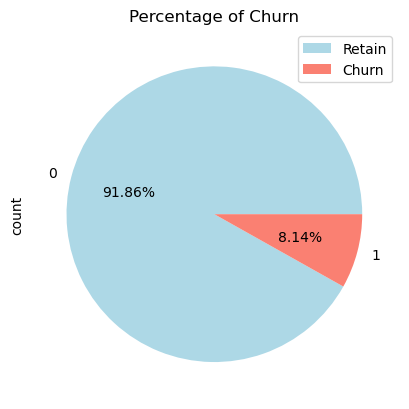

In [36]:
# Checking the % of churn in the entire dataset

df4.churn.value_counts().plot(kind='pie', autopct='%1.2f%%',colors=['lightblue', 'salmon']).set_title("Percentage of Churn")
plt.legend(['Retain', 'Churn'])
plt.show()

In [37]:
for col in cat_cols:
    df4[col] = df4[col].astype('category')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'UserType',
 'aon_buckets']

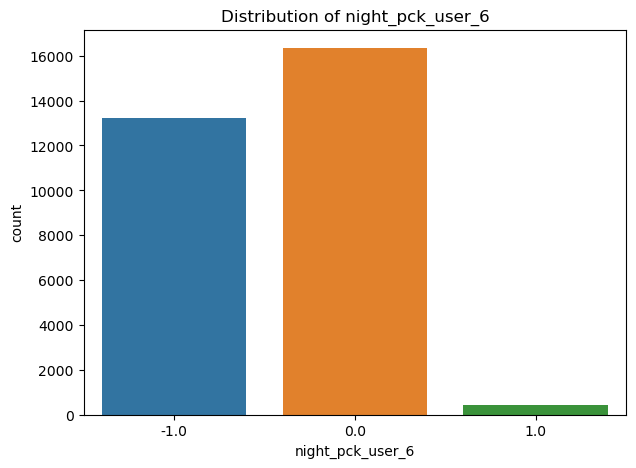

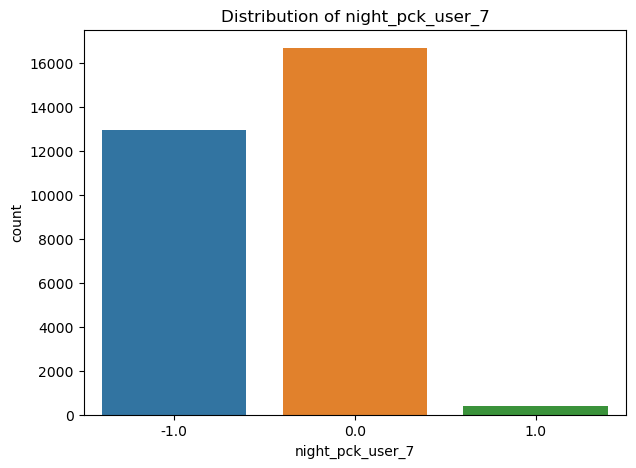

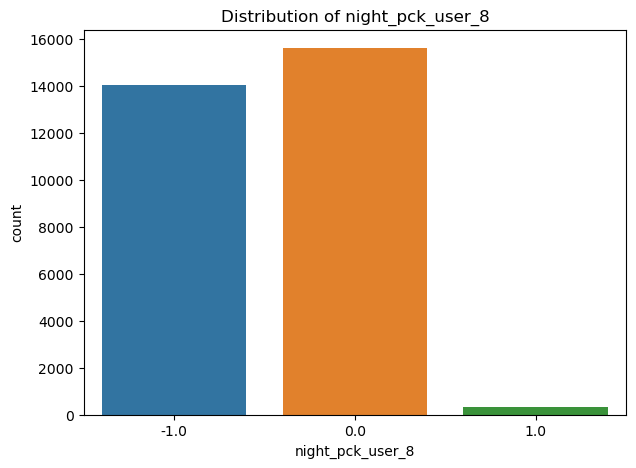

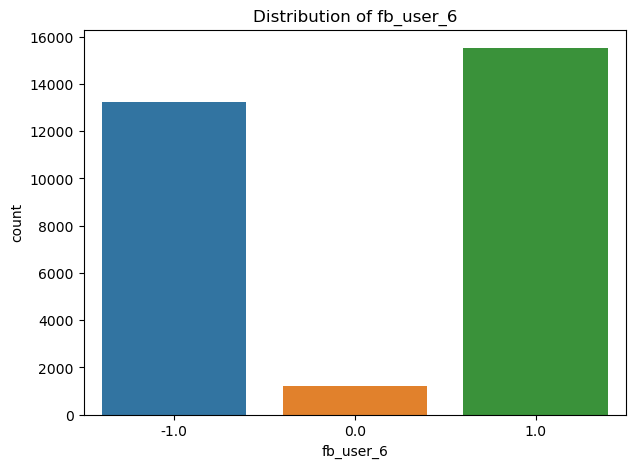

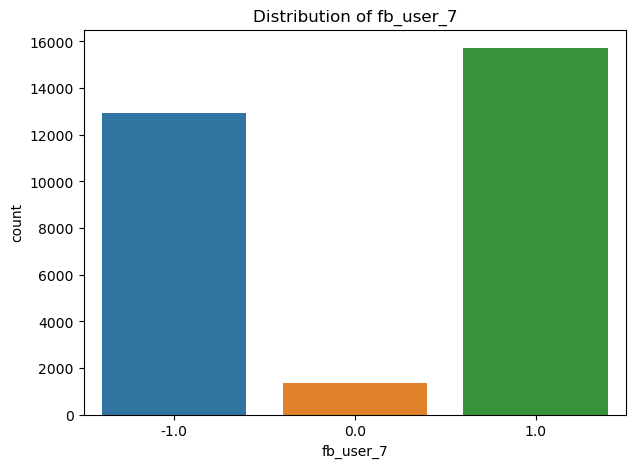

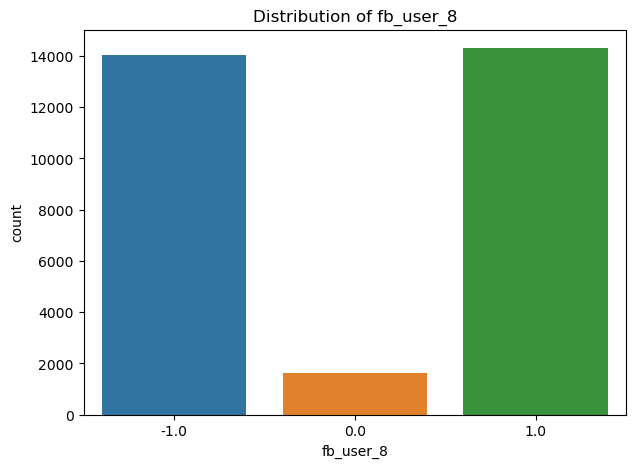

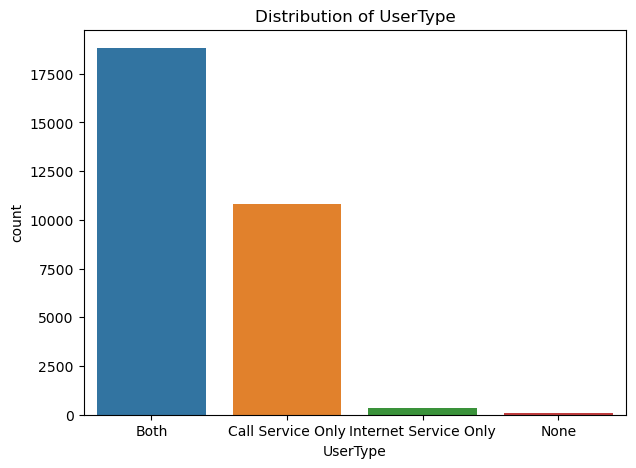

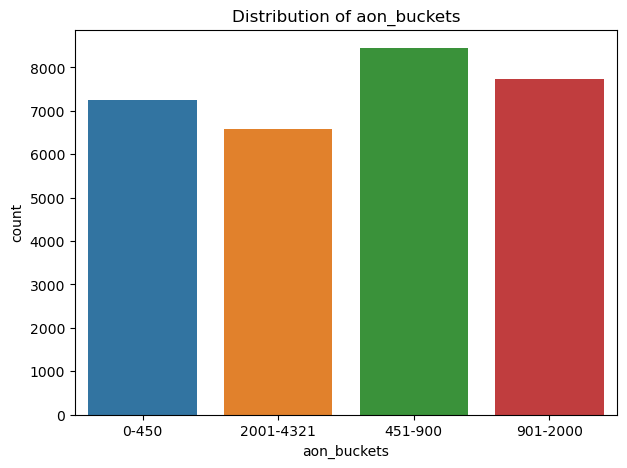

In [38]:
# Univariate Analysis on categorical columns
    
def histplot(x):
    for col in x:
        plt.figure(figsize=(7,5))
        sns.countplot(x=df4[col])
        plt.title(f'Distribution of {col}')
        plt.show()

histplot(cat_cols)

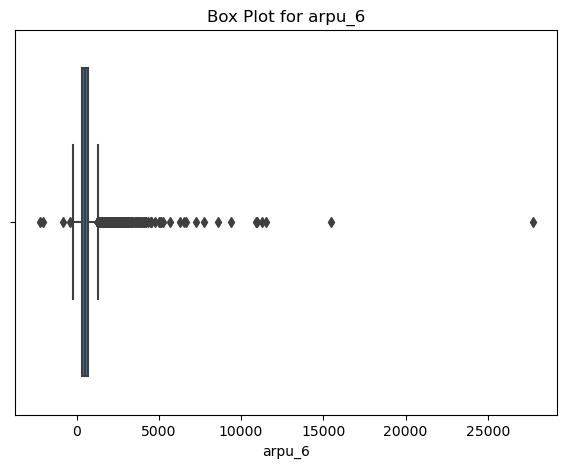

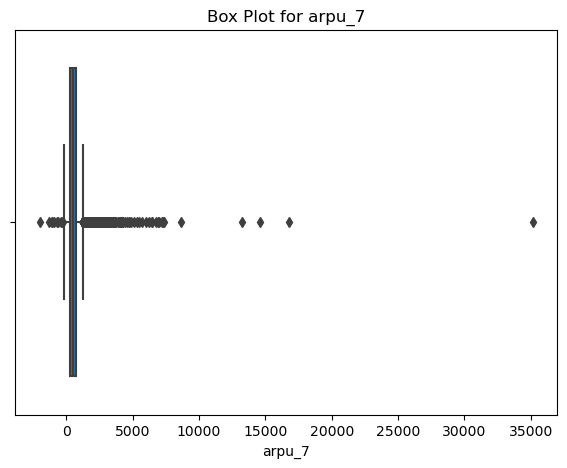

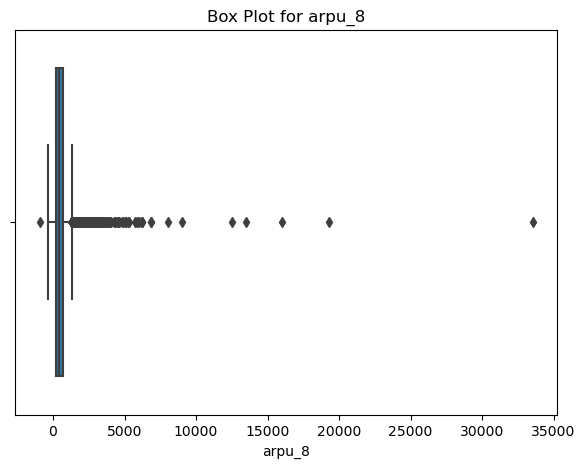

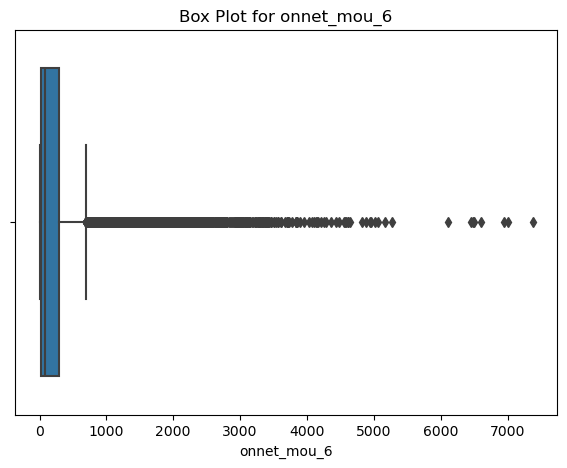

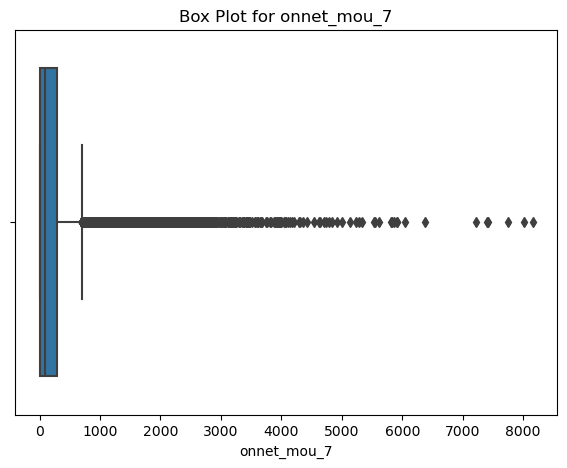

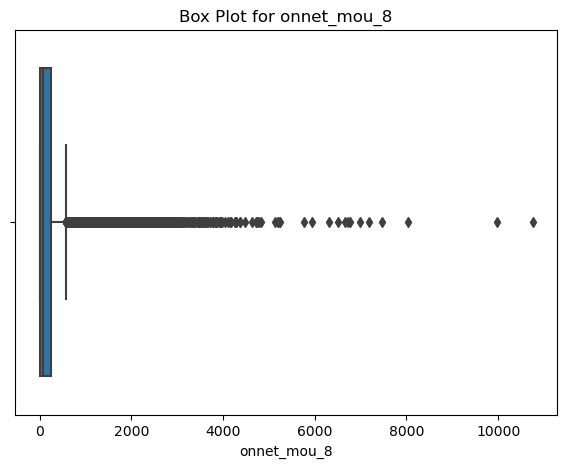

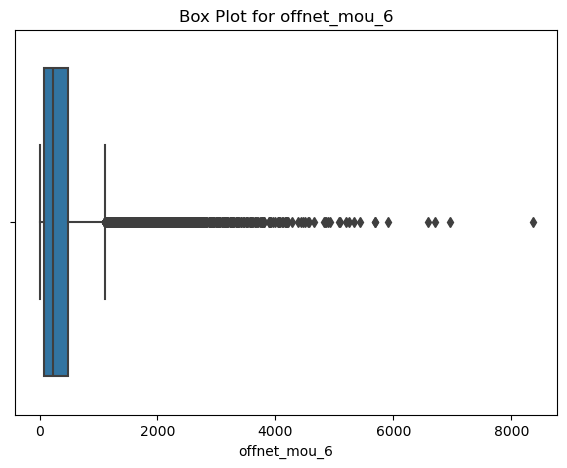

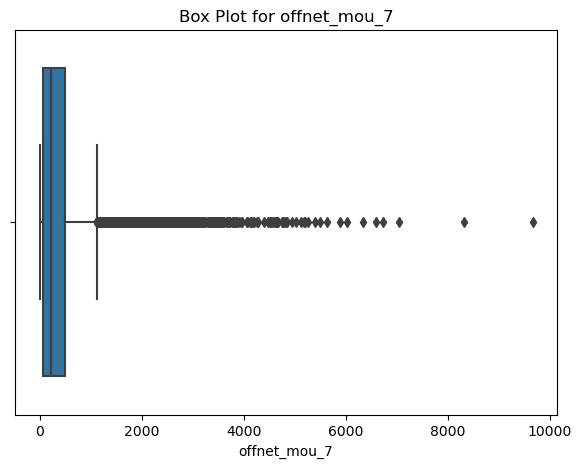

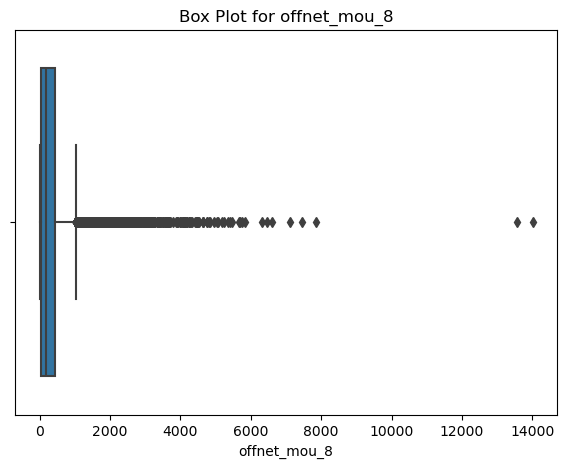

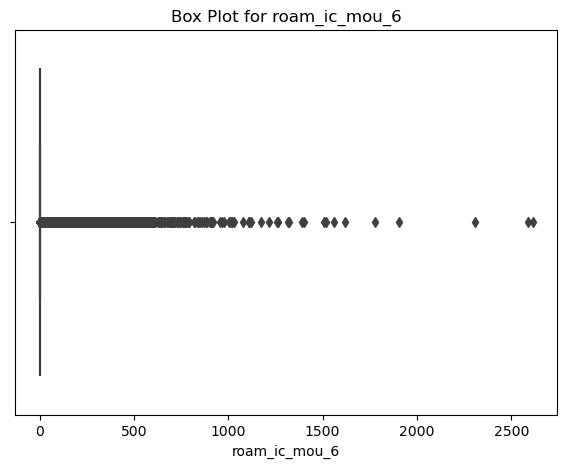

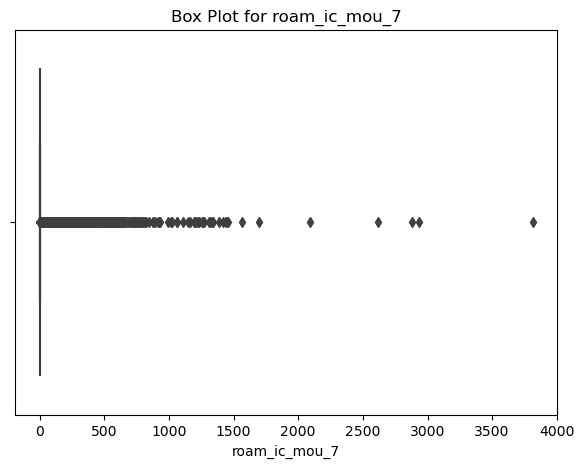

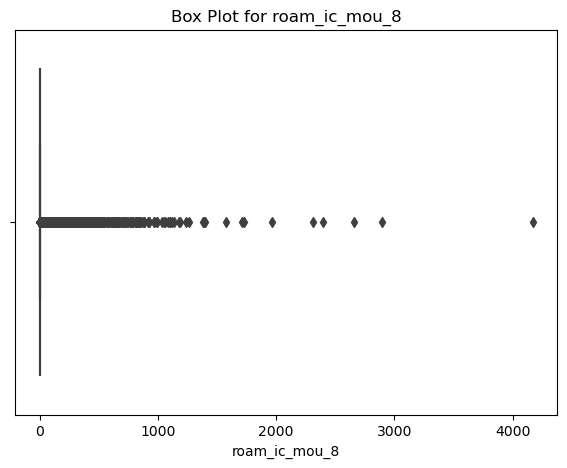

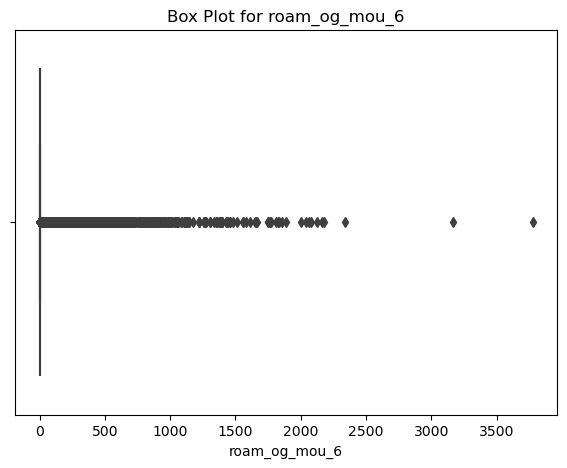

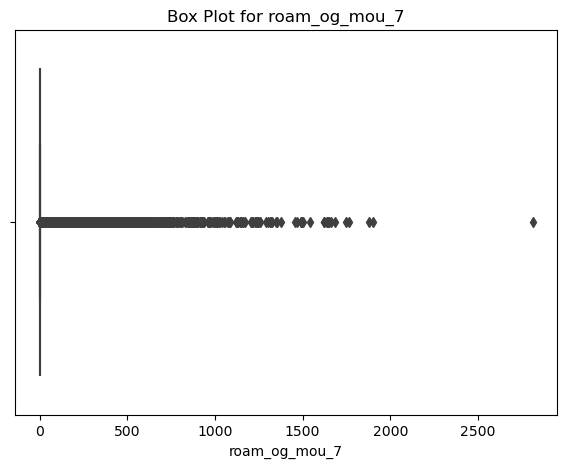

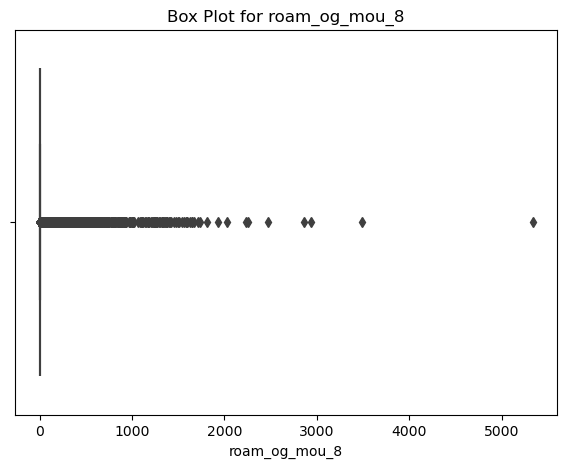

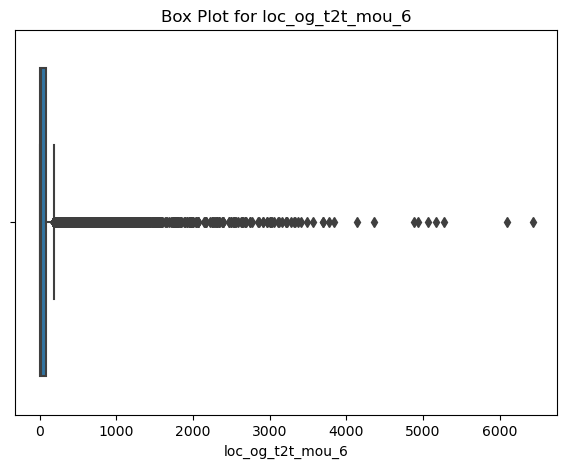

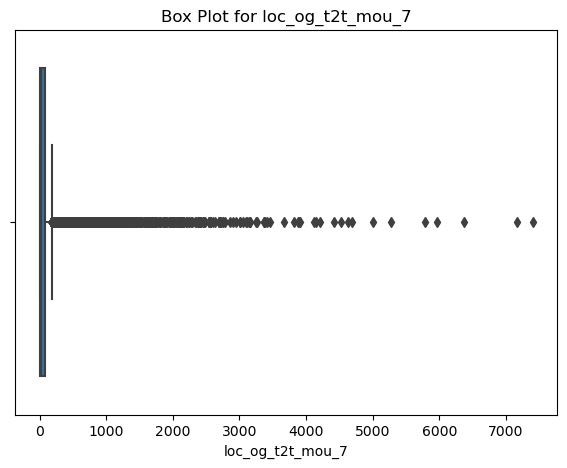

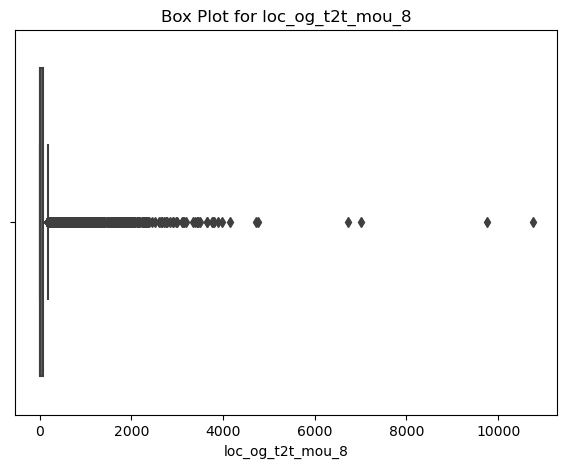

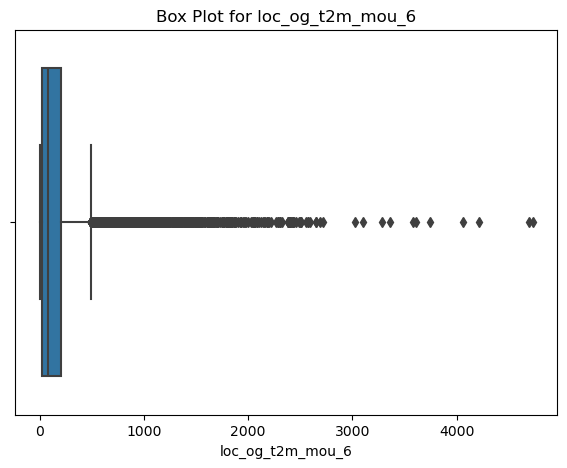

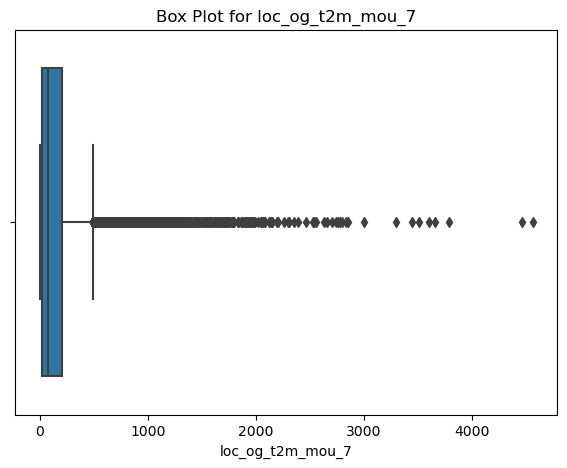

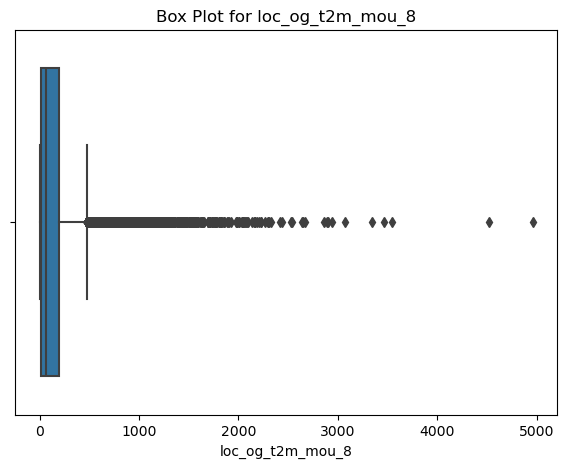

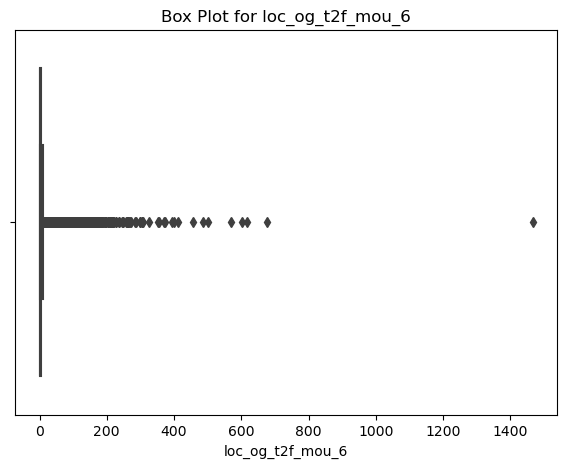

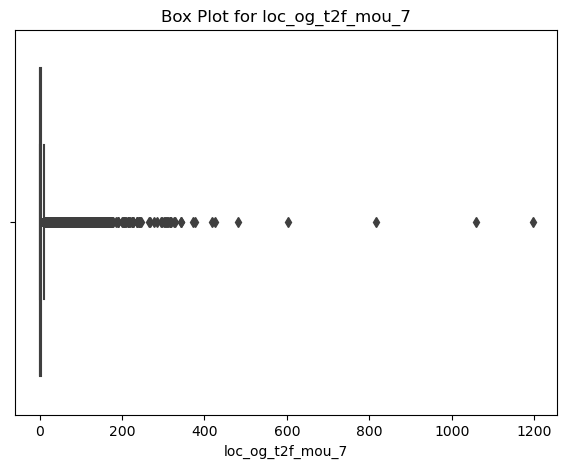

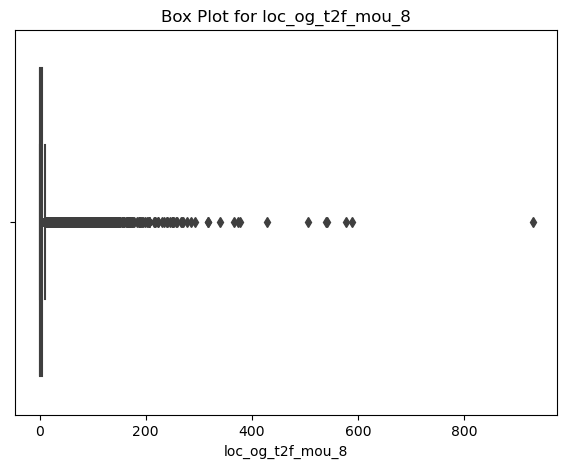

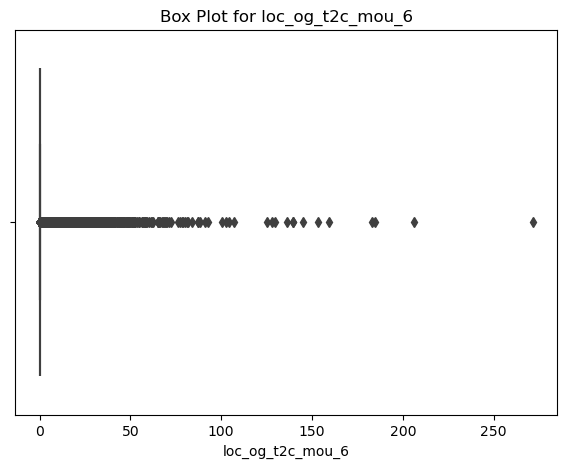

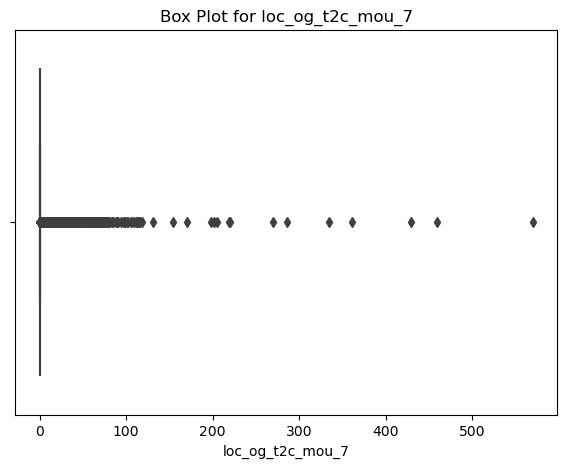

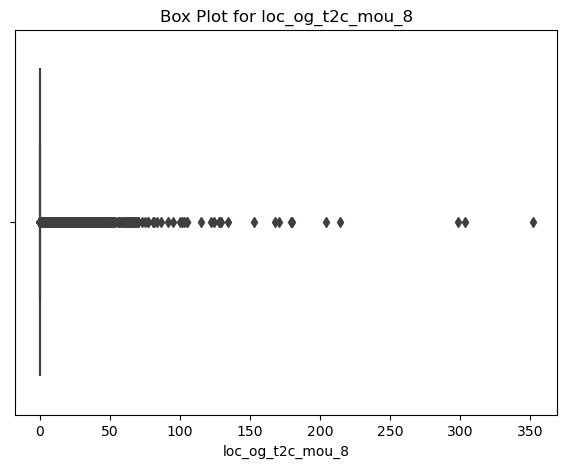

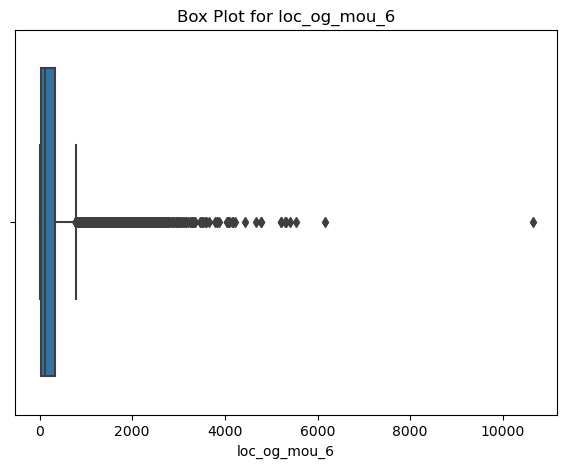

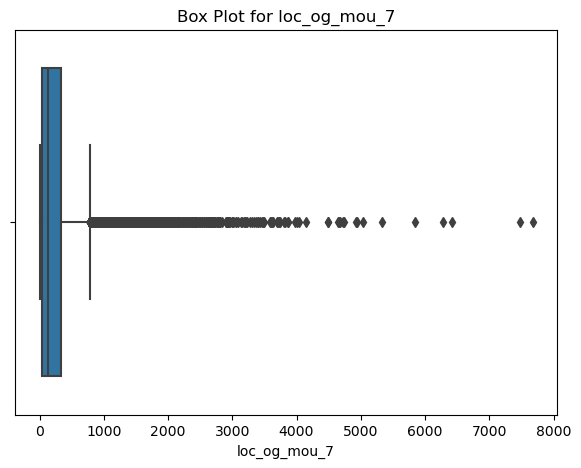

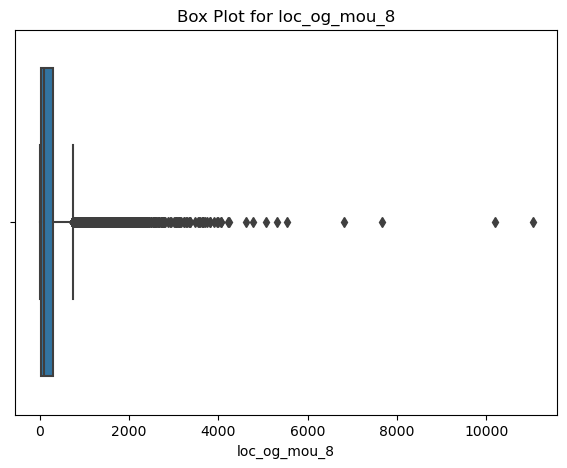

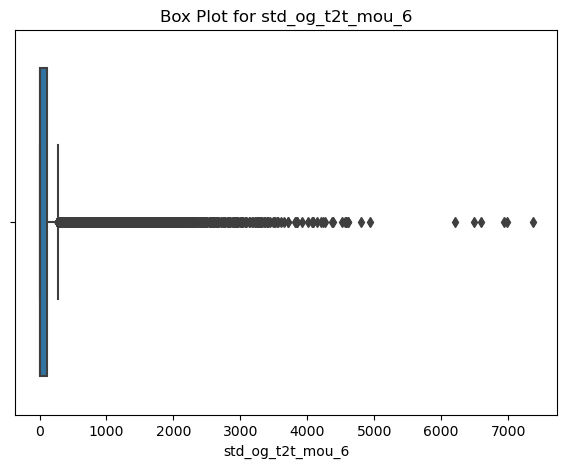

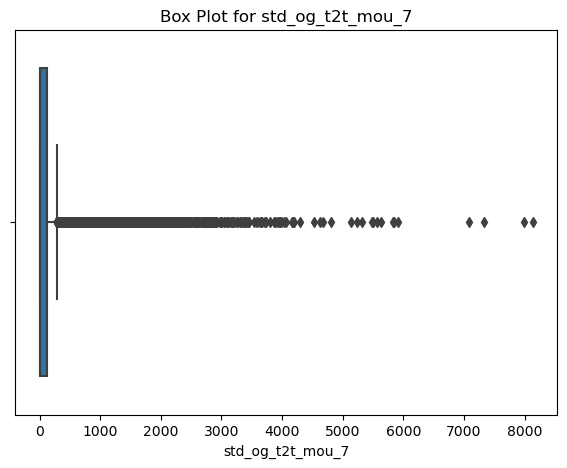

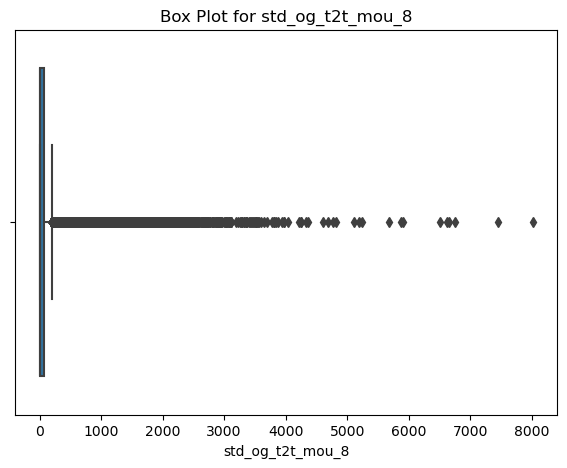

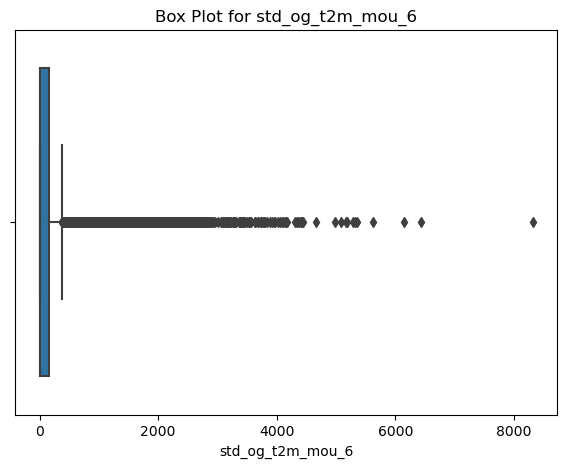

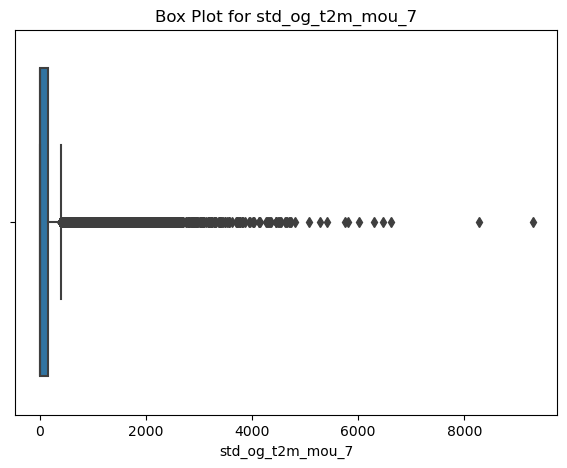

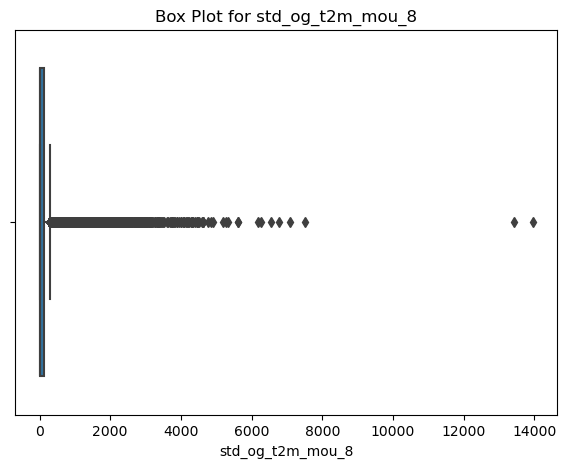

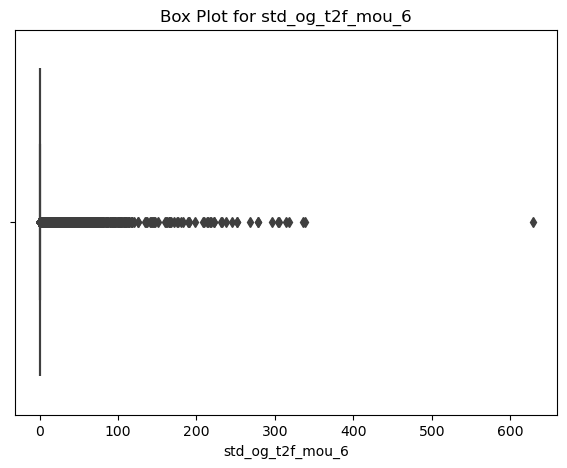

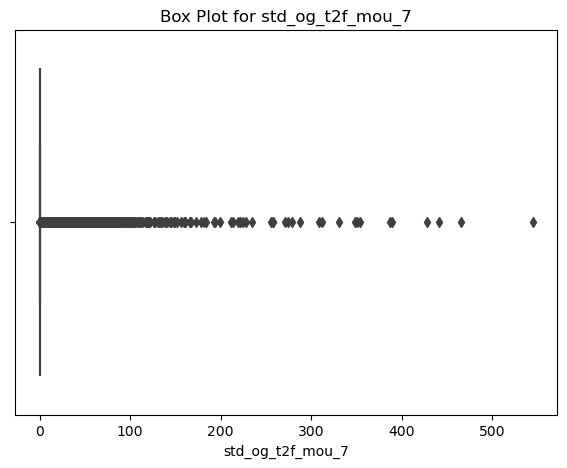

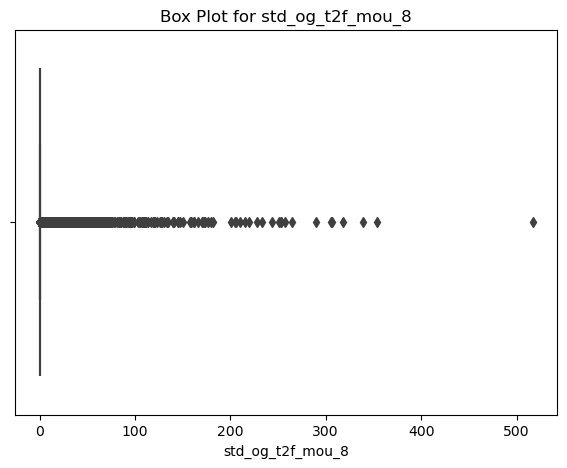

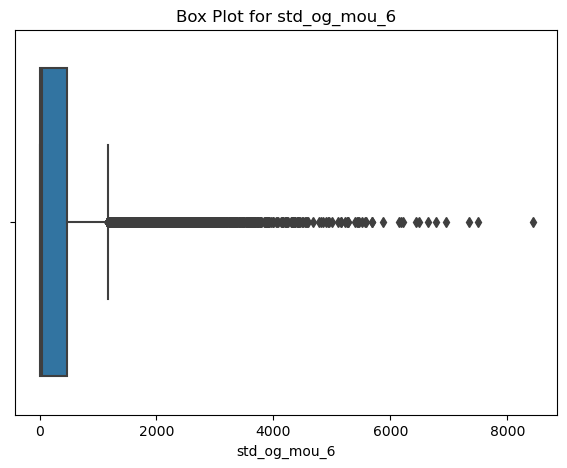

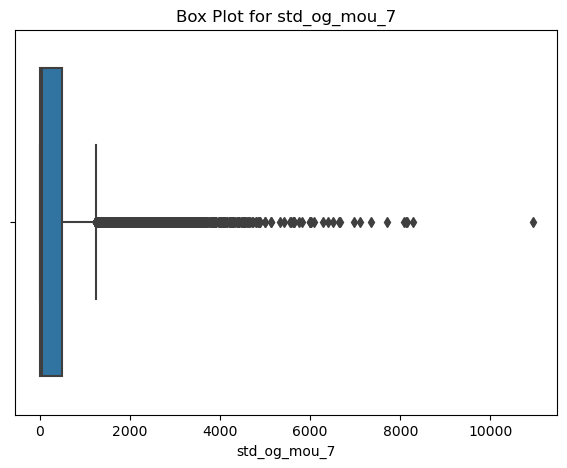

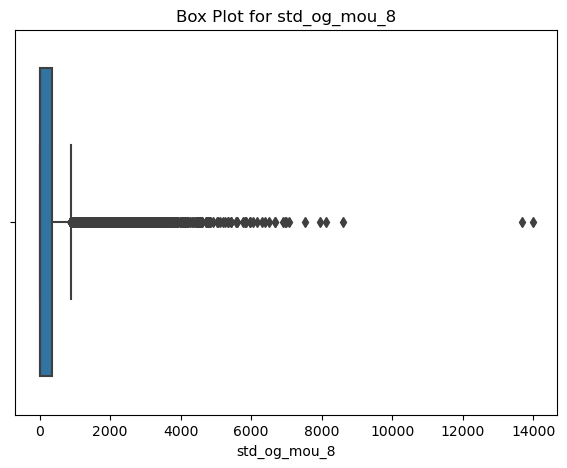

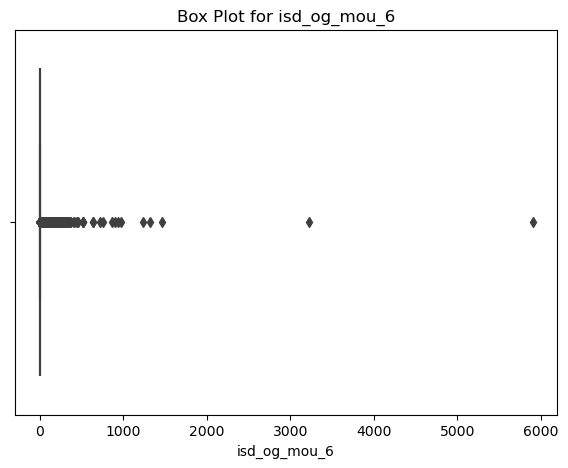

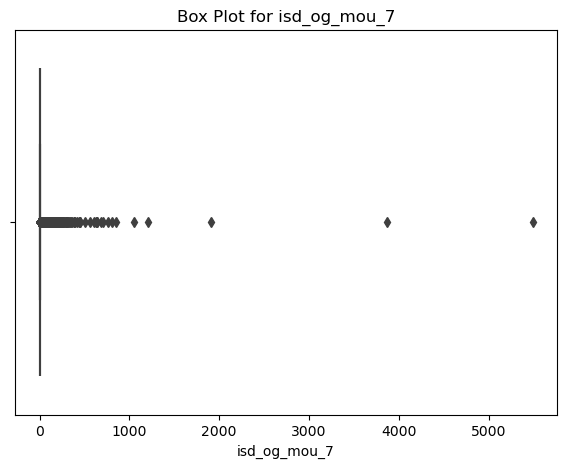

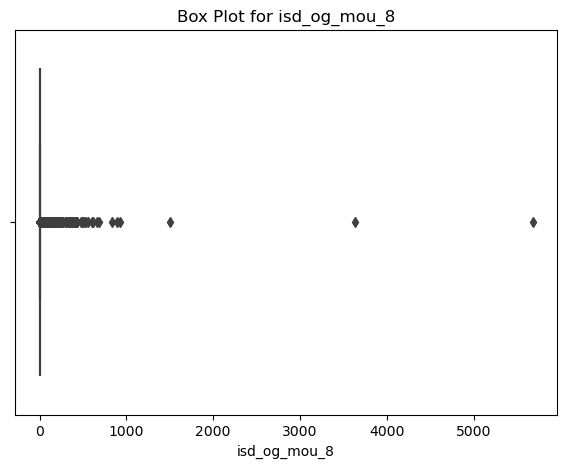

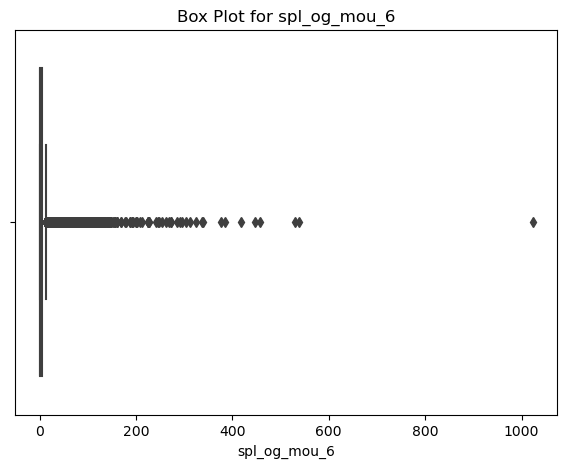

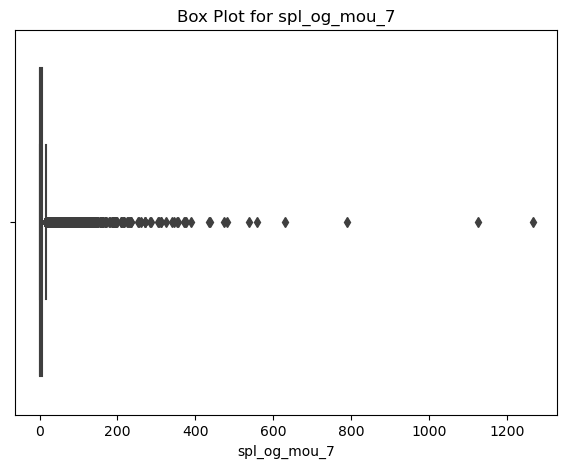

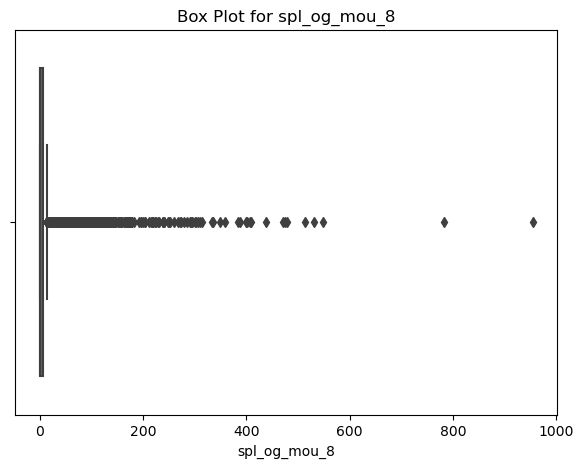

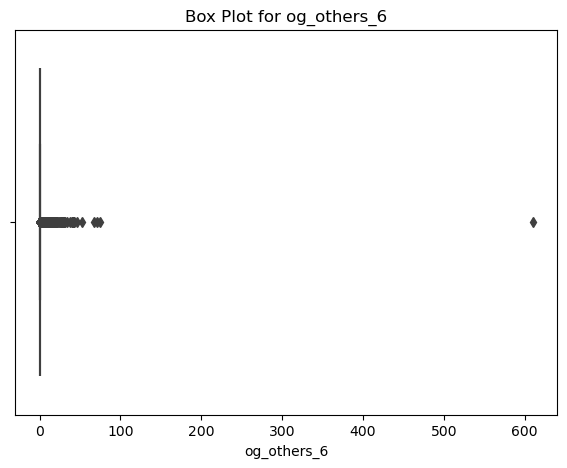

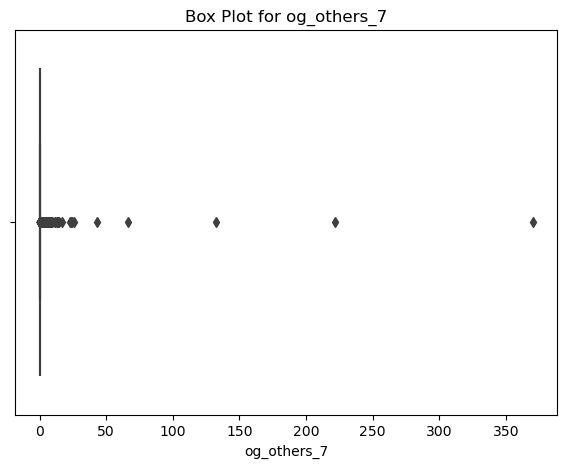

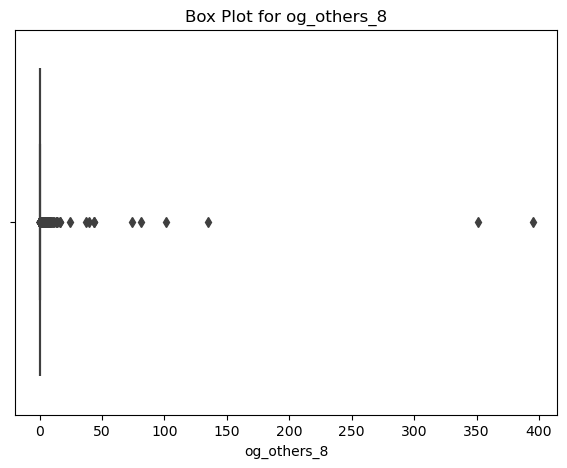

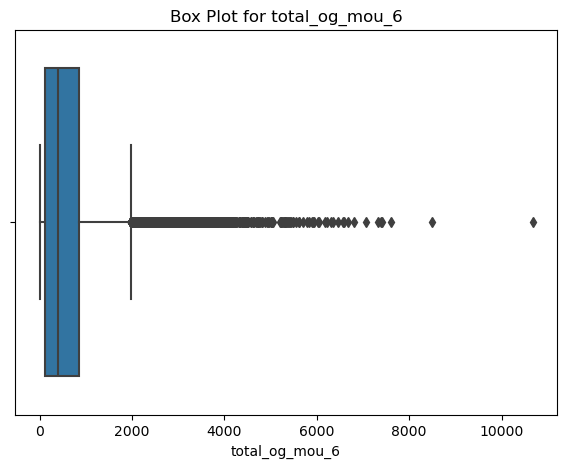

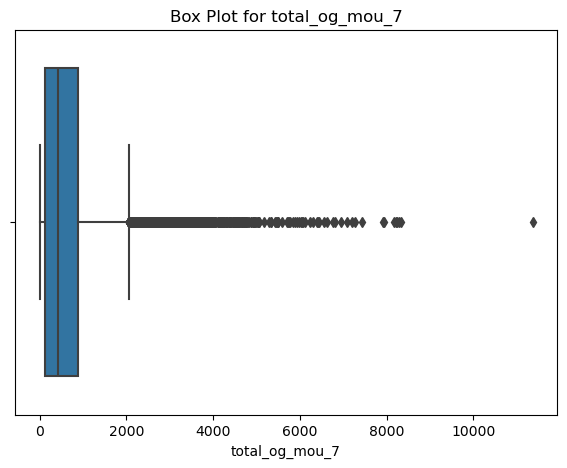

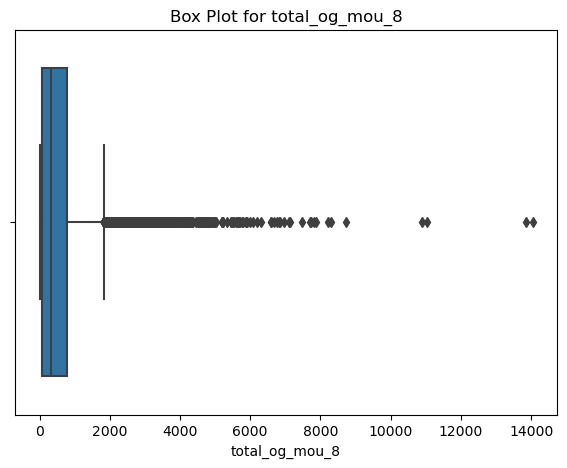

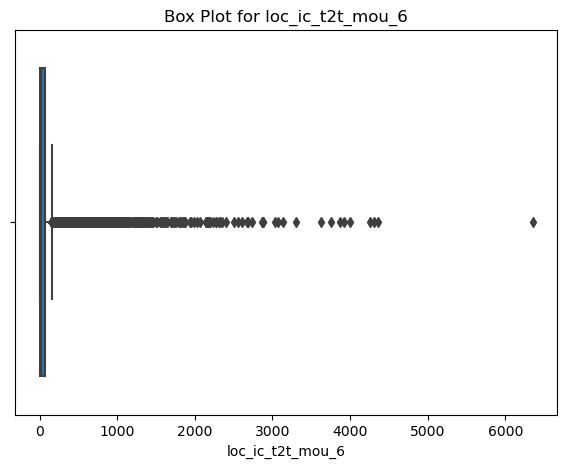

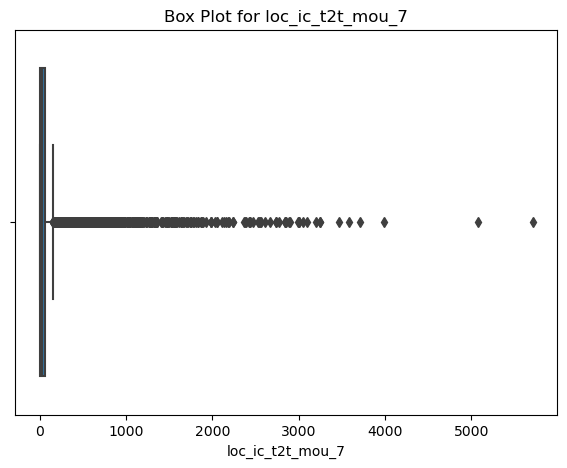

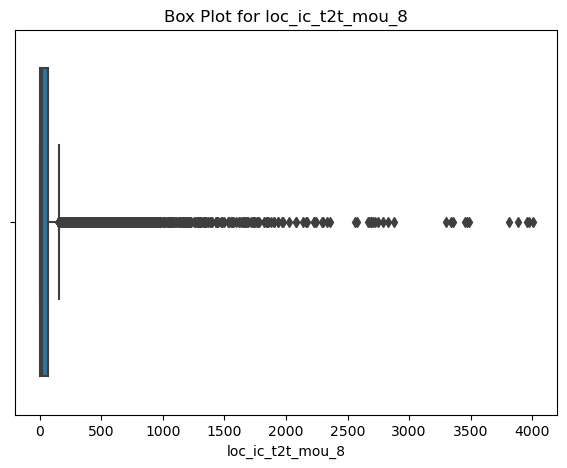

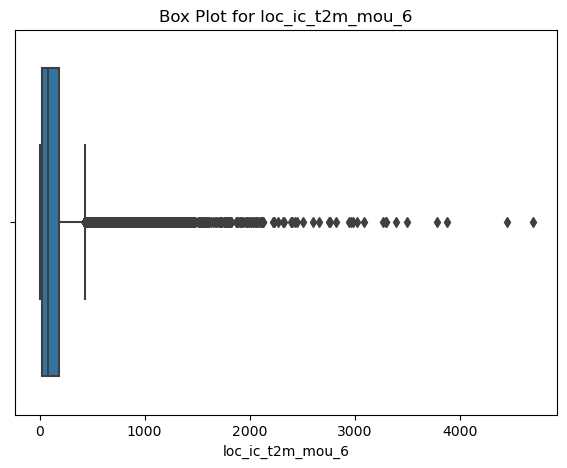

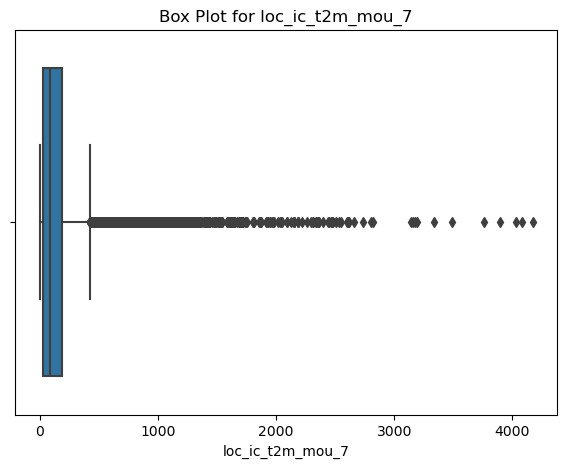

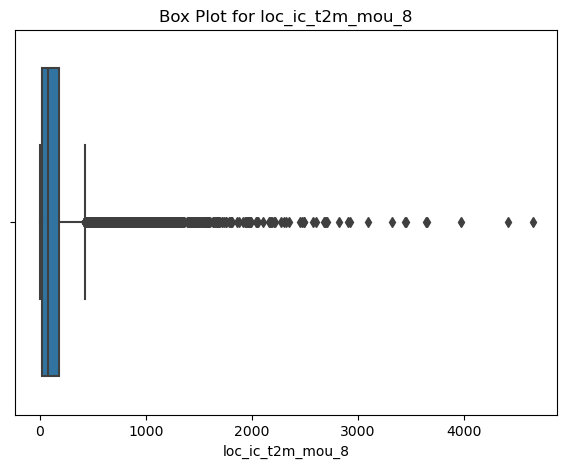

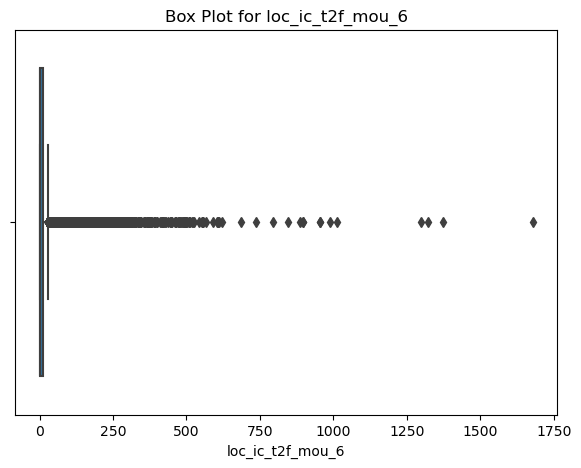

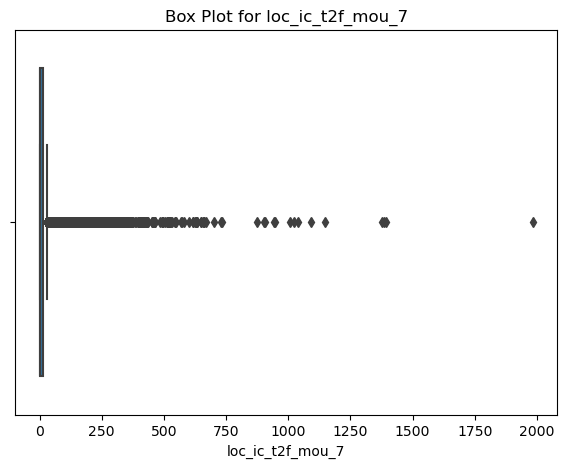

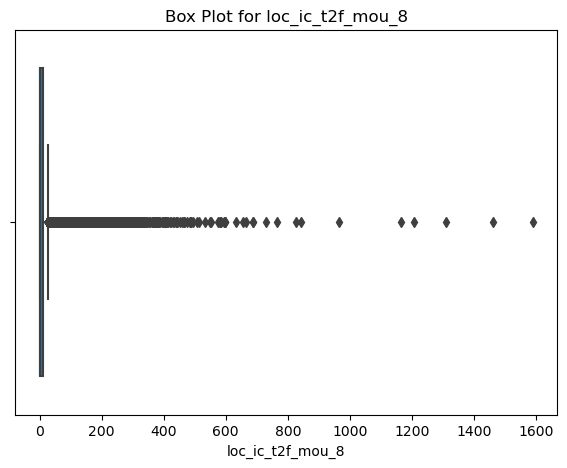

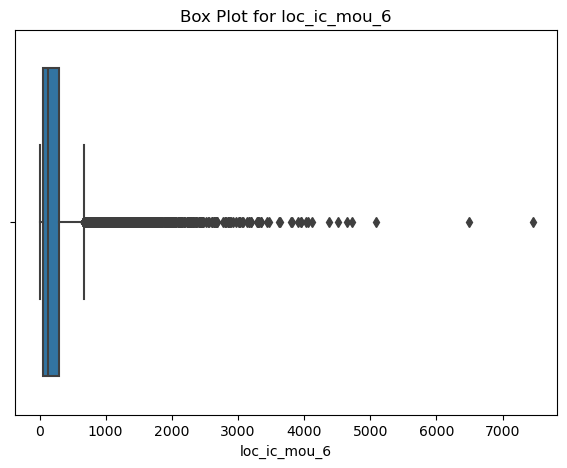

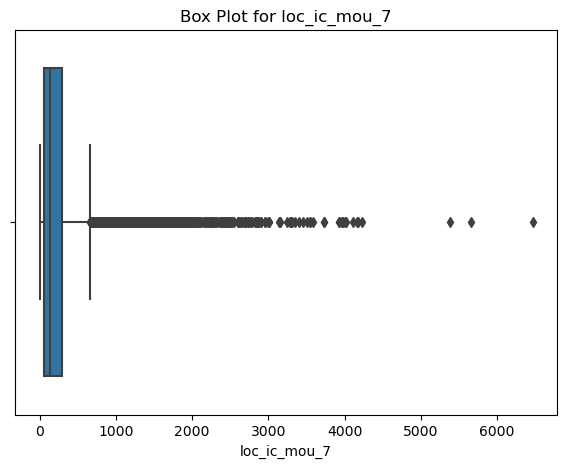

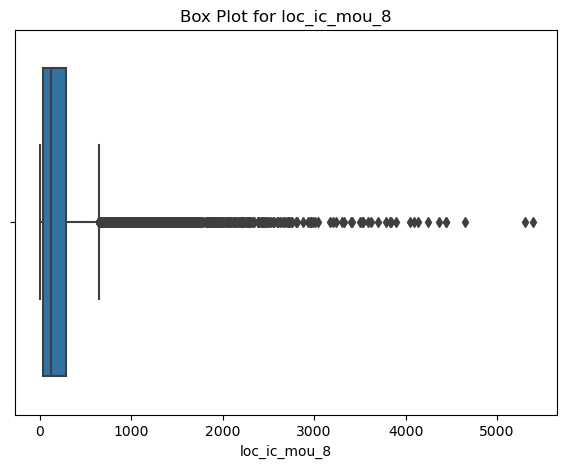

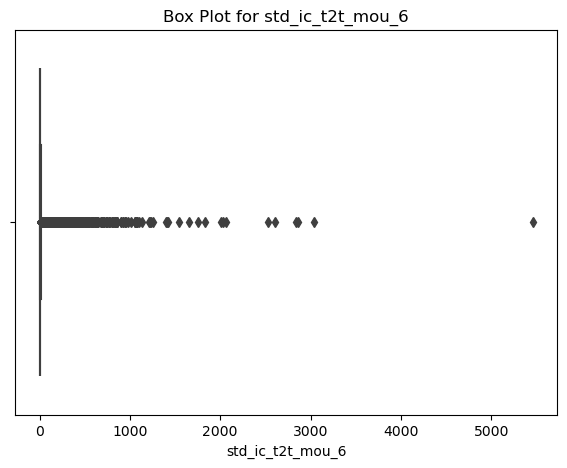

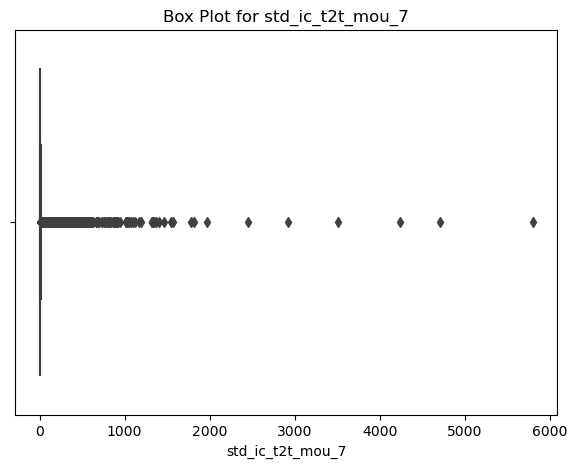

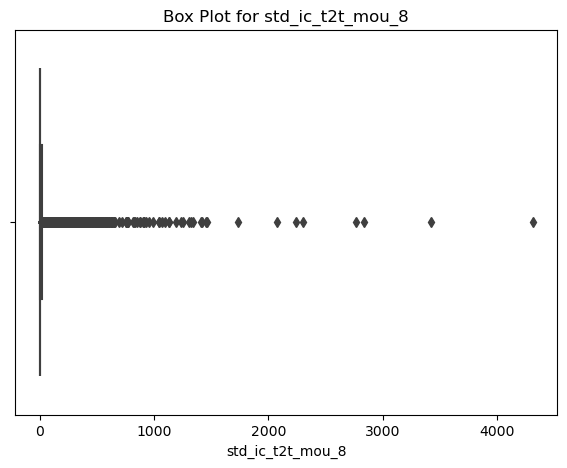

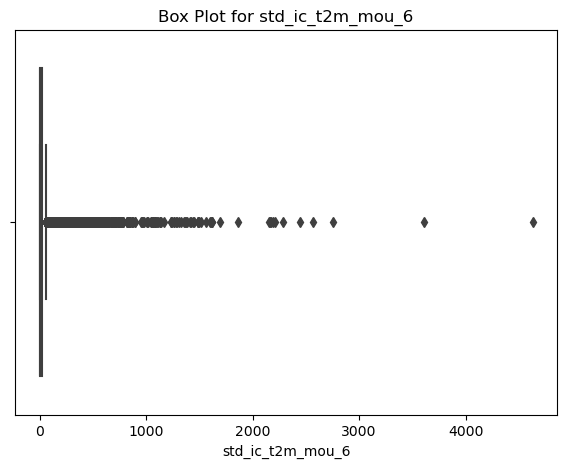

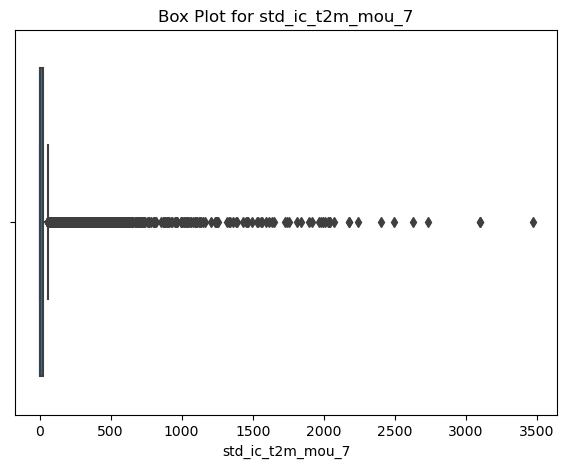

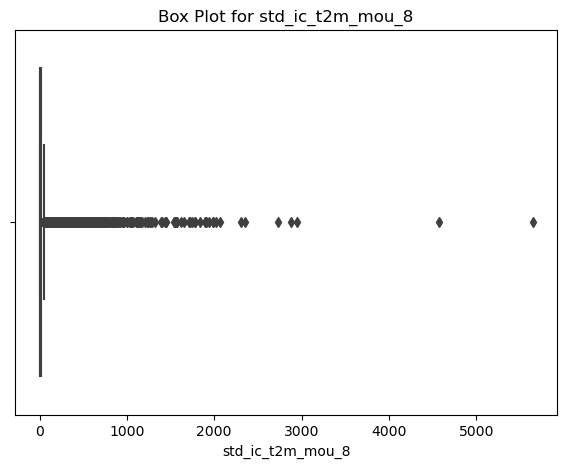

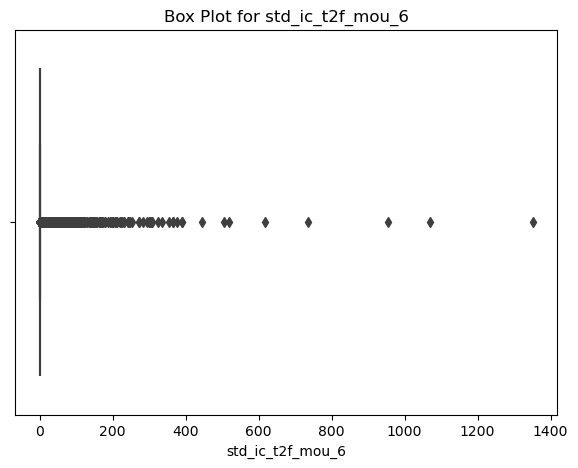

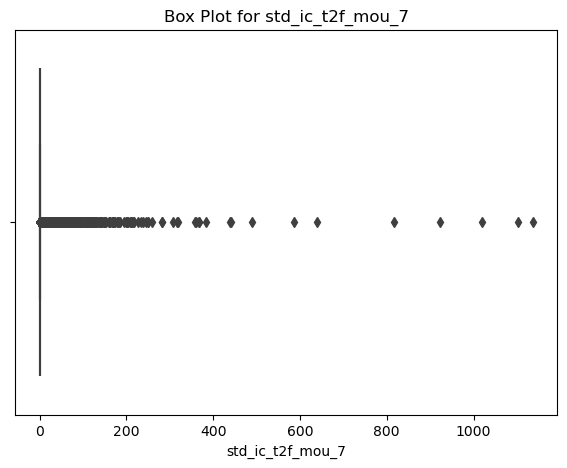

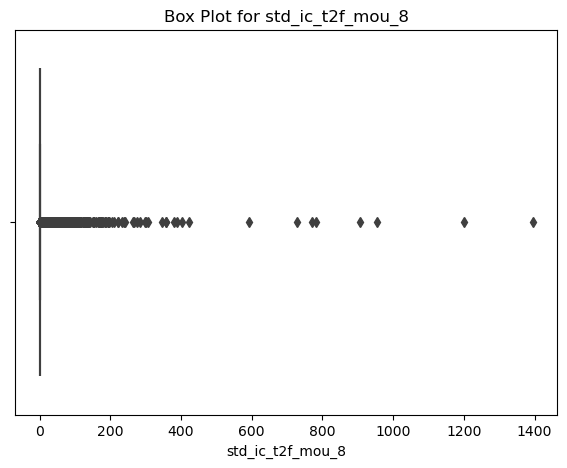

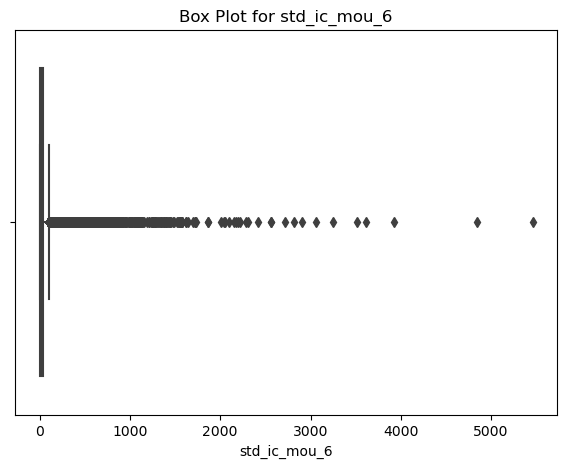

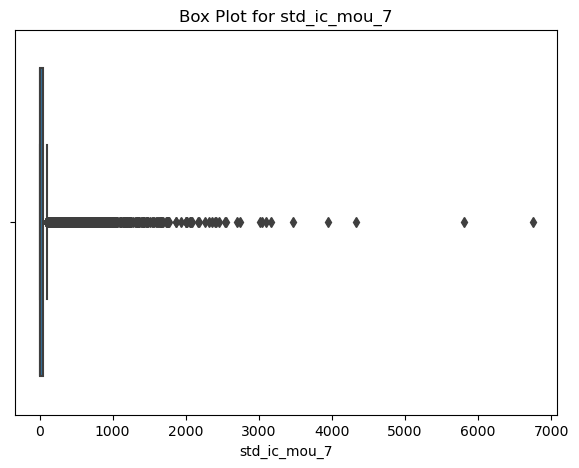

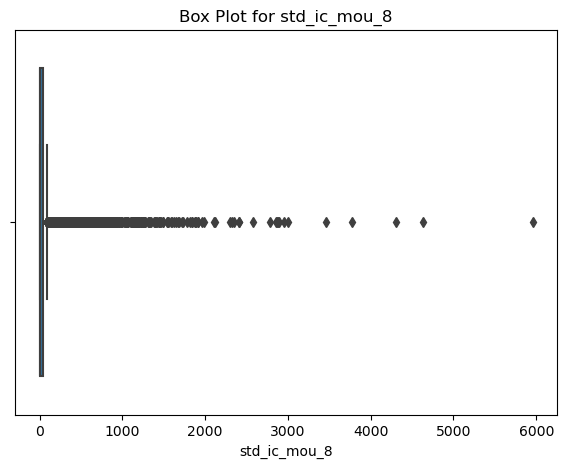

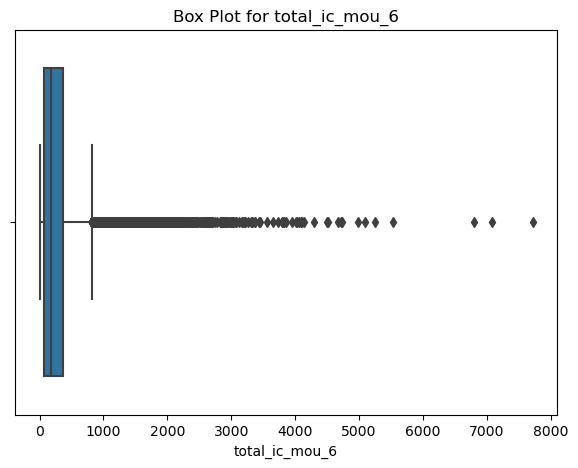

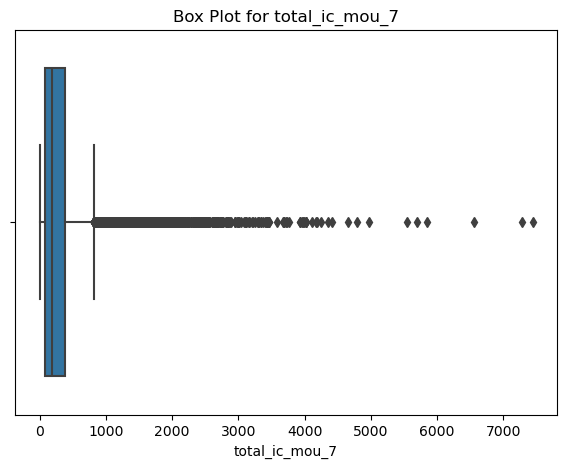

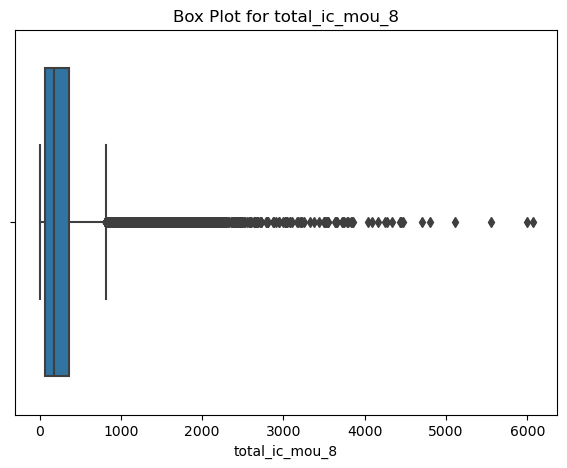

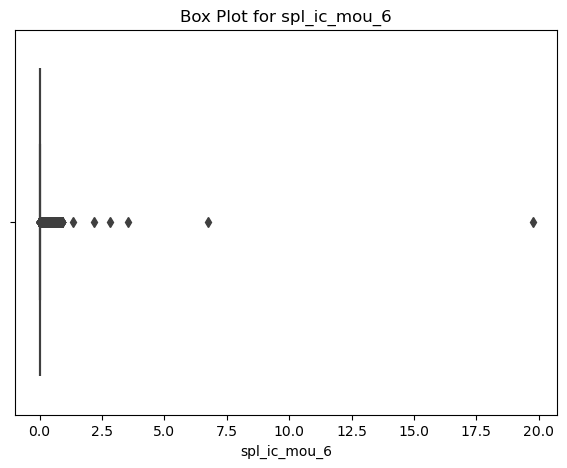

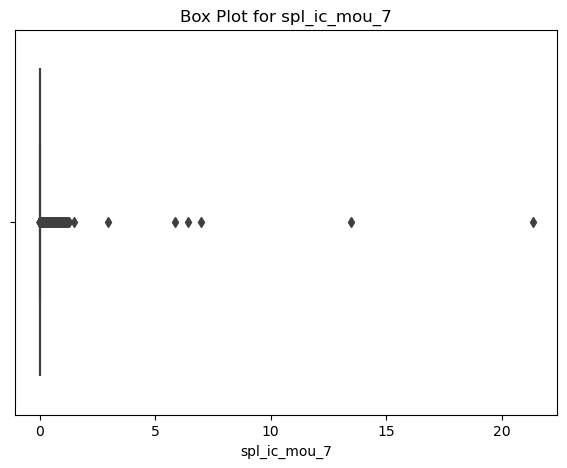

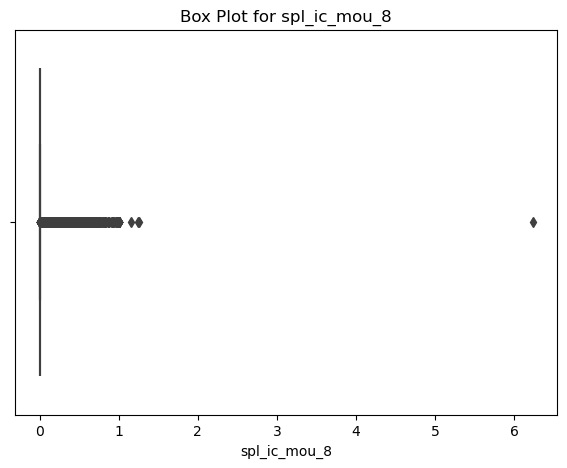

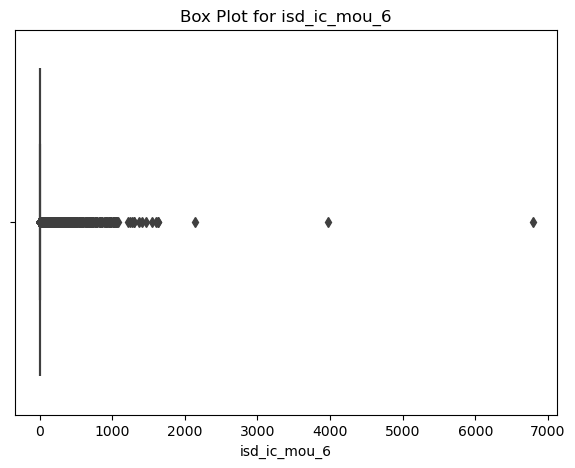

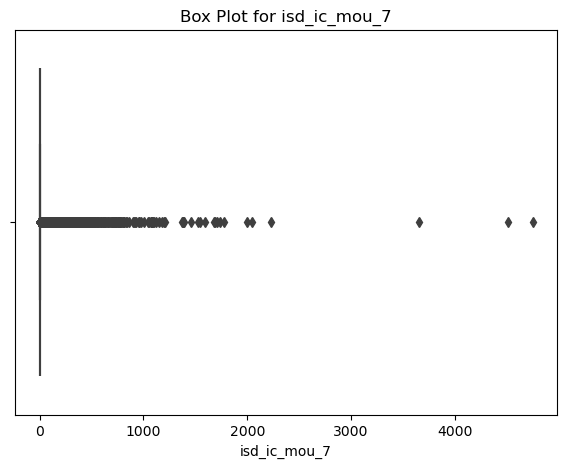

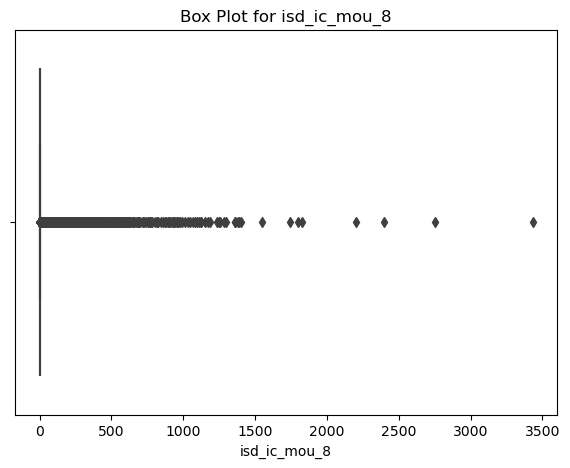

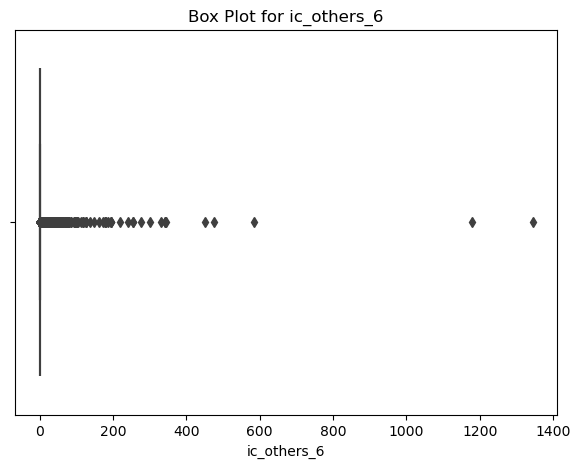

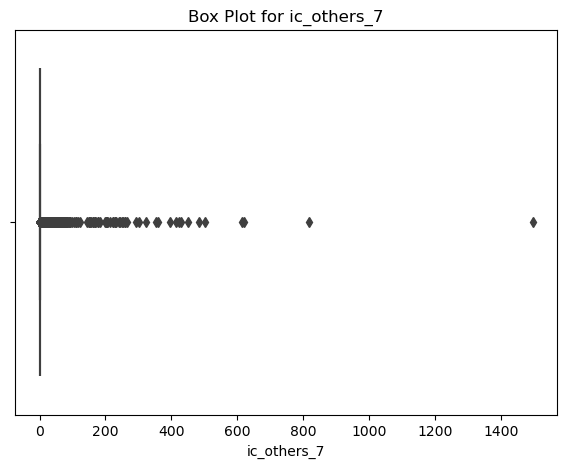

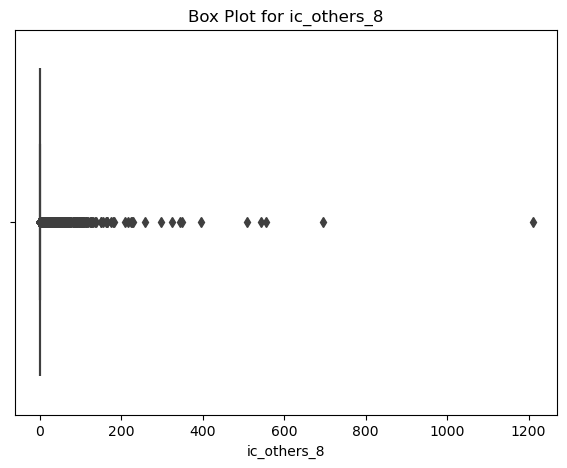

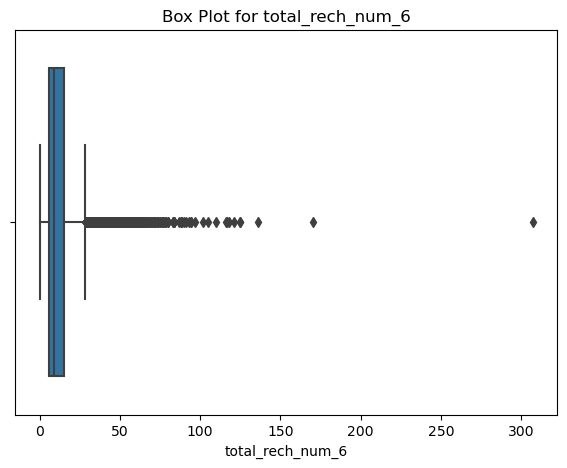

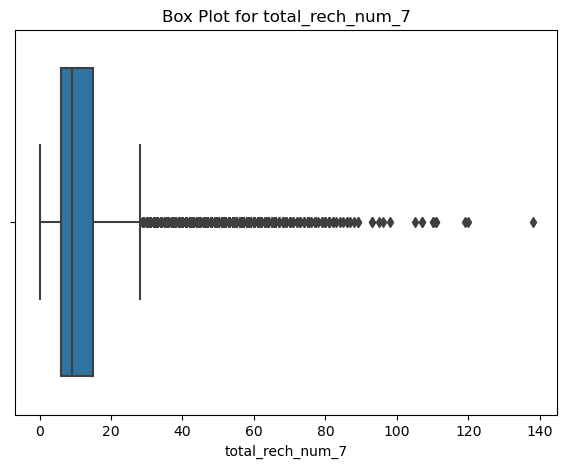

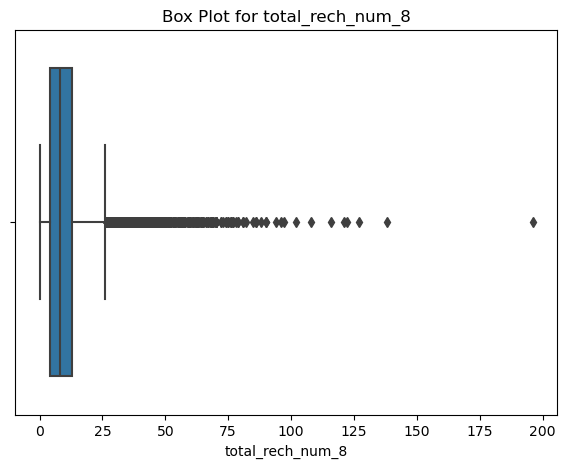

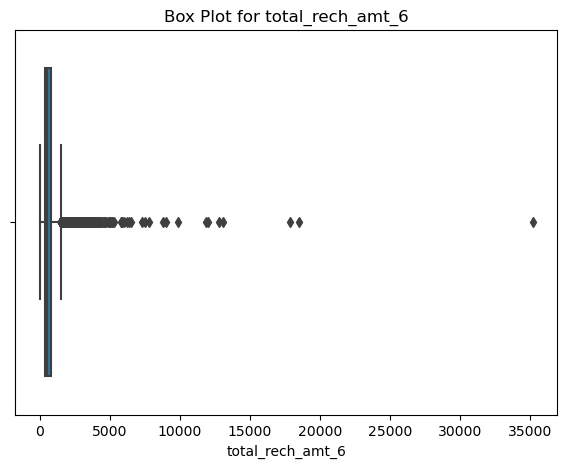

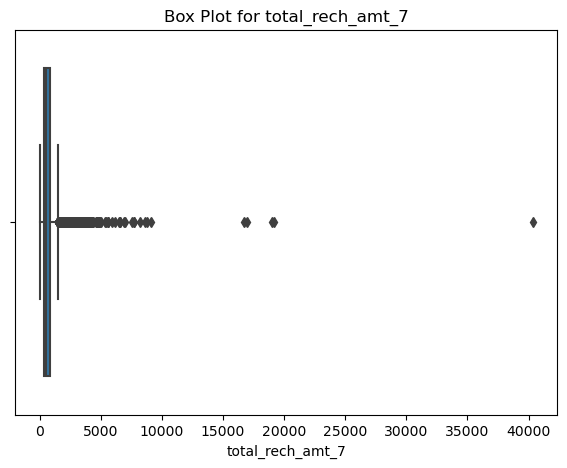

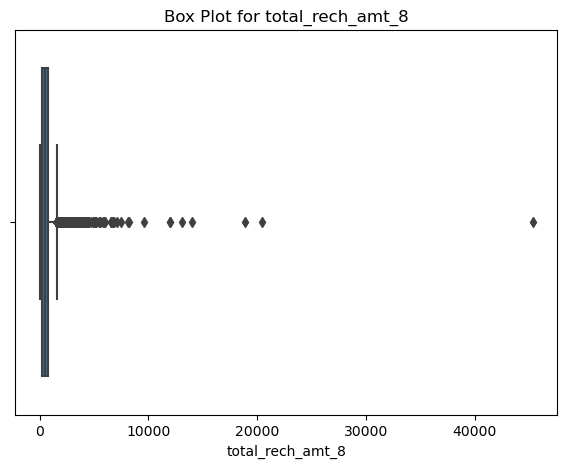

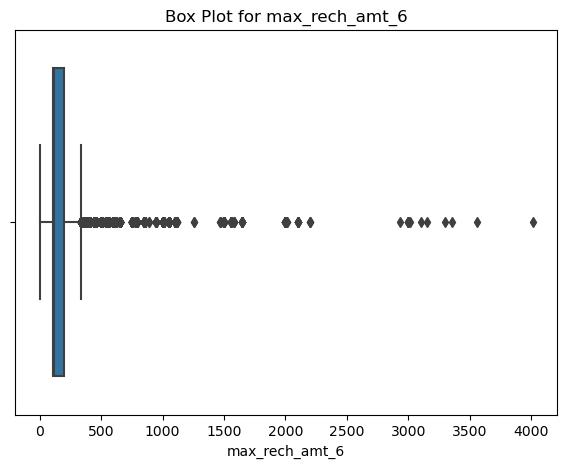

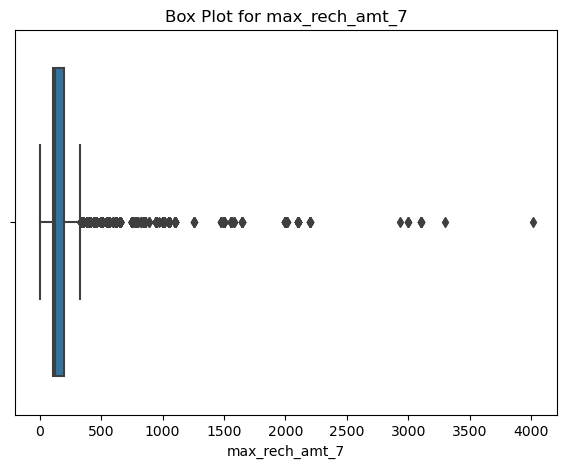

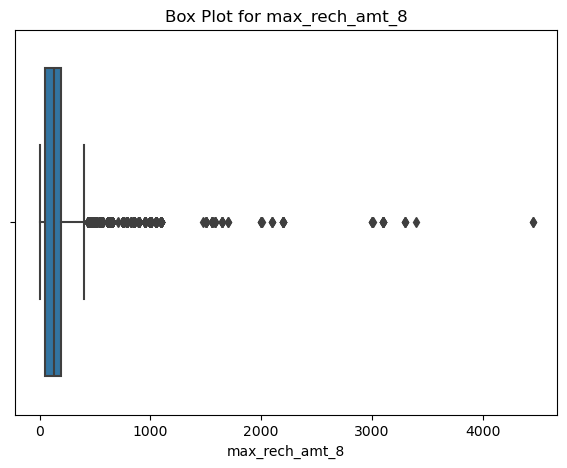

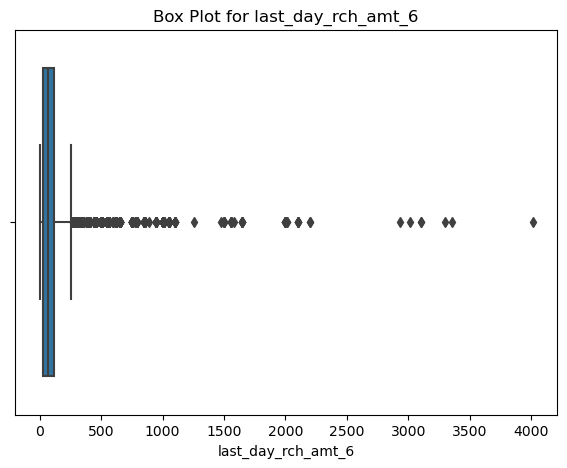

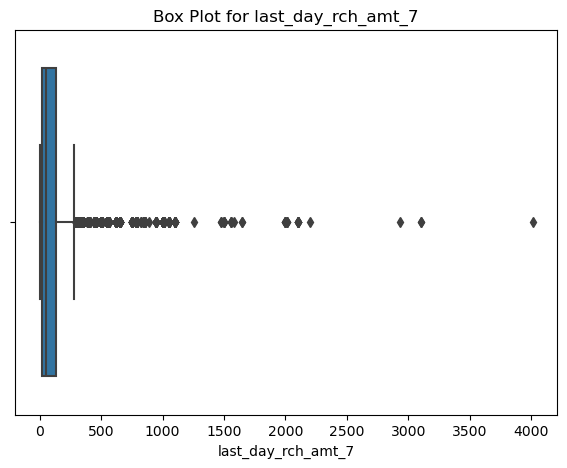

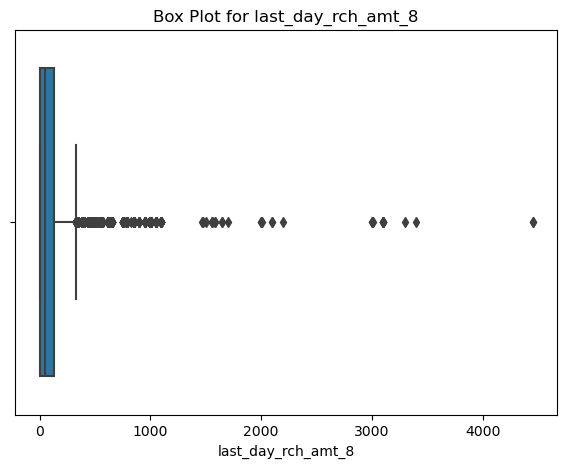

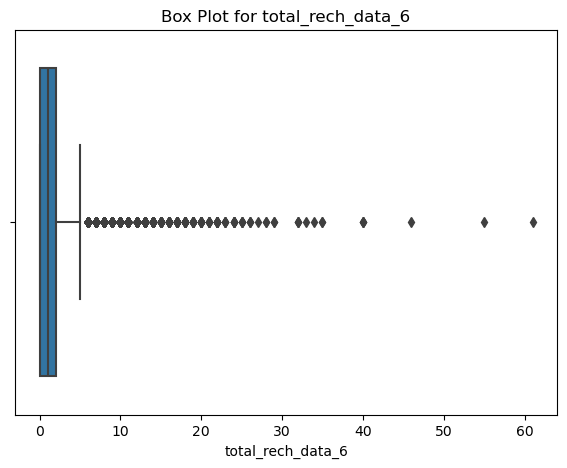

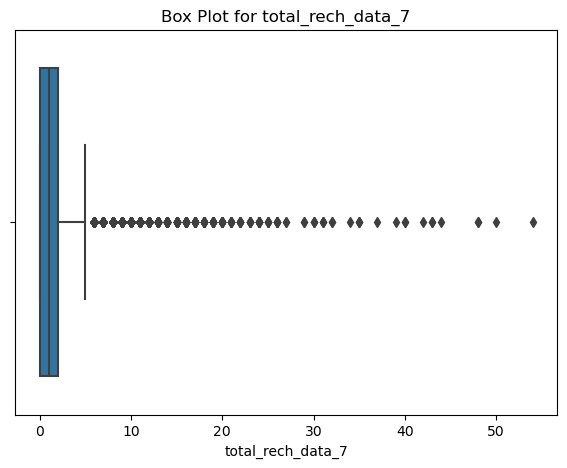

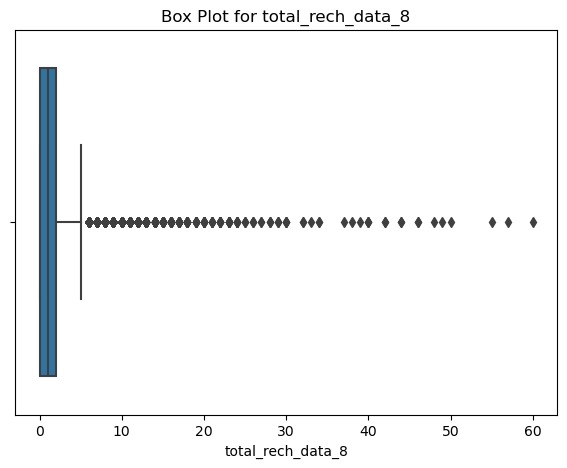

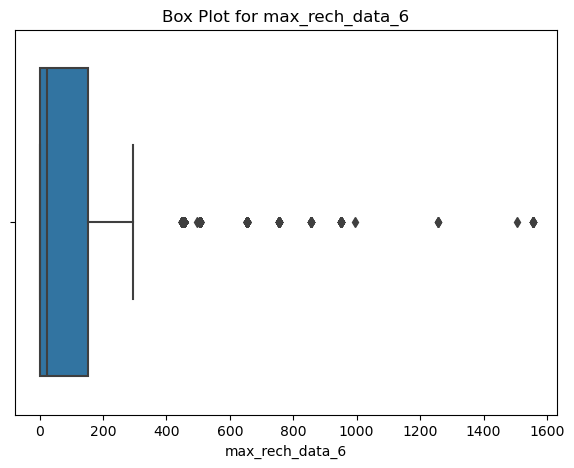

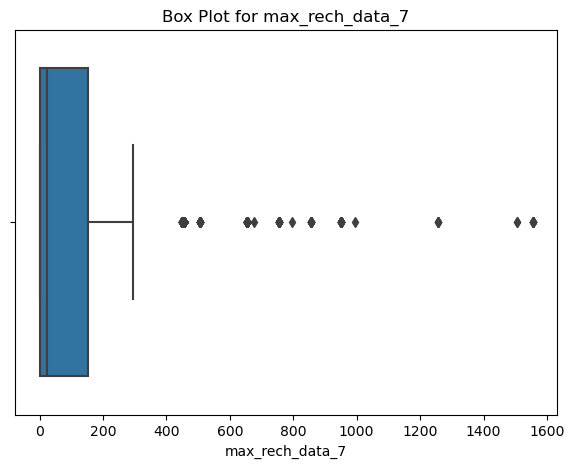

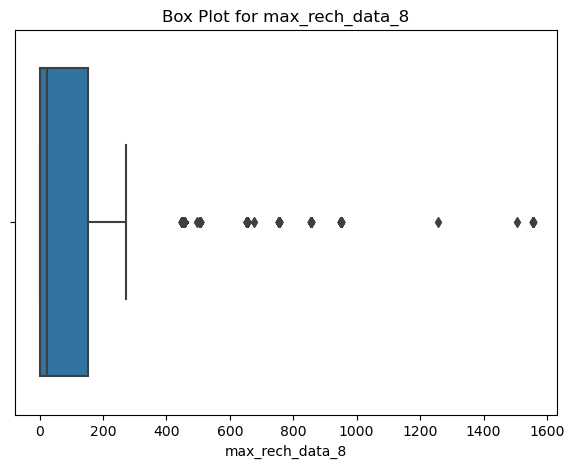

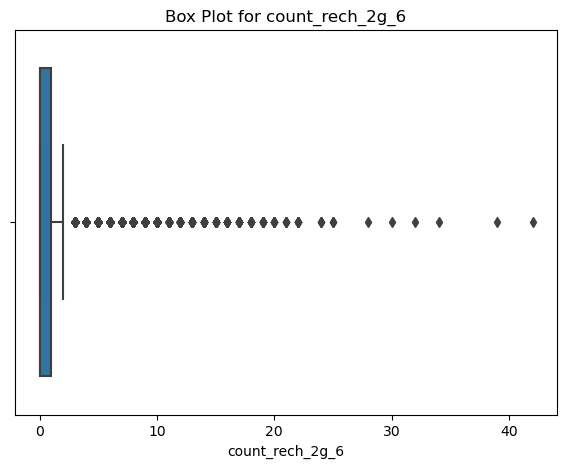

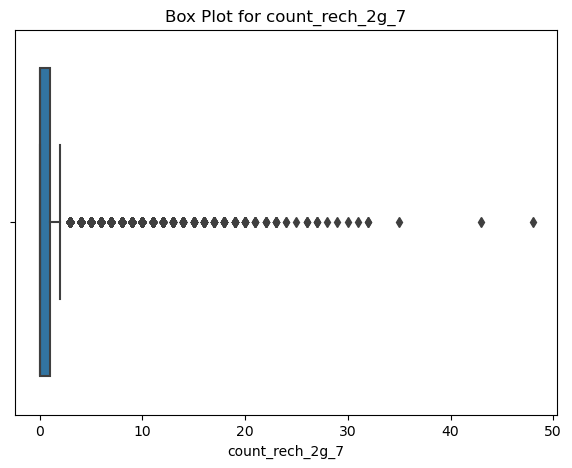

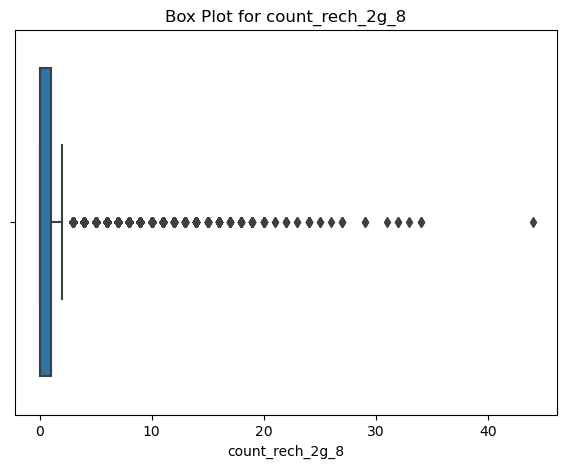

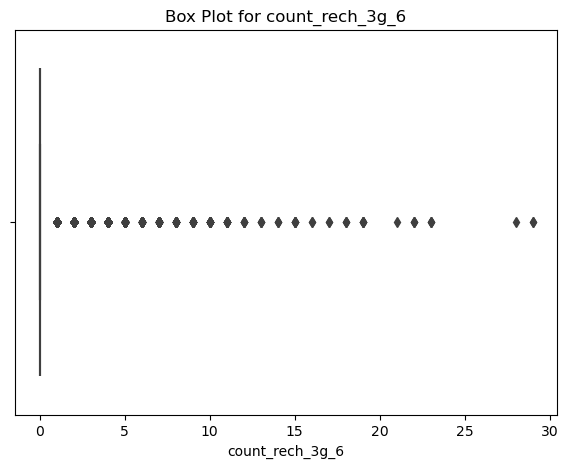

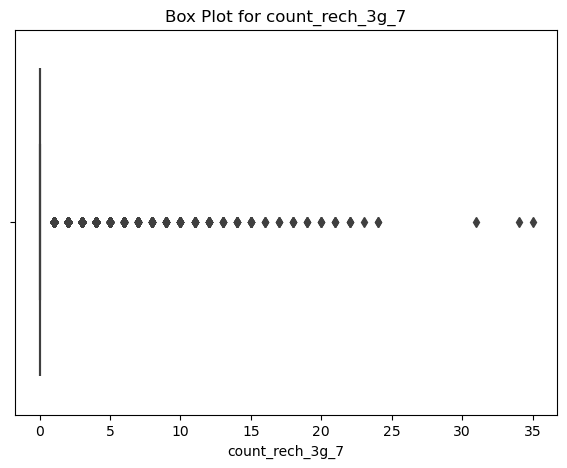

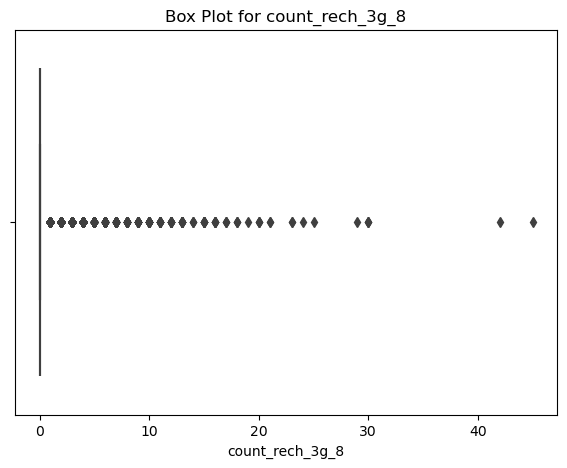

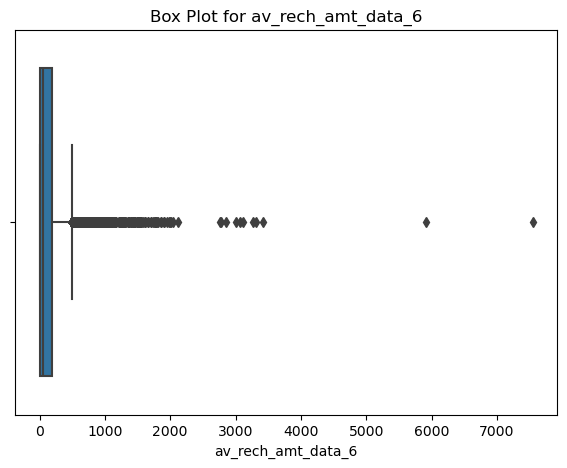

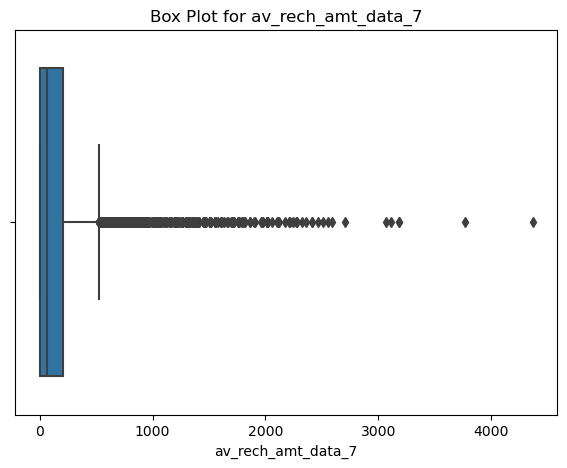

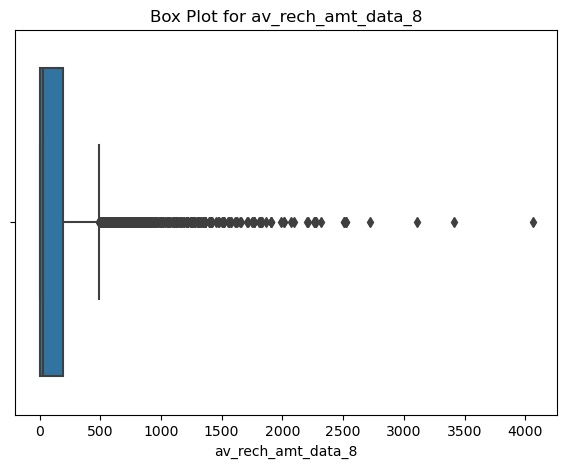

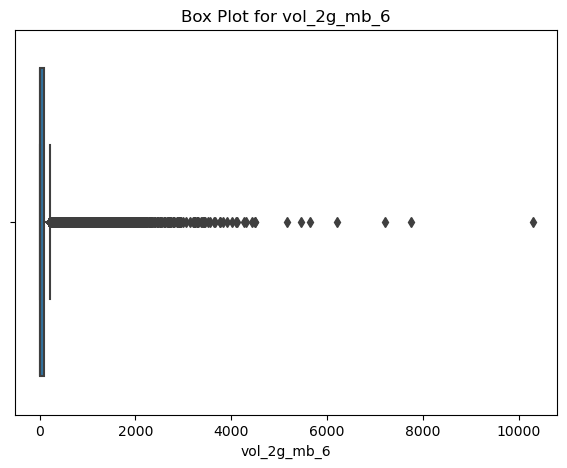

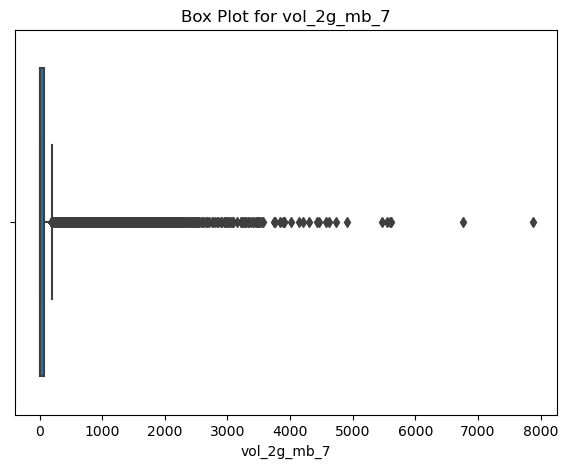

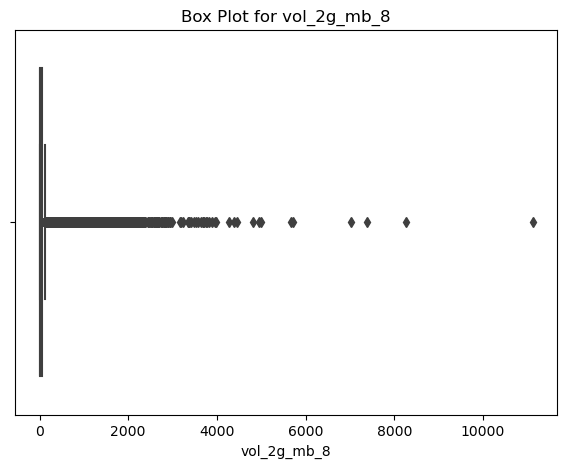

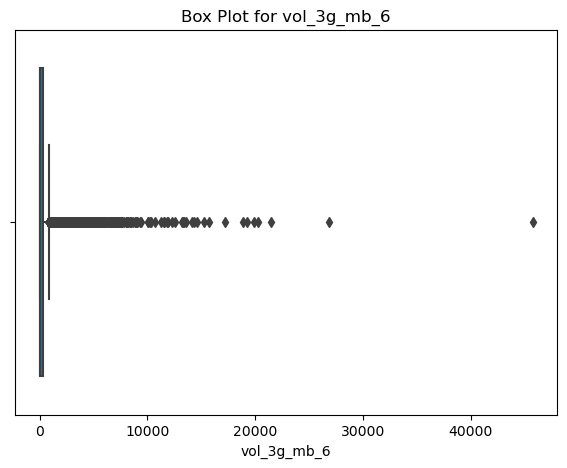

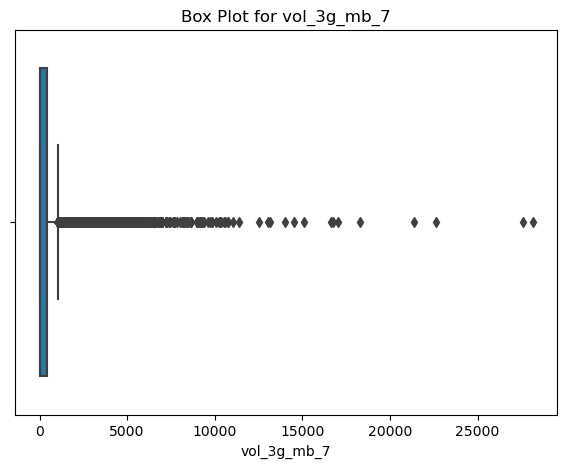

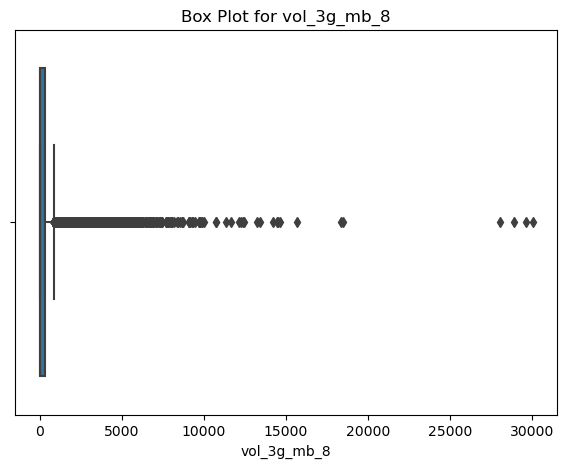

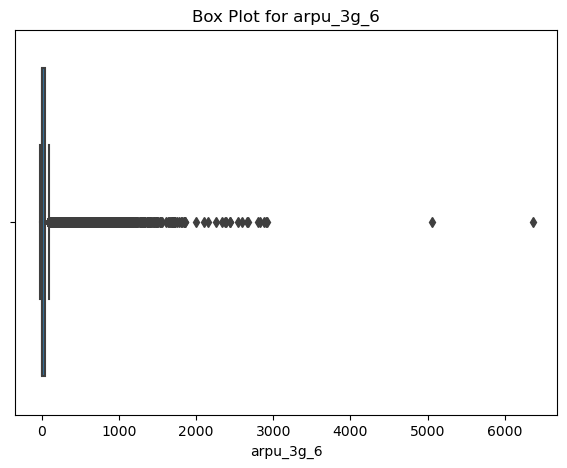

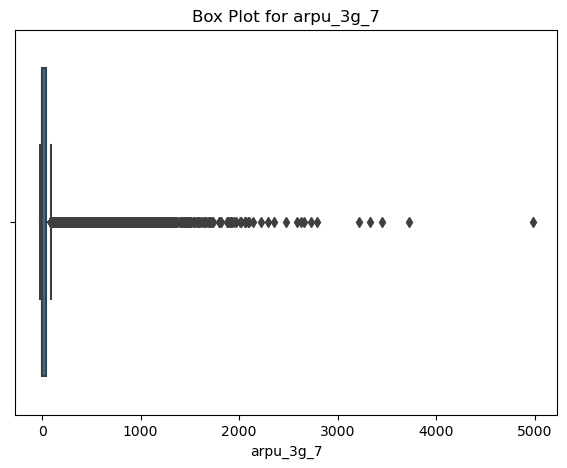

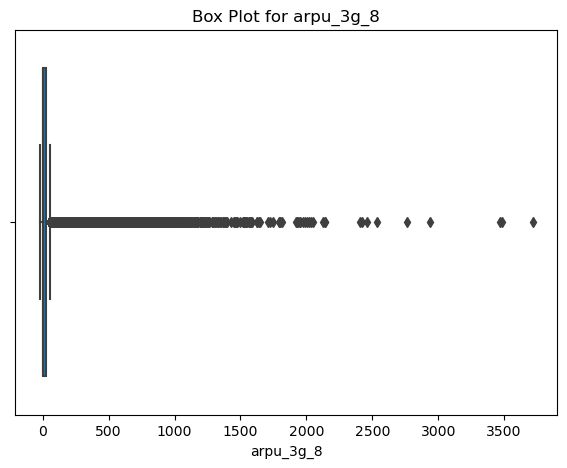

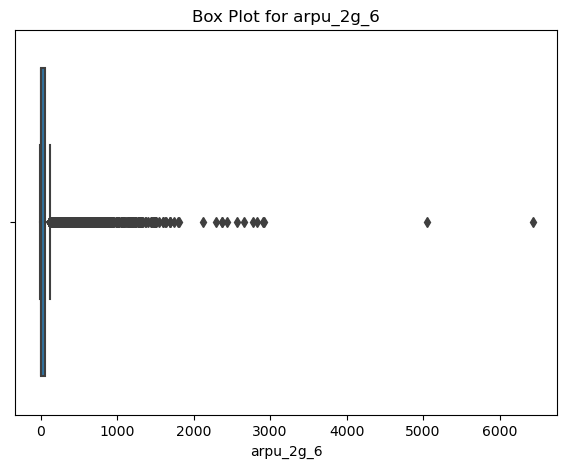

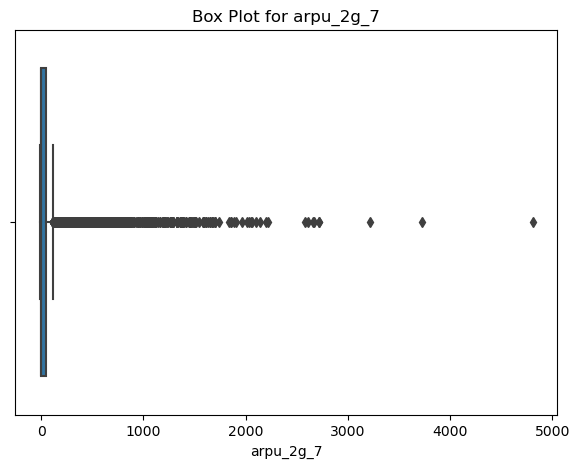

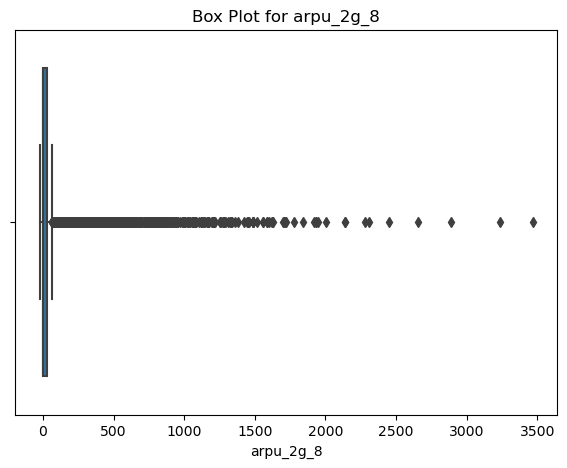

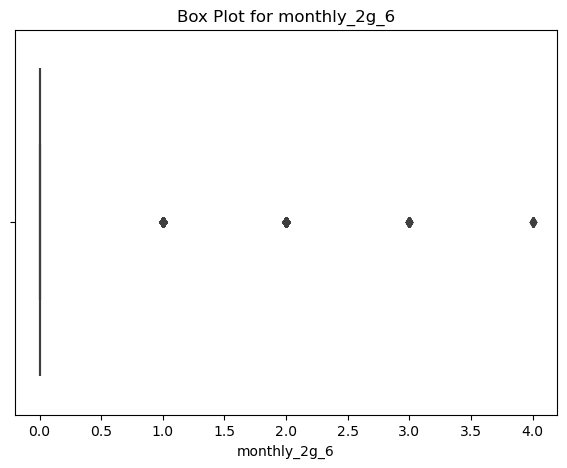

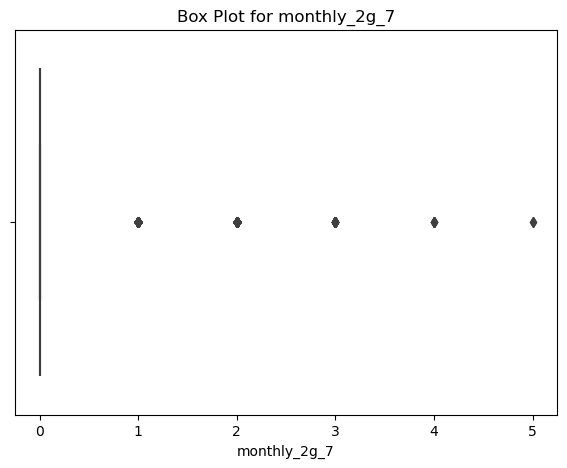

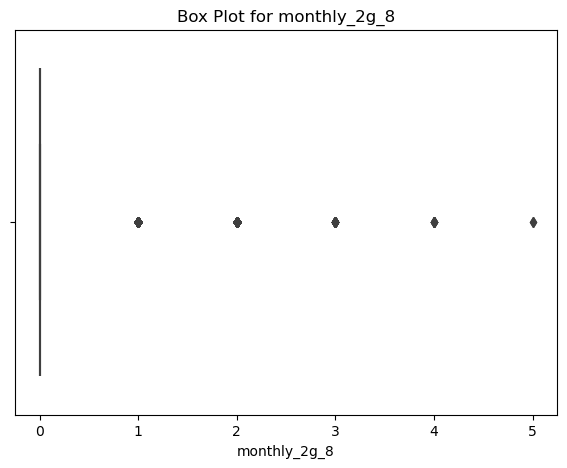

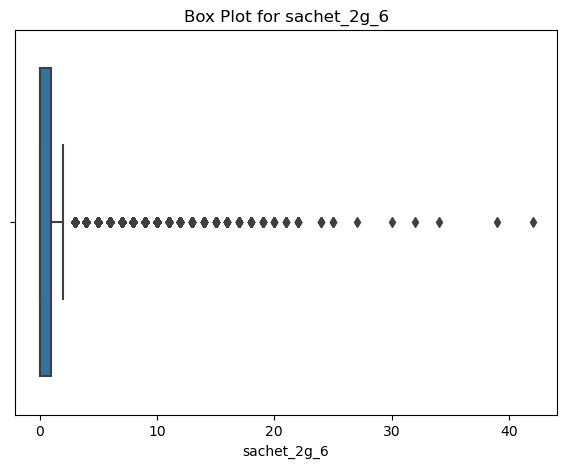

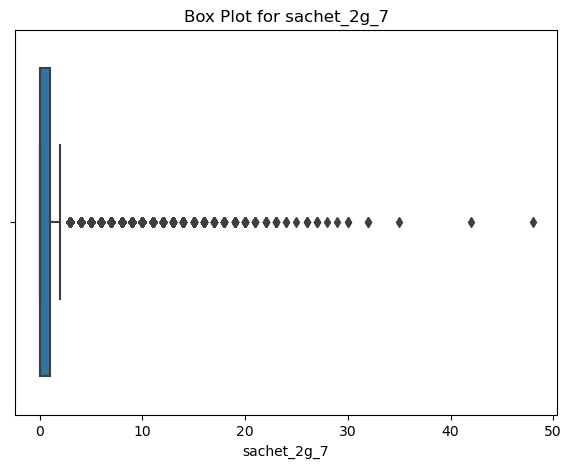

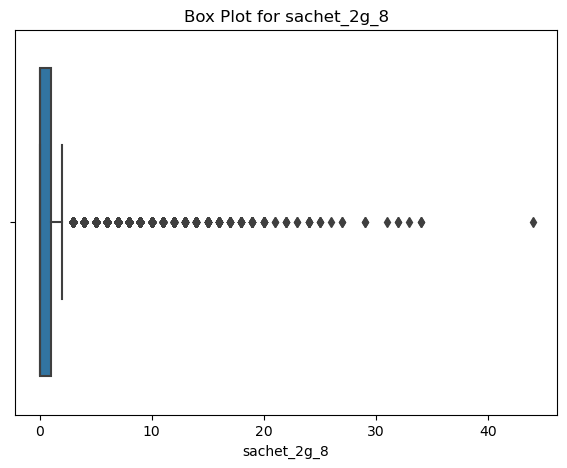

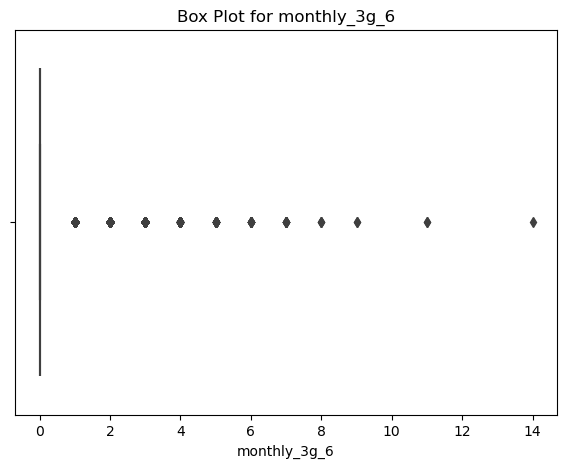

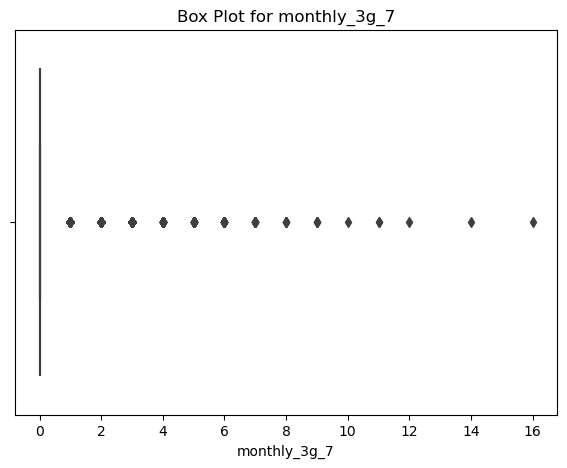

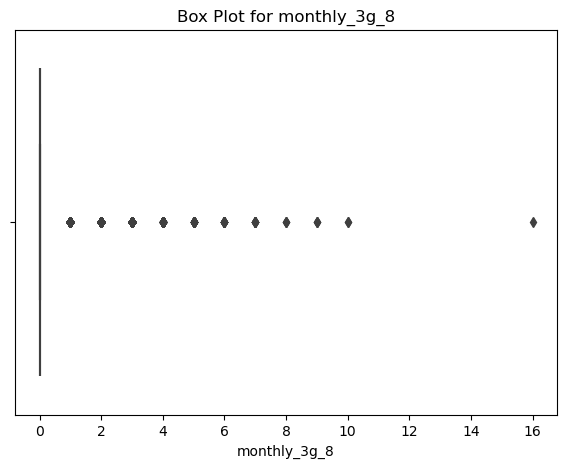

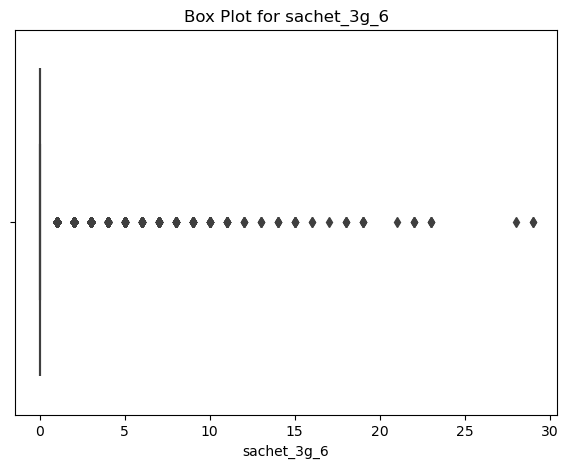

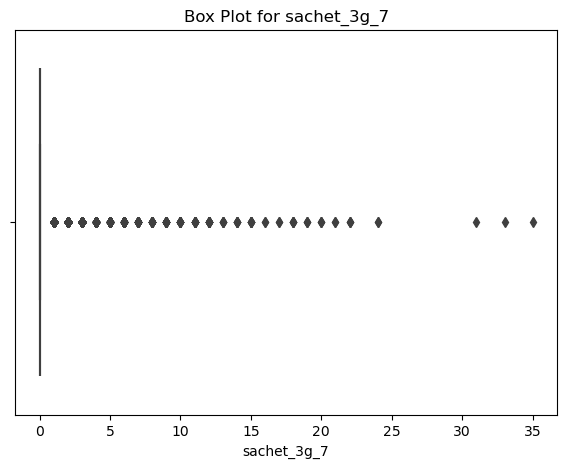

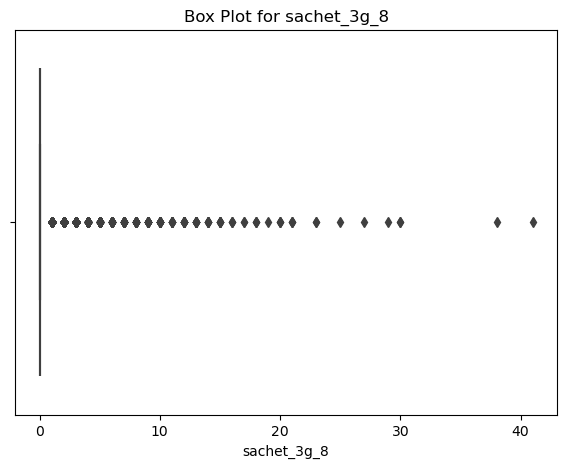

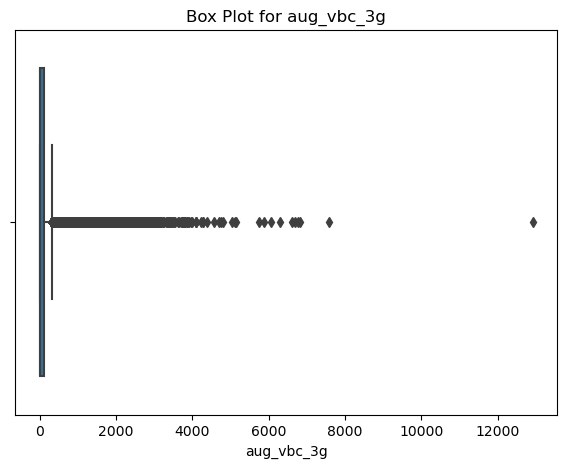

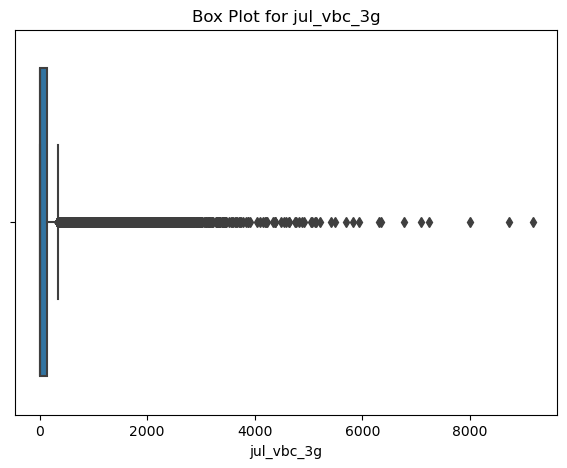

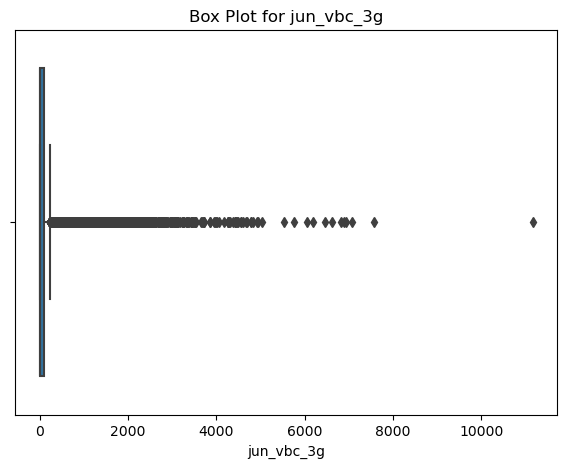

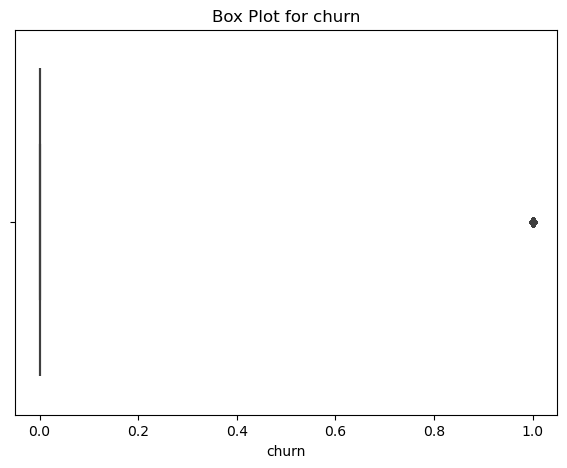

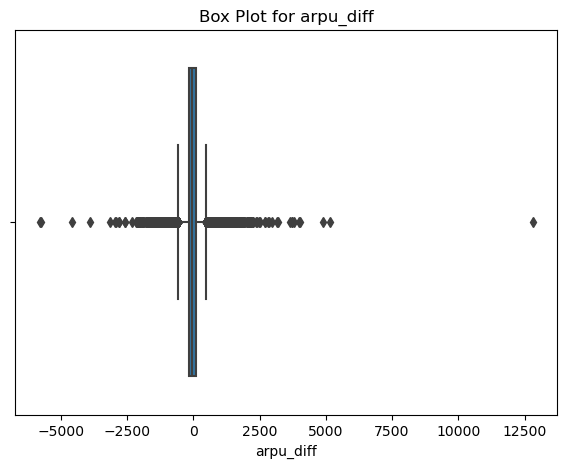

In [39]:
# Creating Univariate boxplots from continuous variables
def boxplot(columns):
    for col in columns:
        plt.figure(figsize=(7, 5))  # Set figure size
        sns.boxplot(x=df4[col])  # Create boxplot
        plt.title(f"Box Plot for {col}")  # Add title
        plt.show()  # Display plot

boxplot(num_cols)

#### All the columns have high outliers based on the plots and we need to do the outlier treatment of the numerical columns
### 3.4.2 Bivariate Analysis

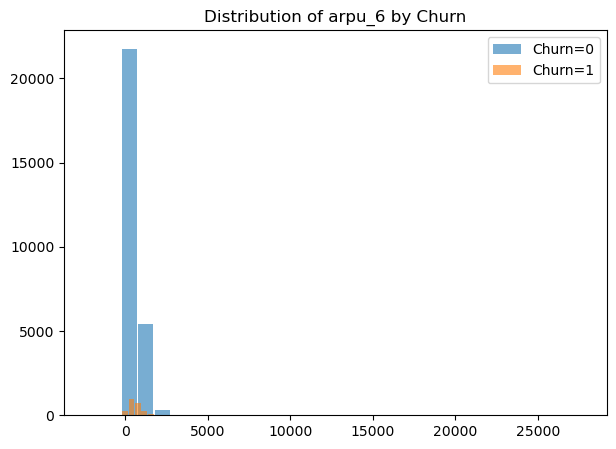

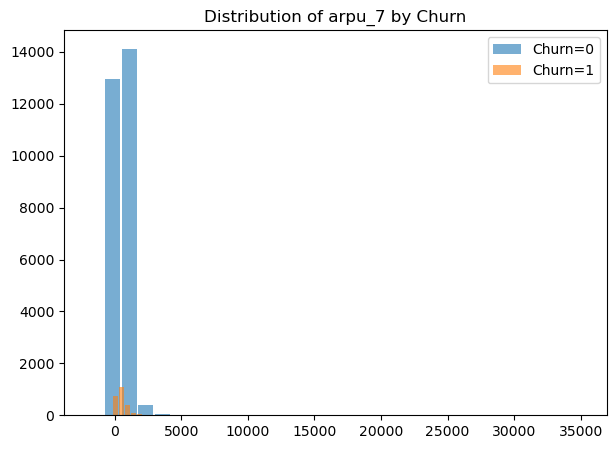

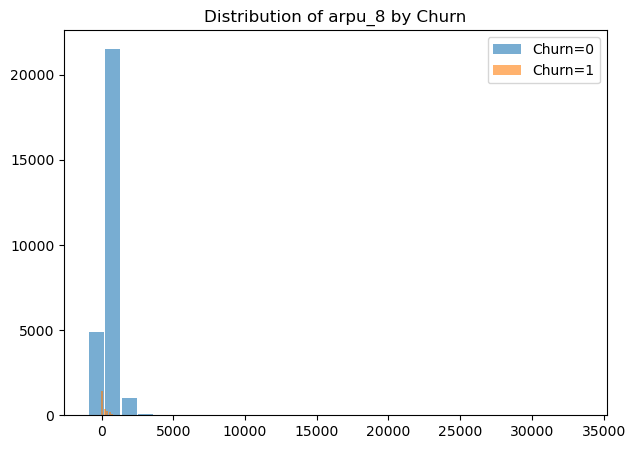

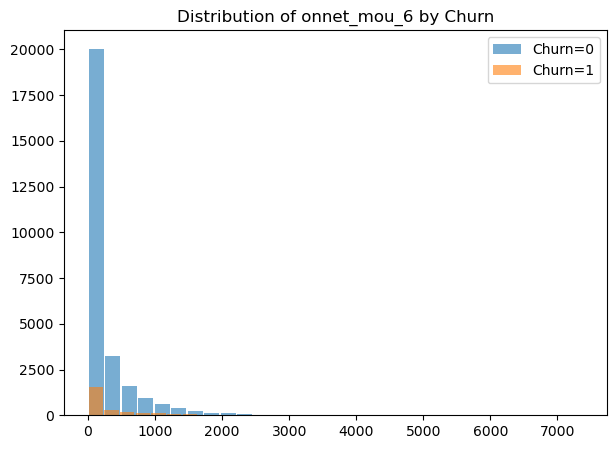

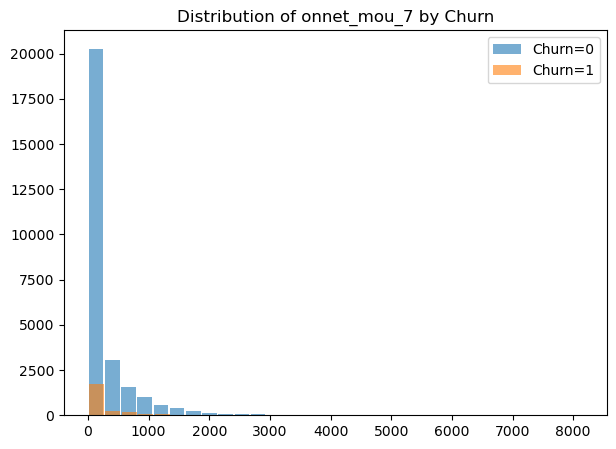

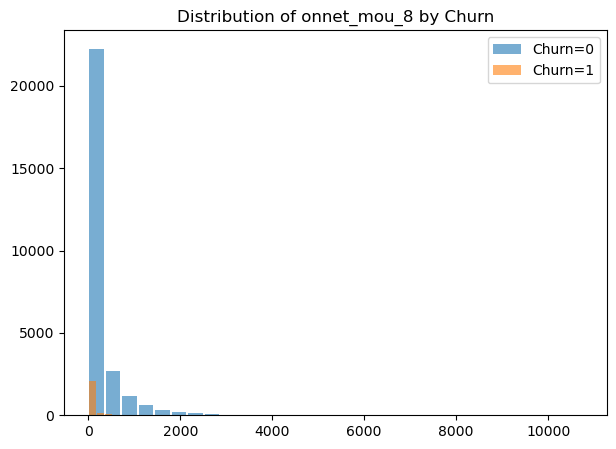

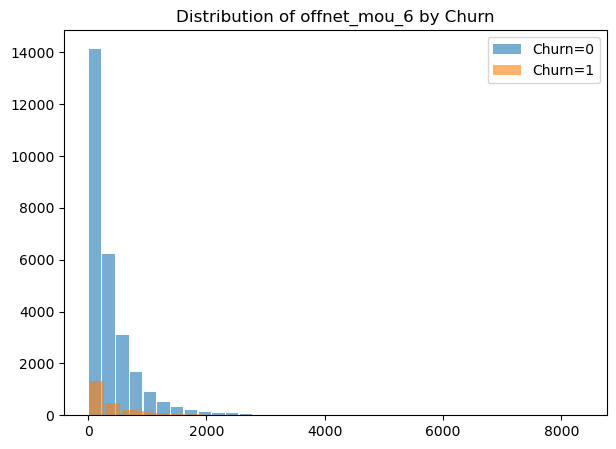

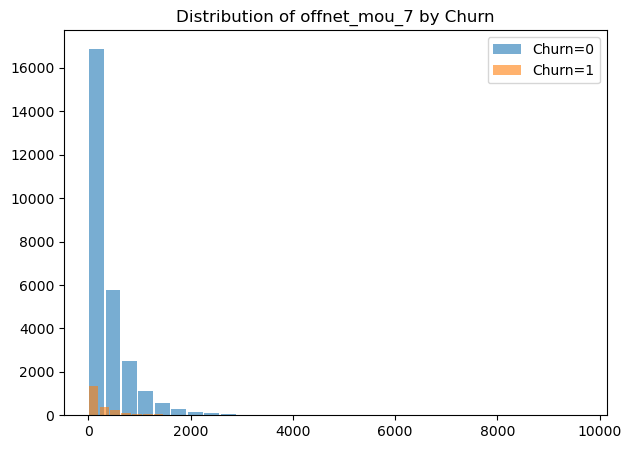

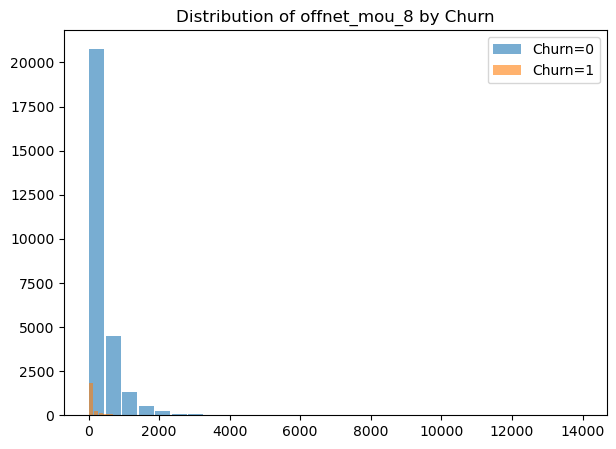

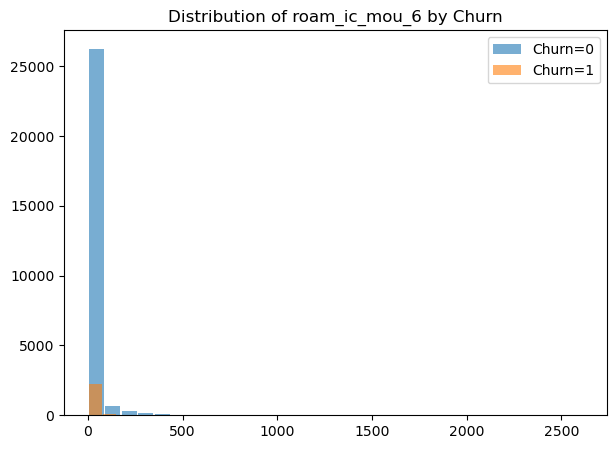

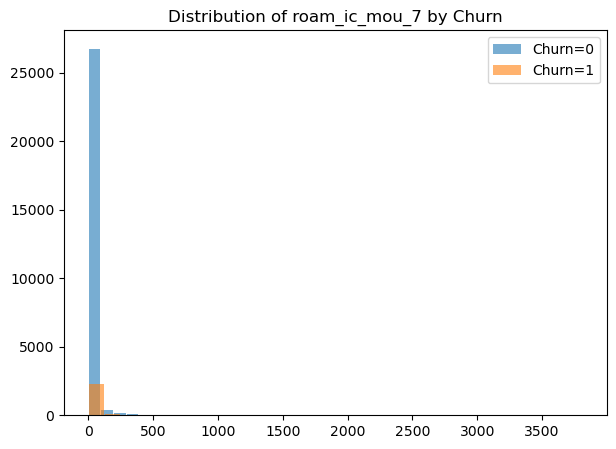

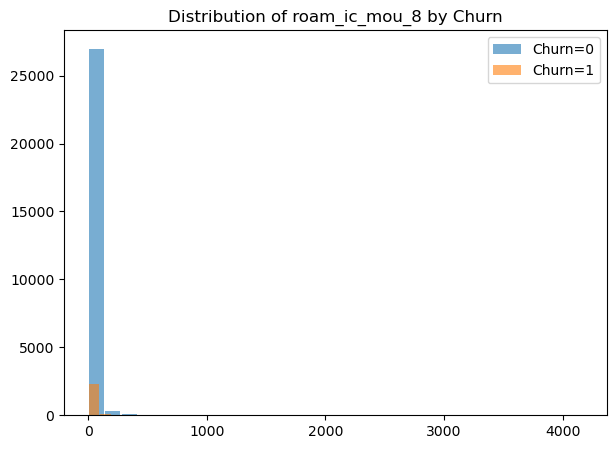

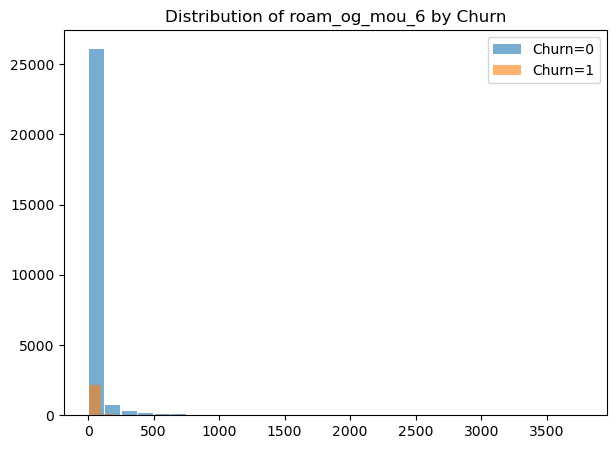

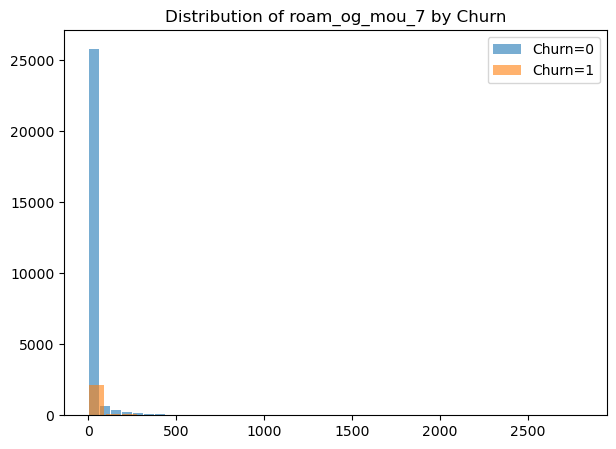

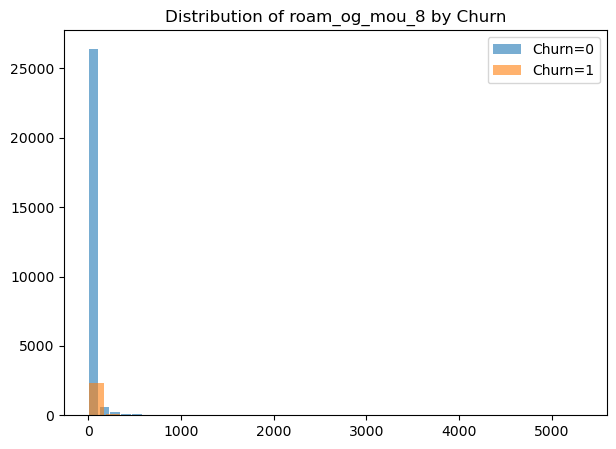

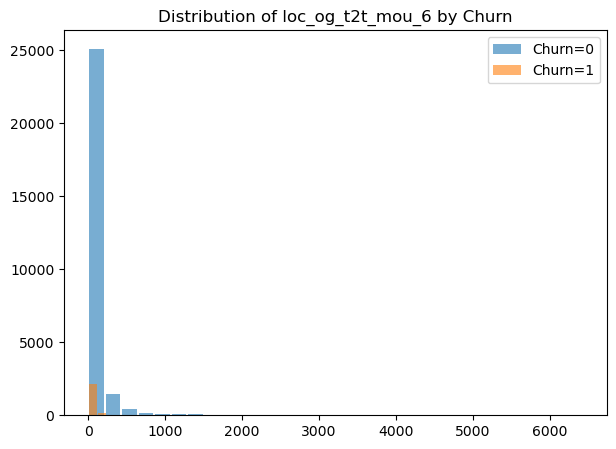

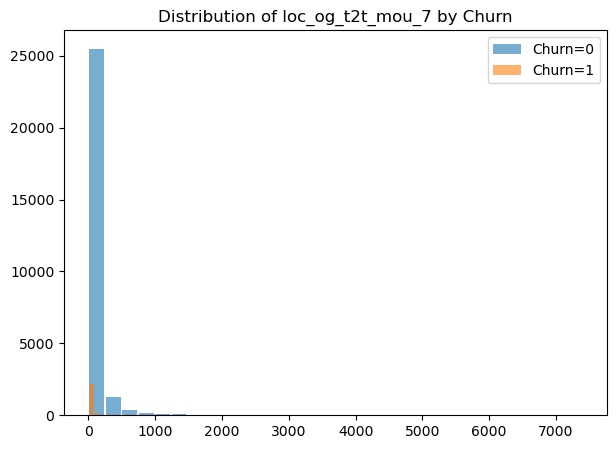

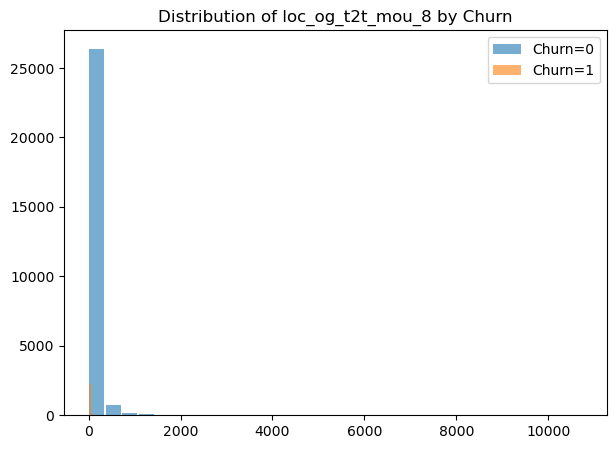

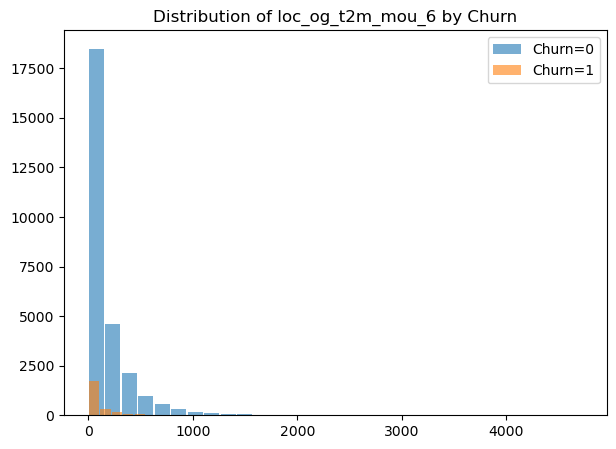

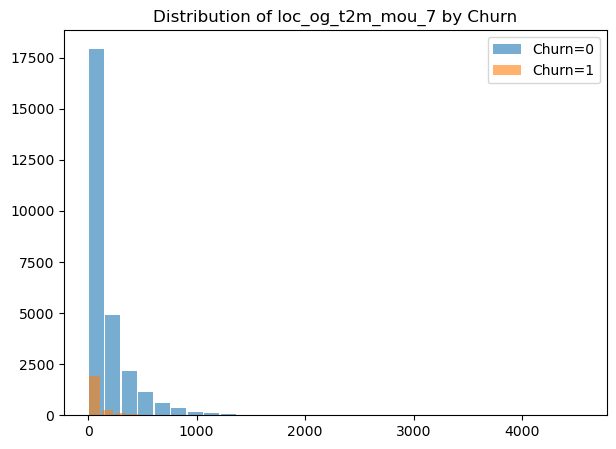

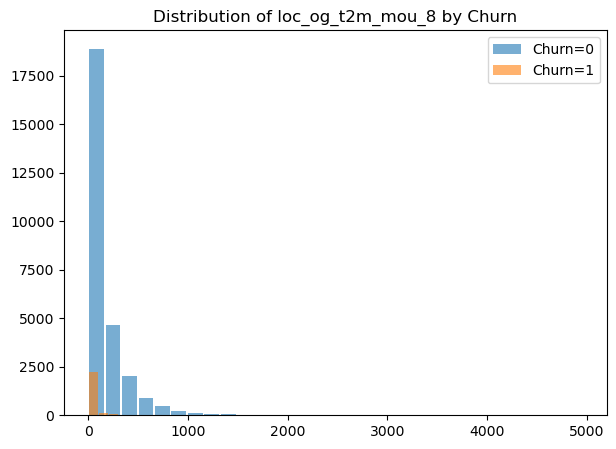

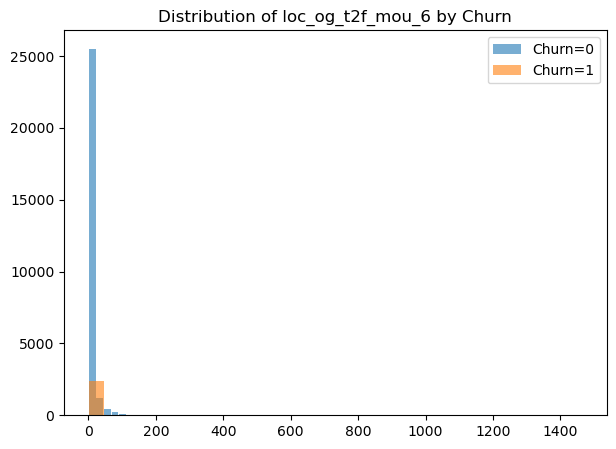

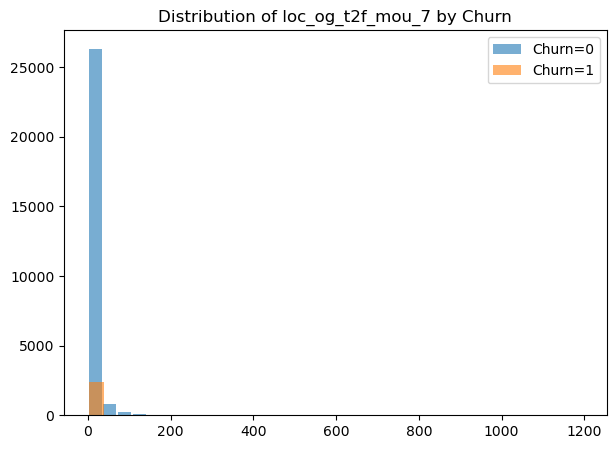

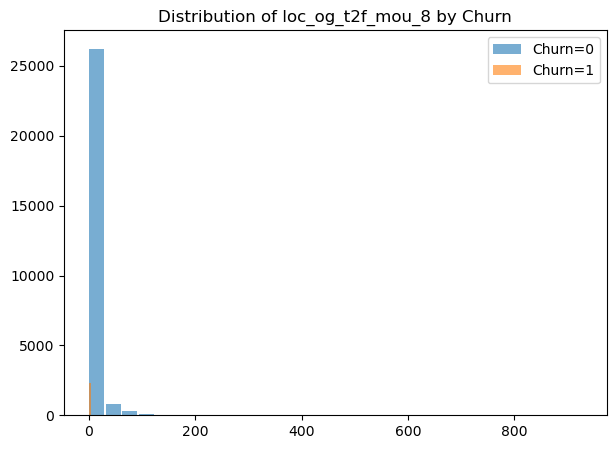

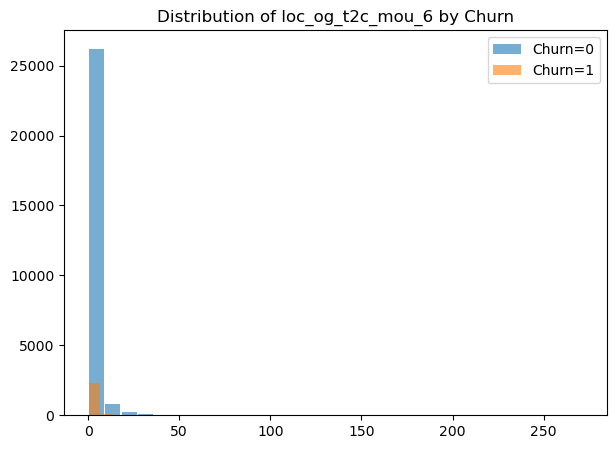

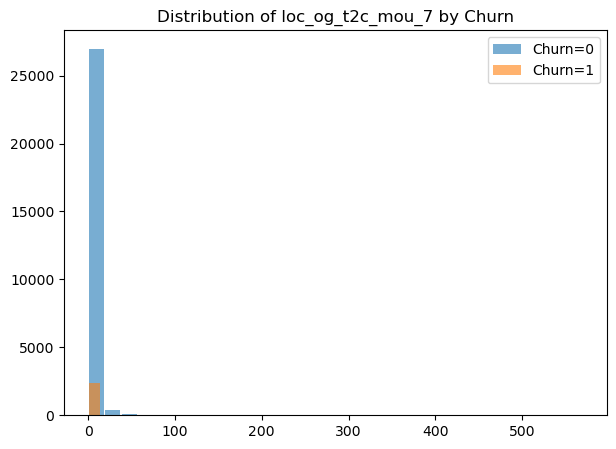

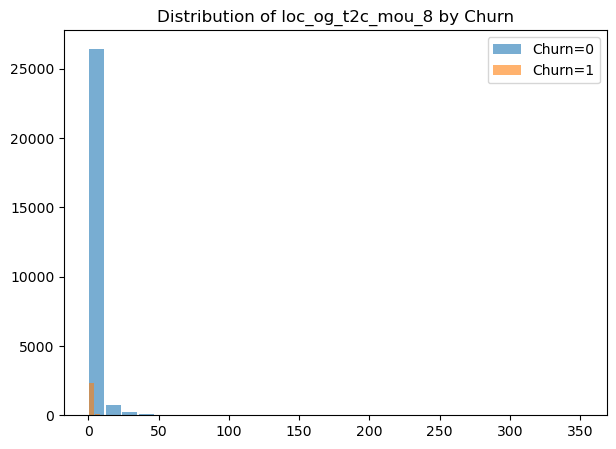

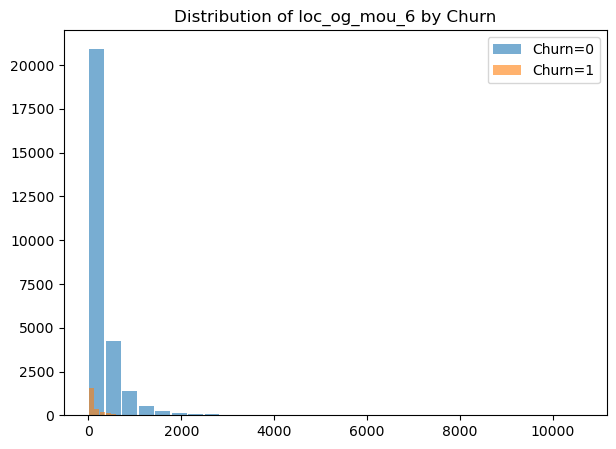

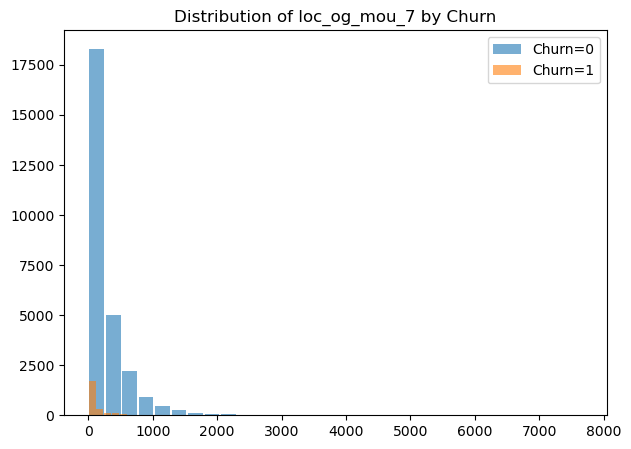

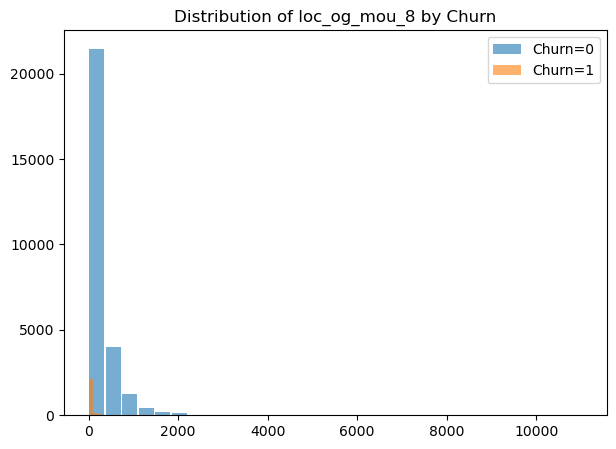

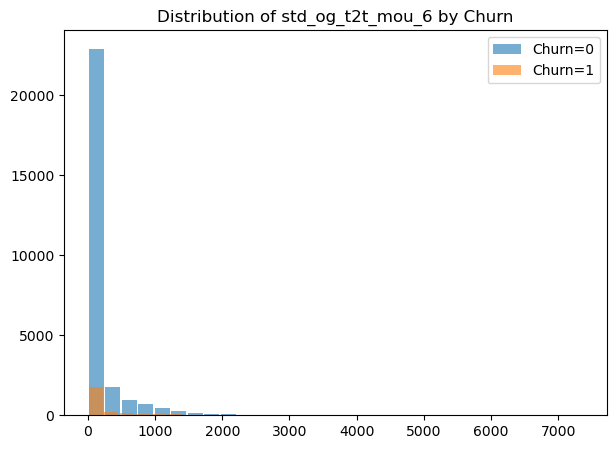

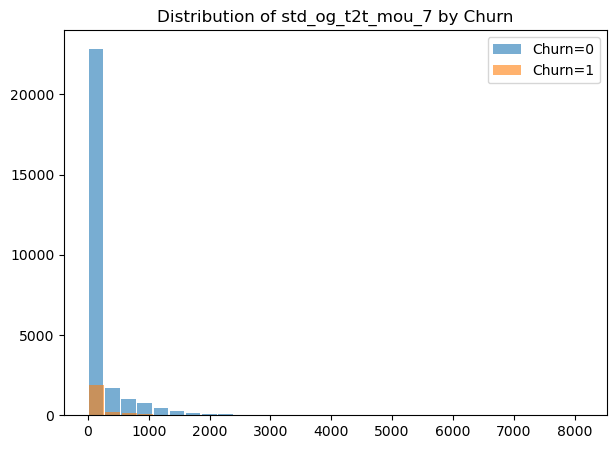

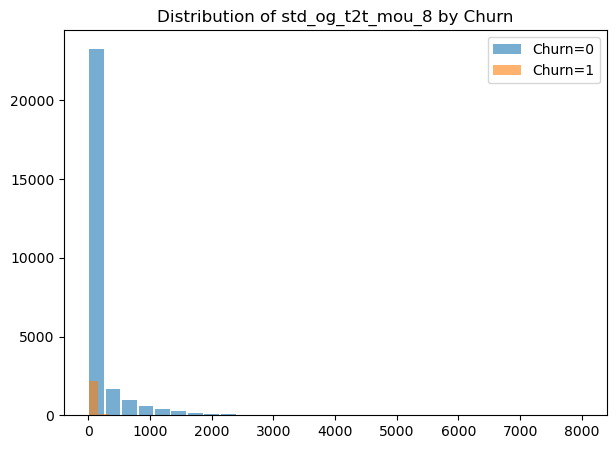

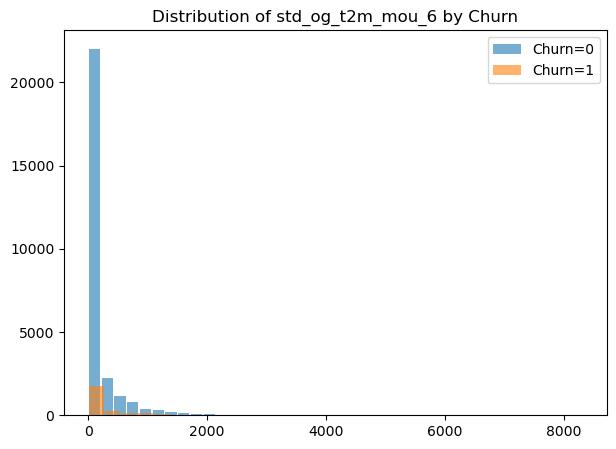

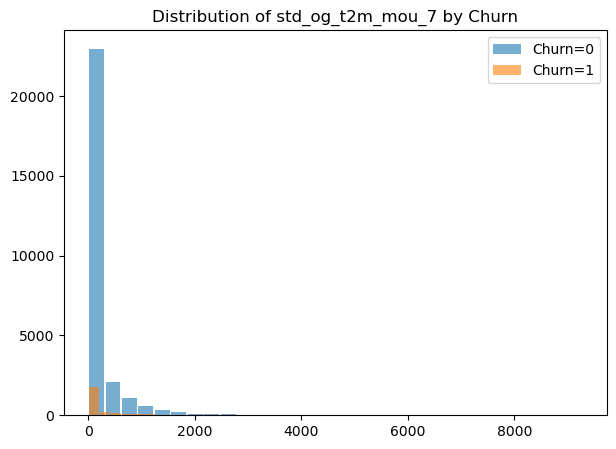

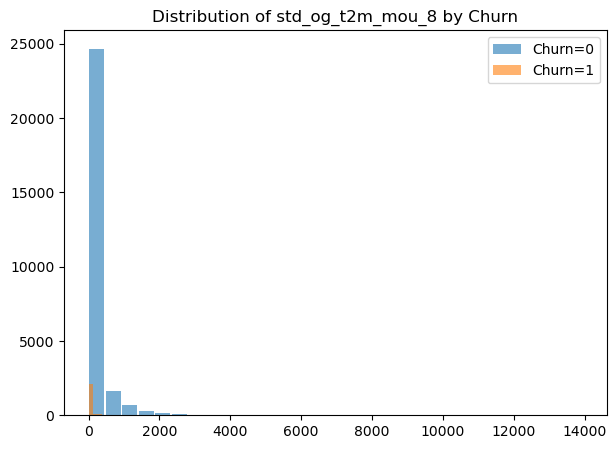

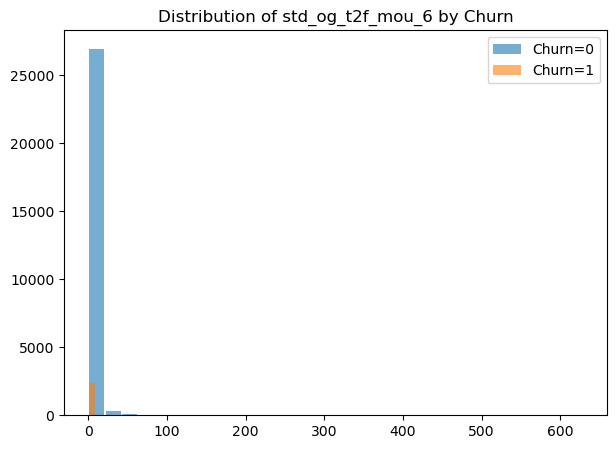

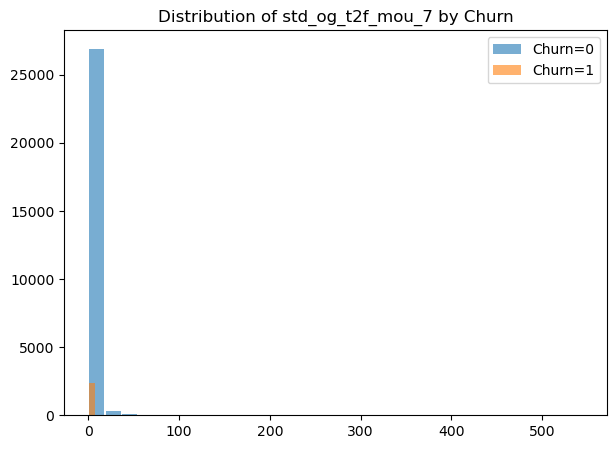

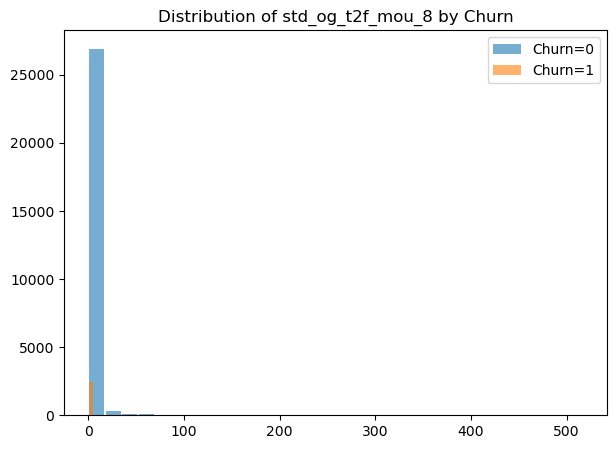

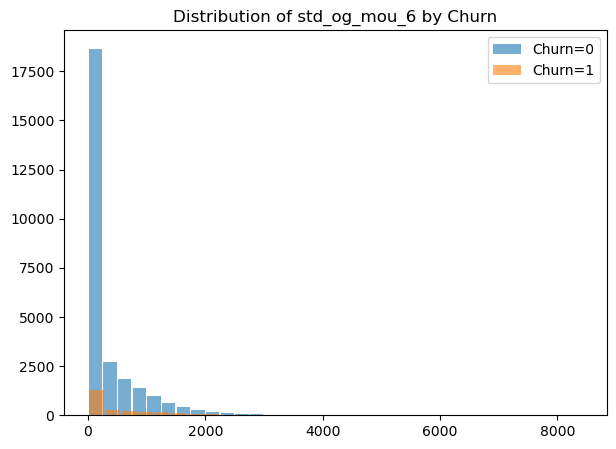

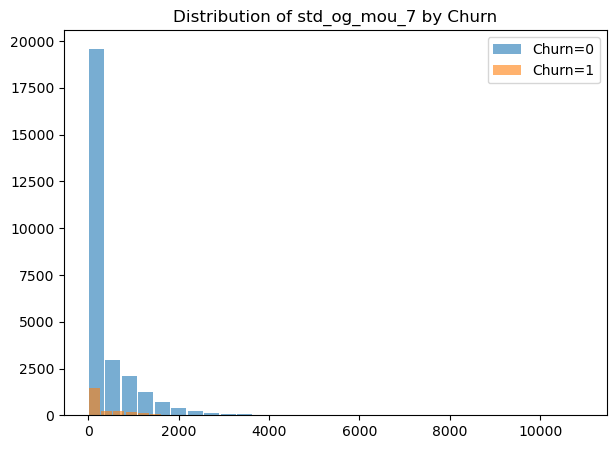

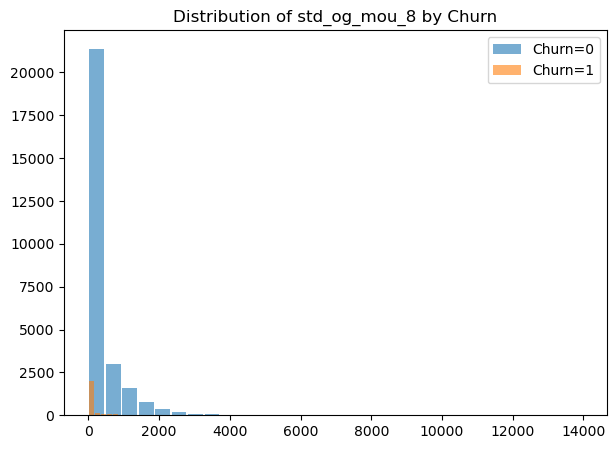

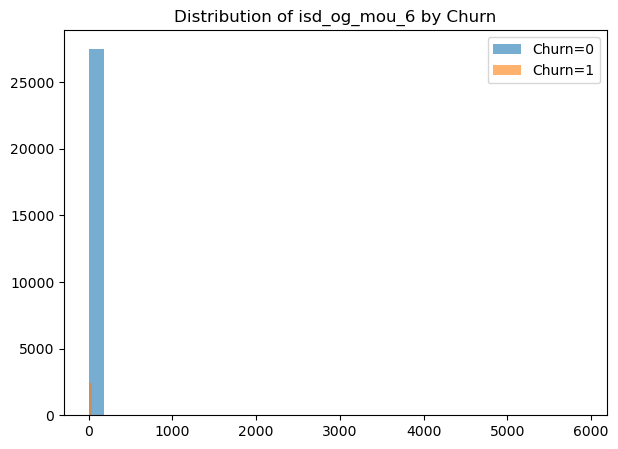

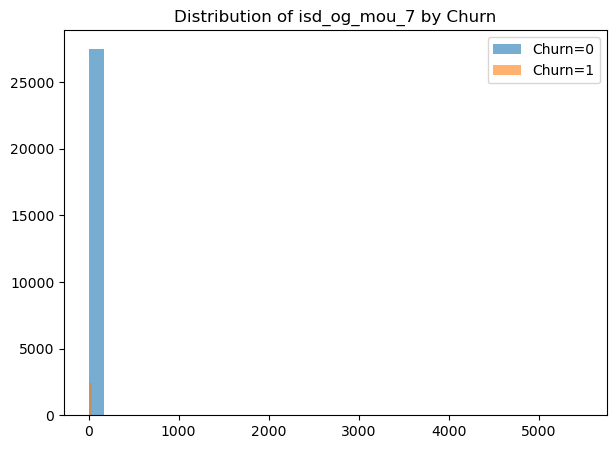

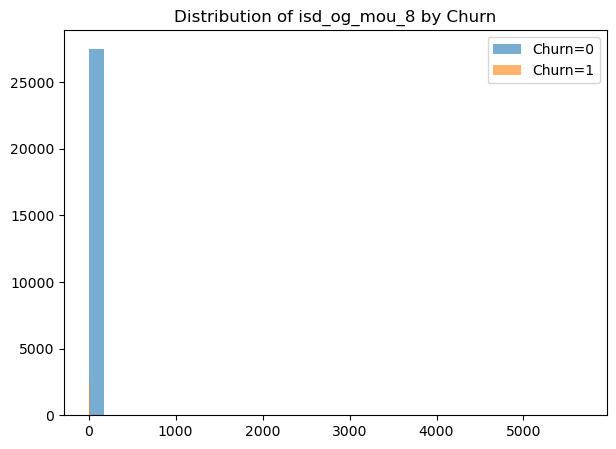

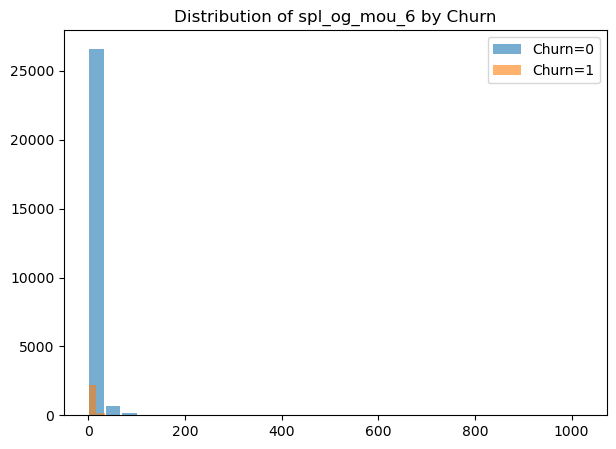

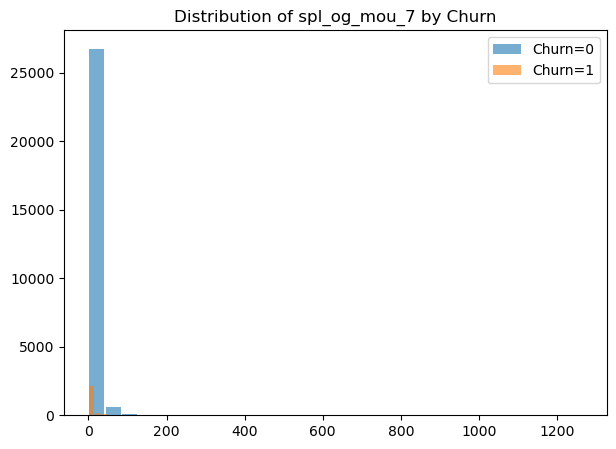

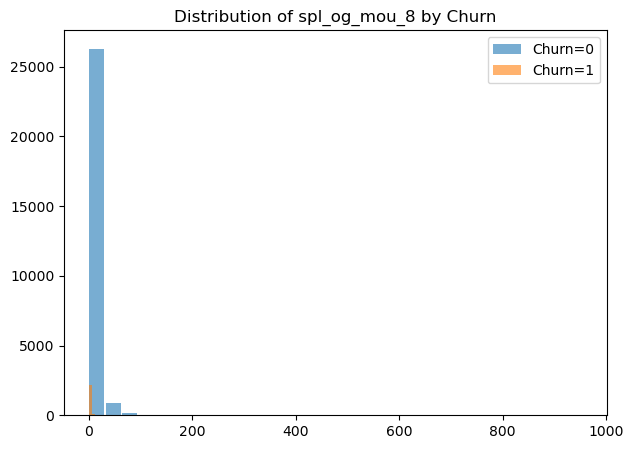

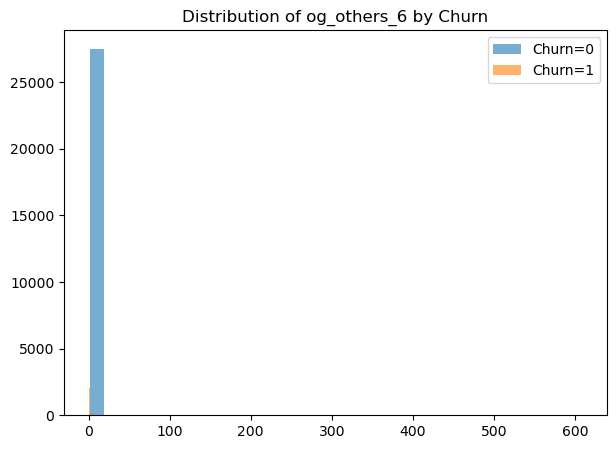

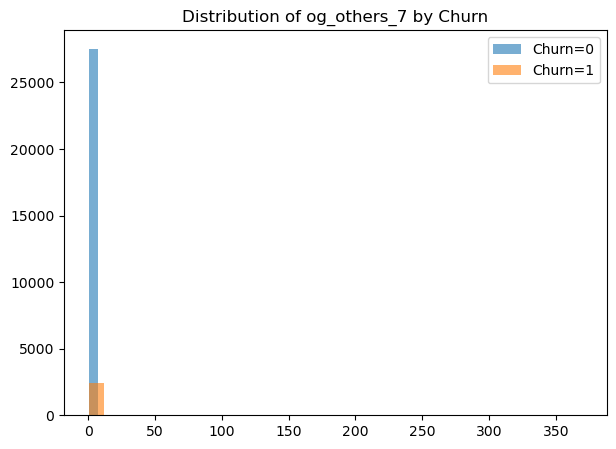

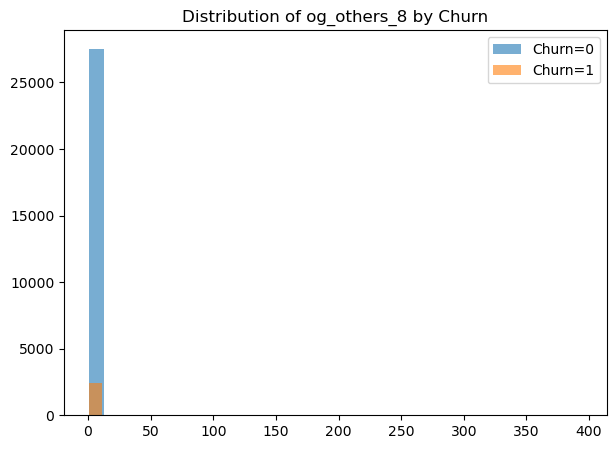

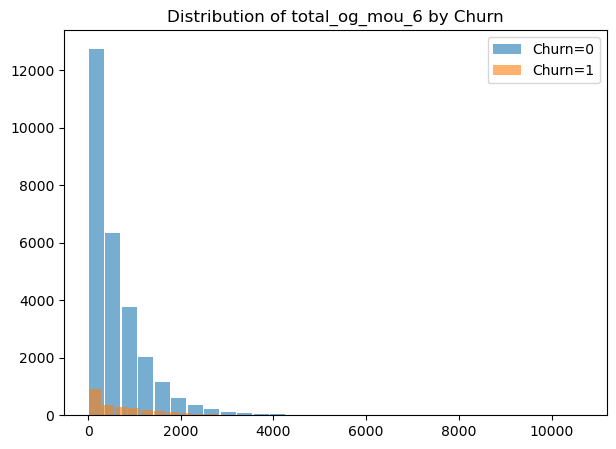

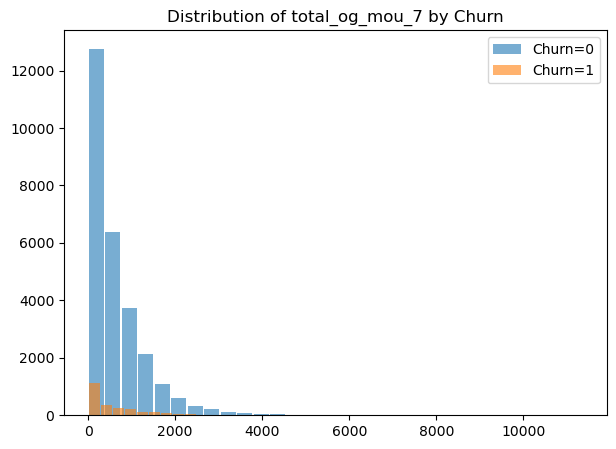

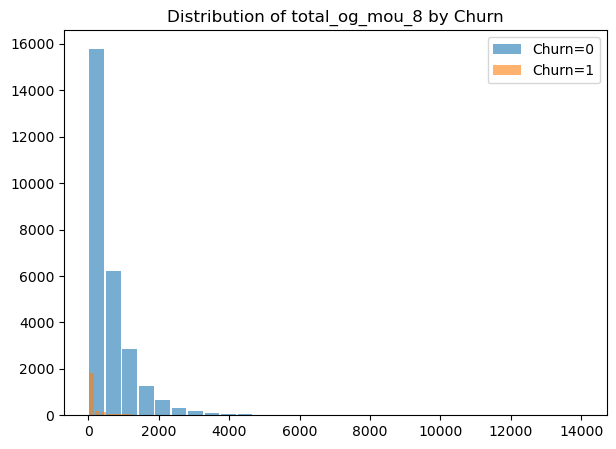

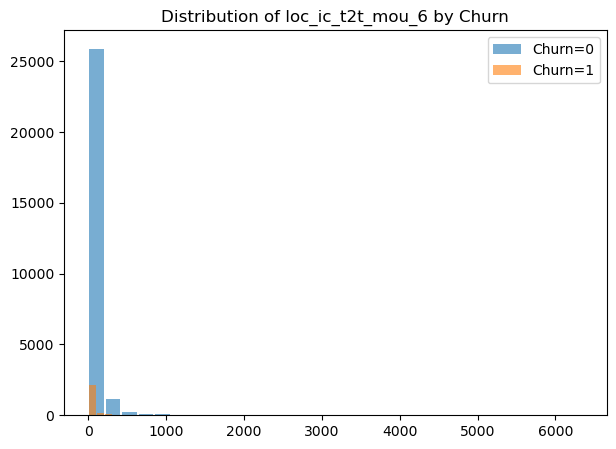

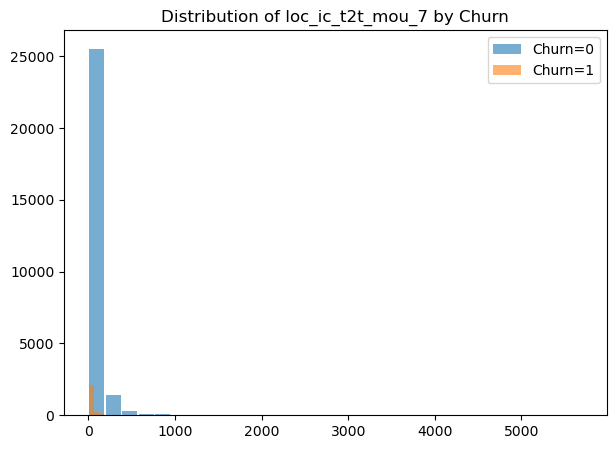

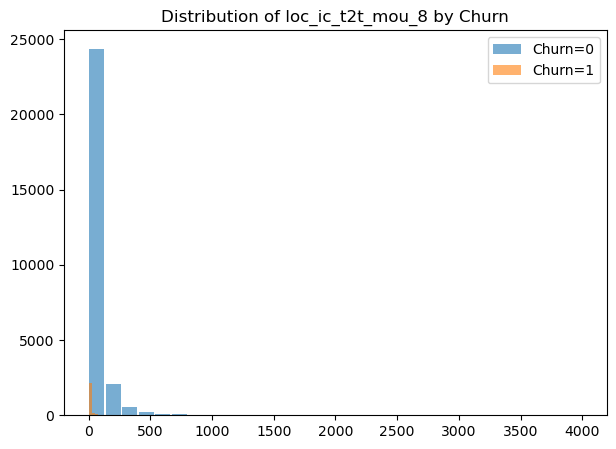

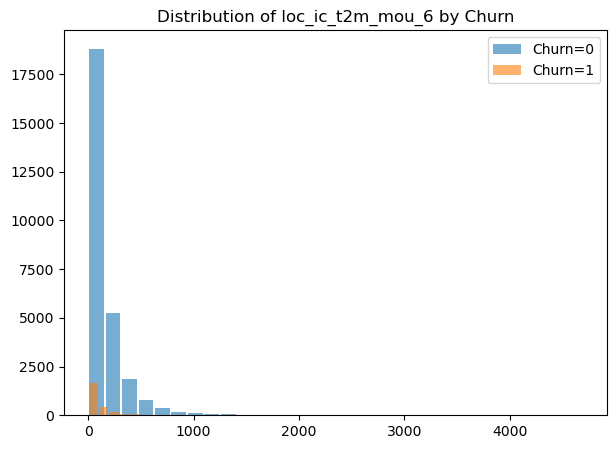

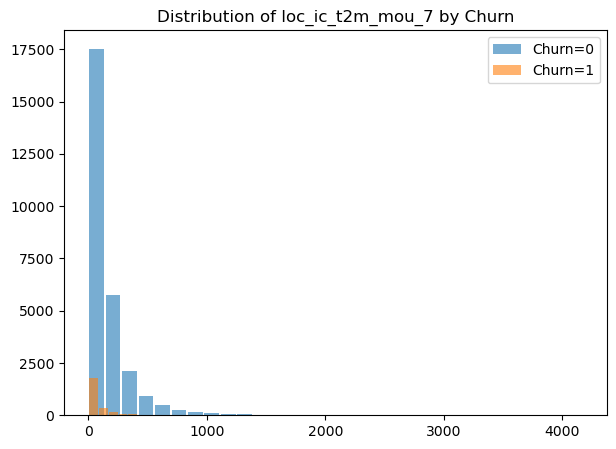

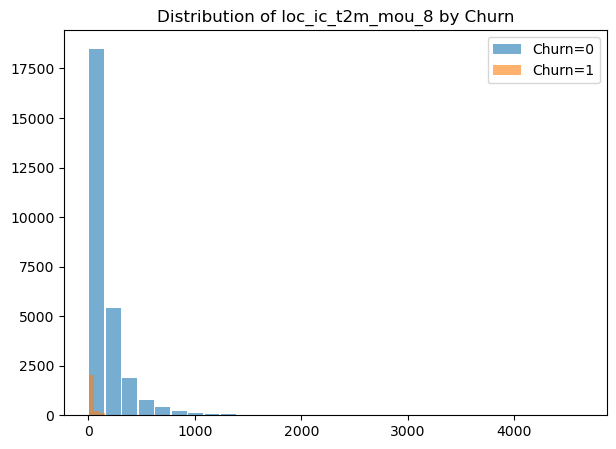

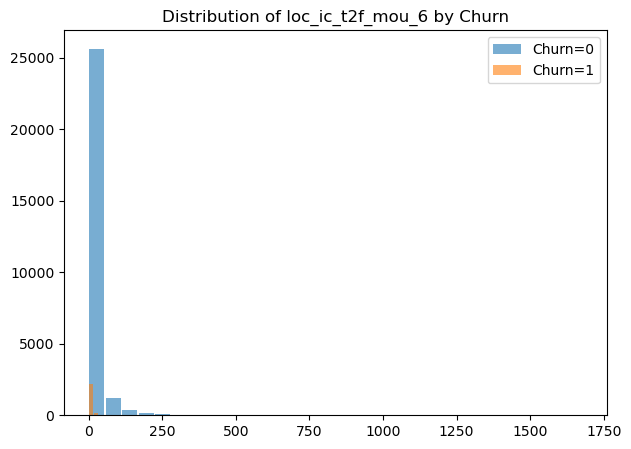

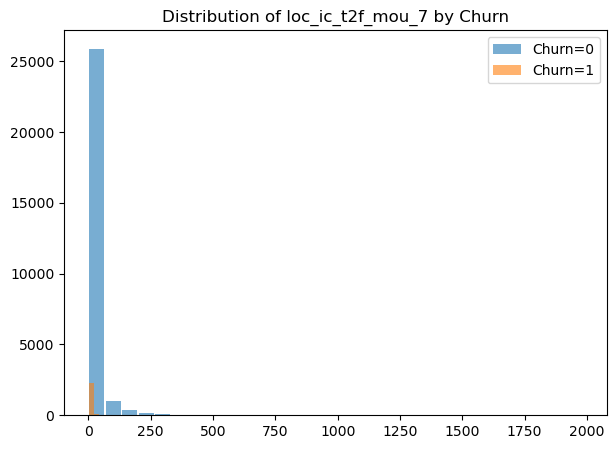

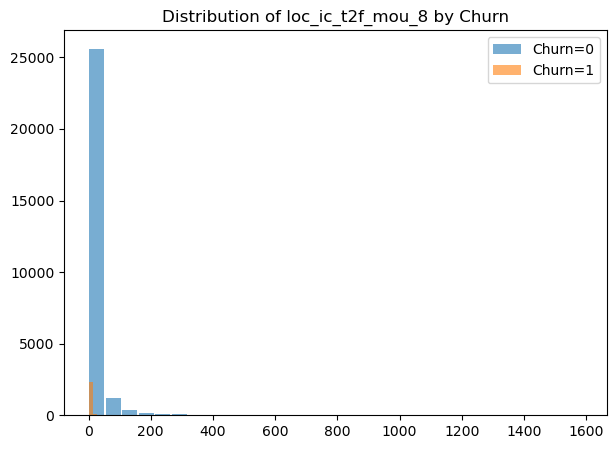

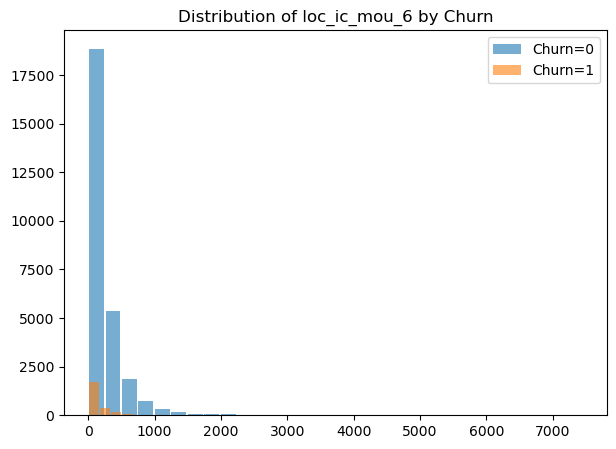

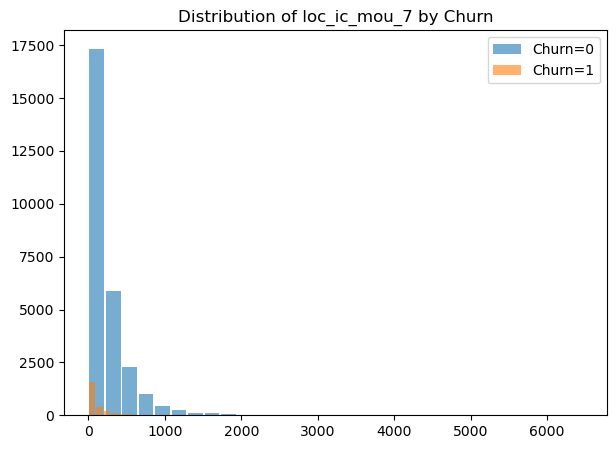

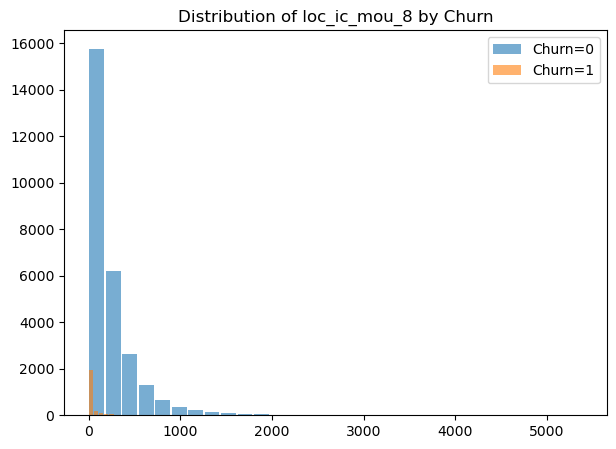

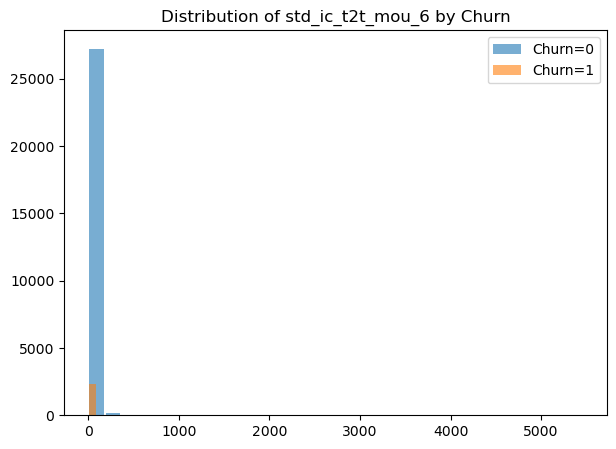

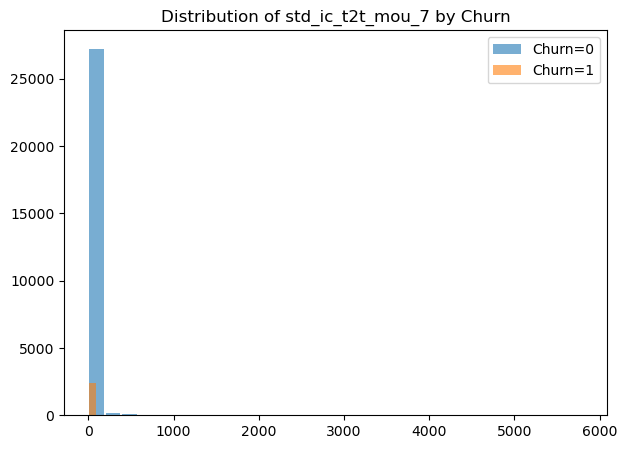

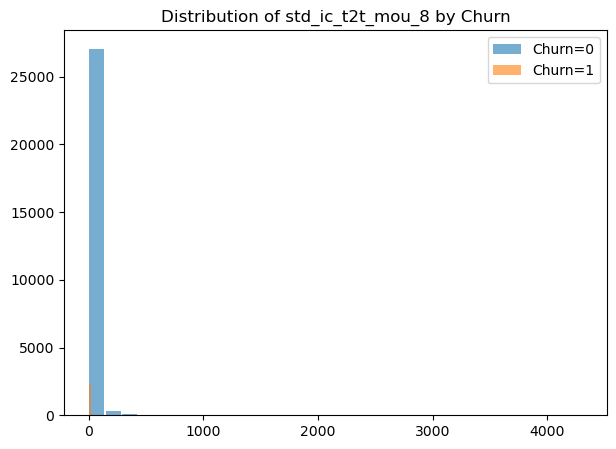

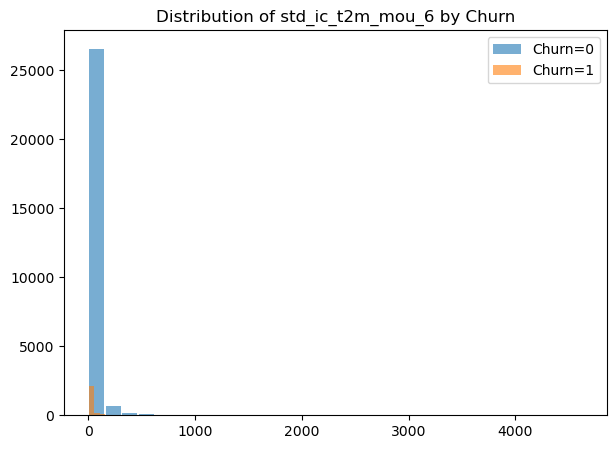

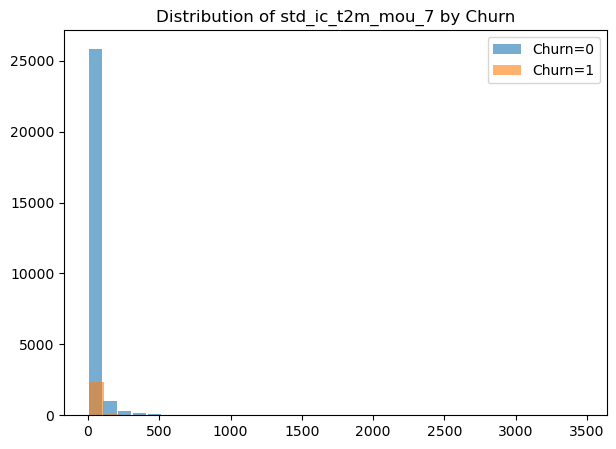

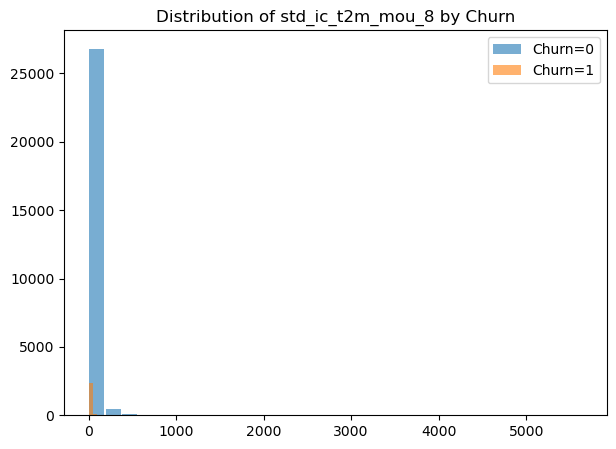

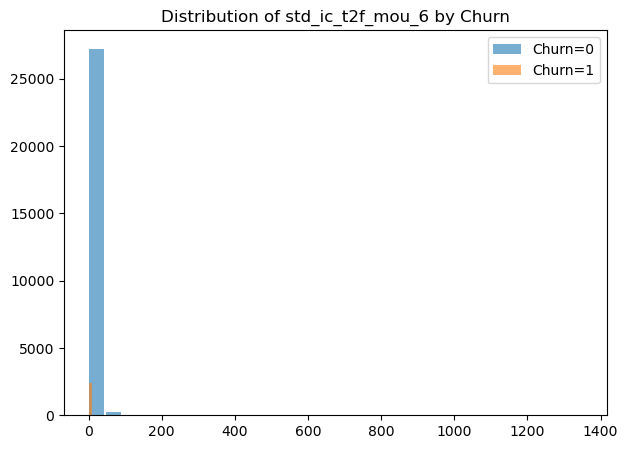

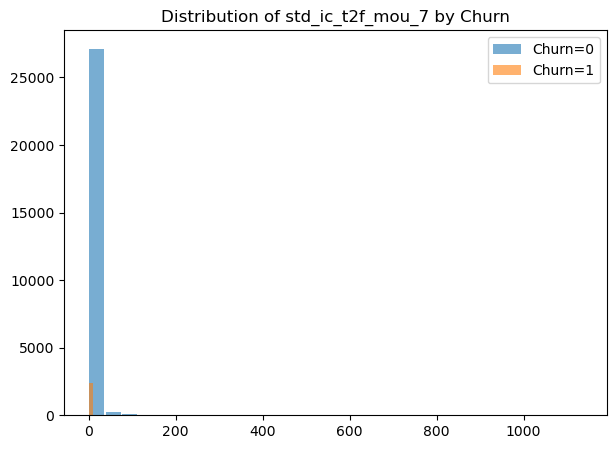

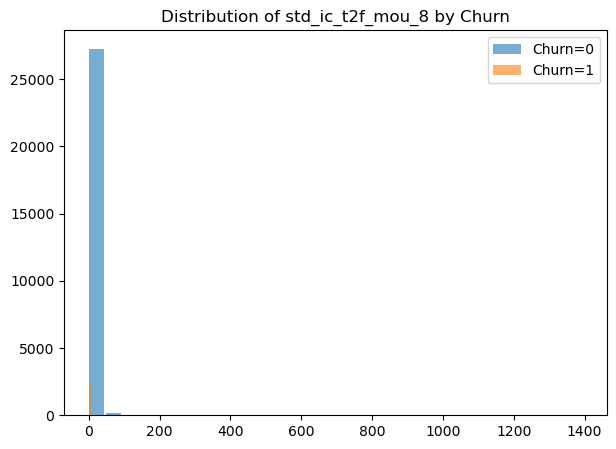

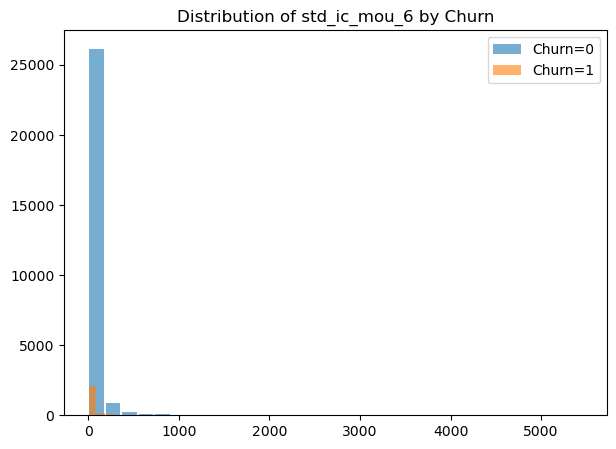

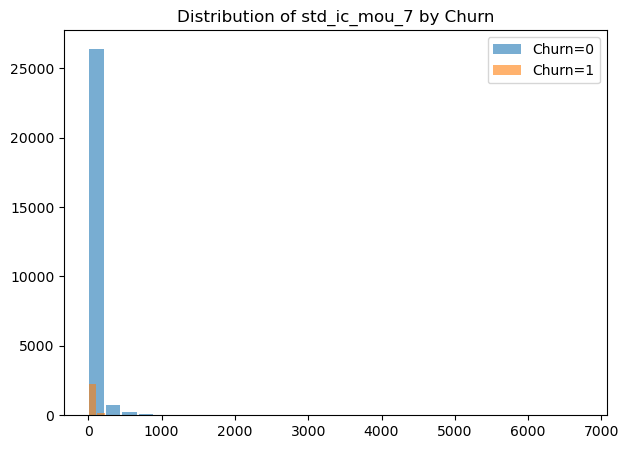

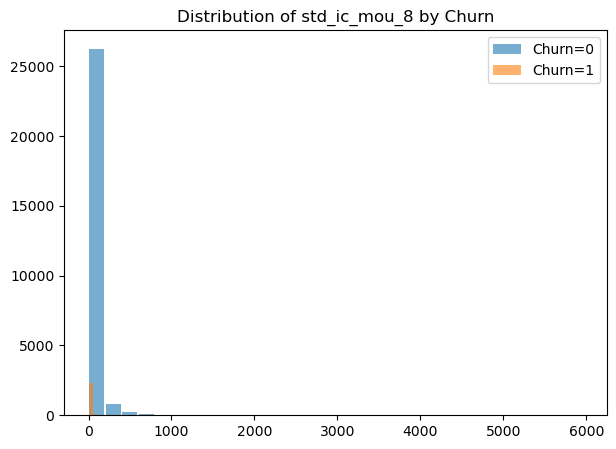

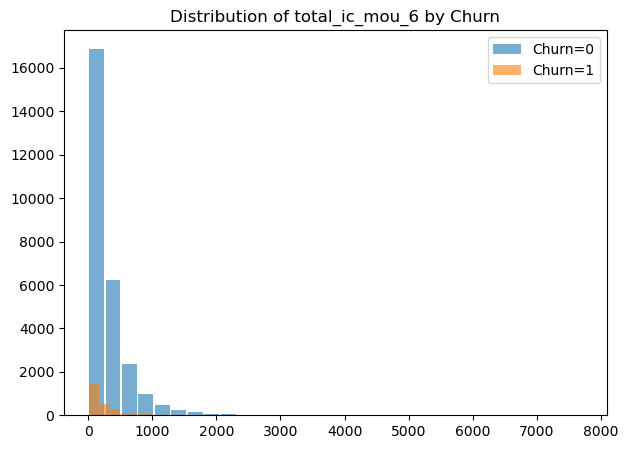

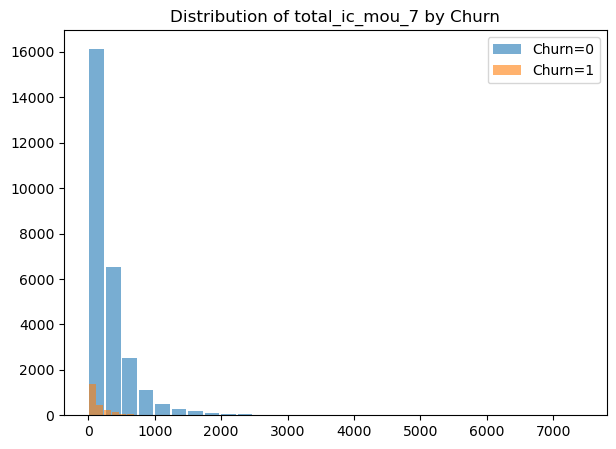

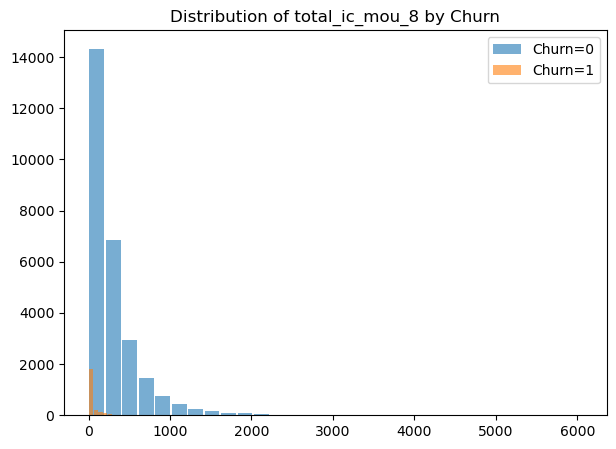

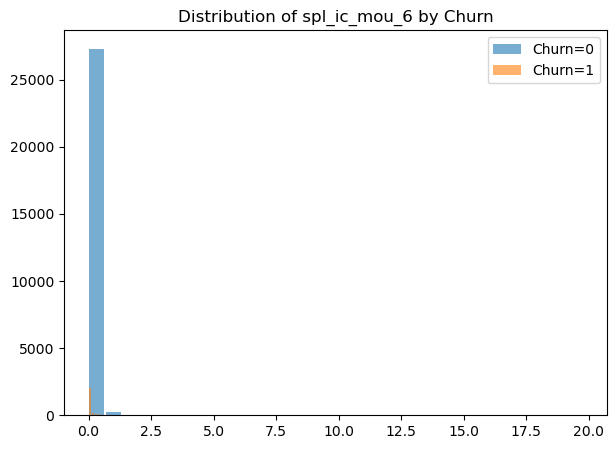

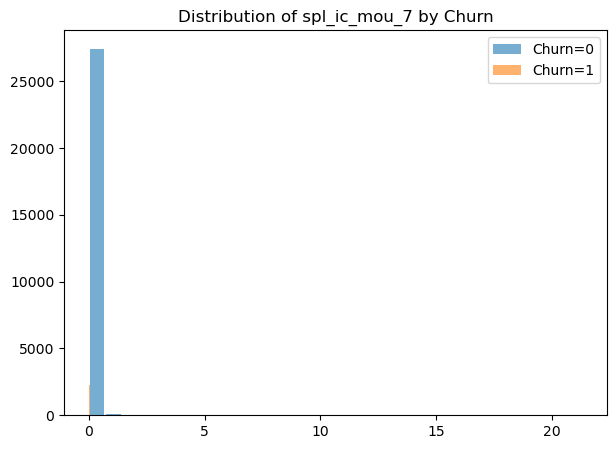

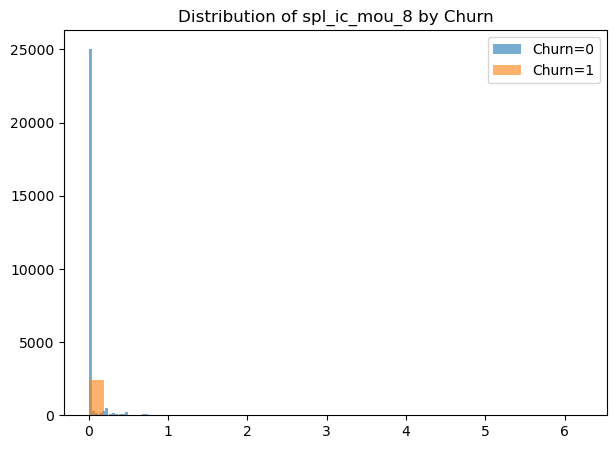

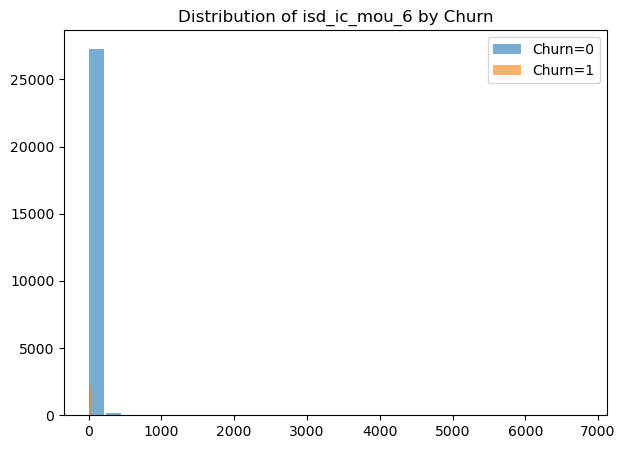

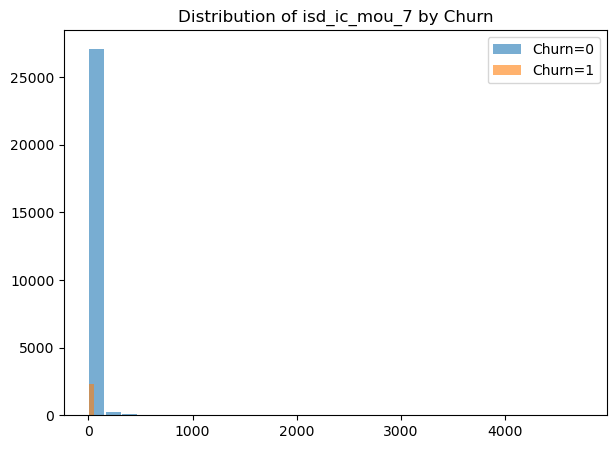

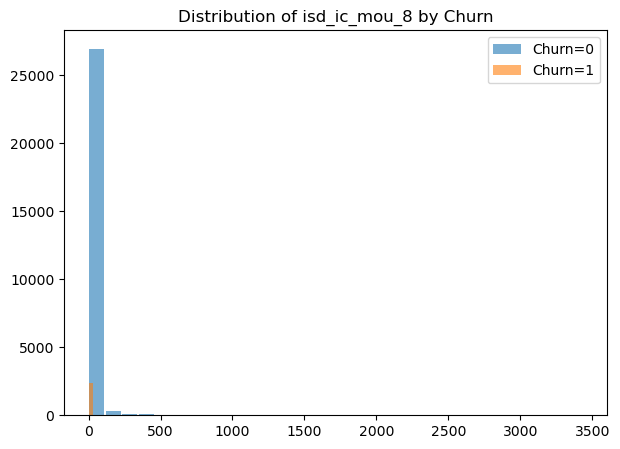

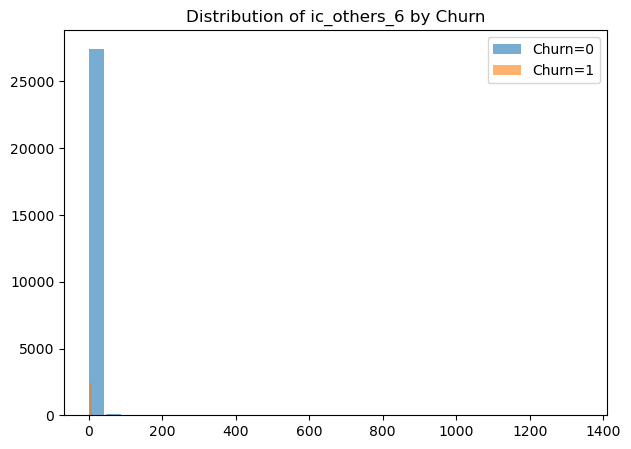

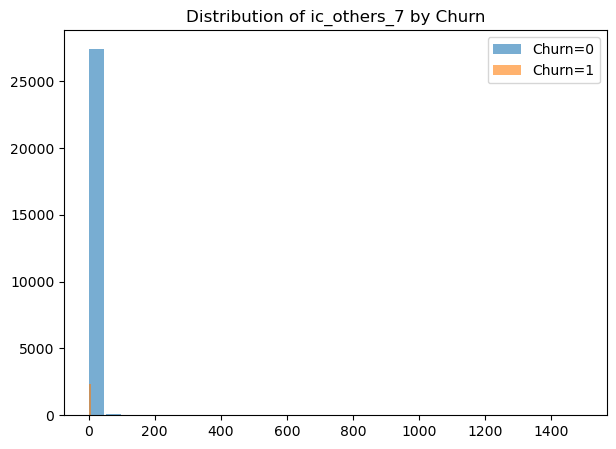

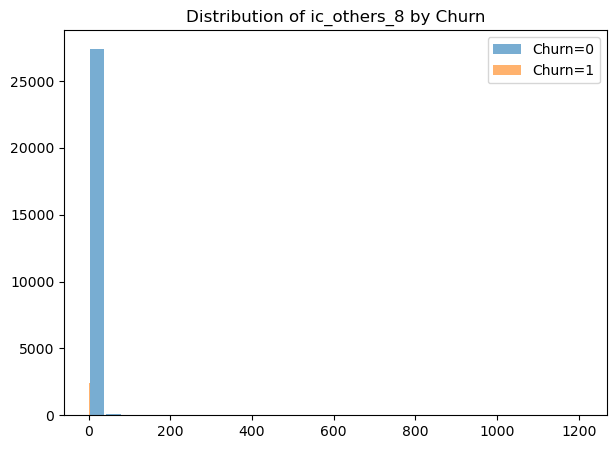

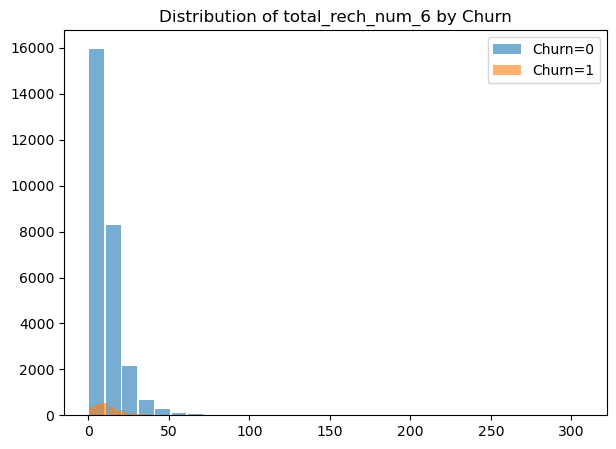

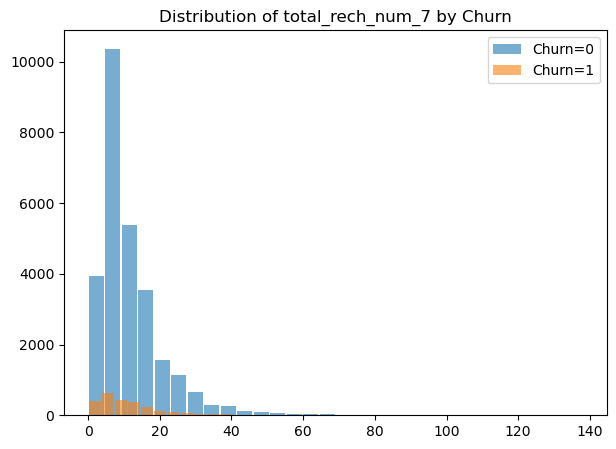

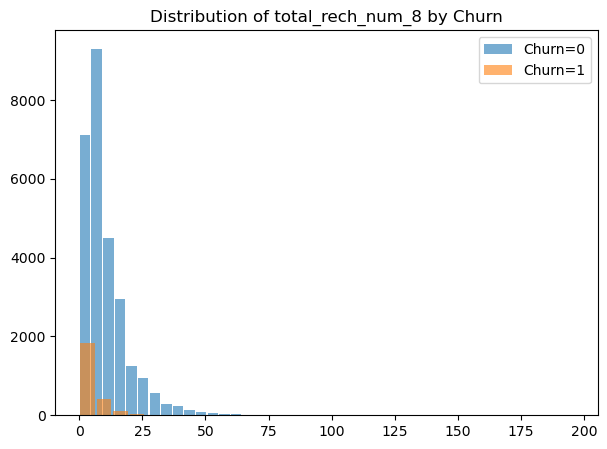

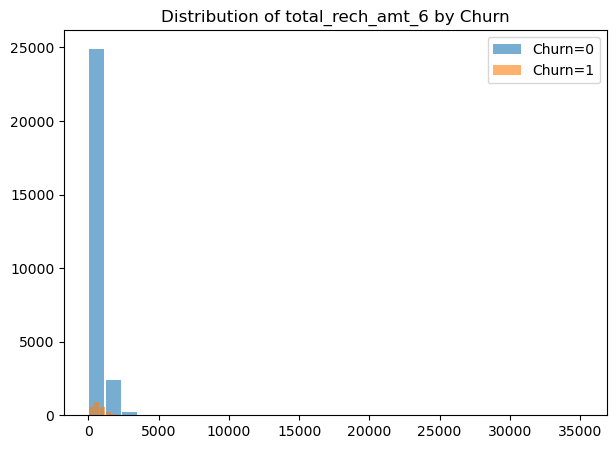

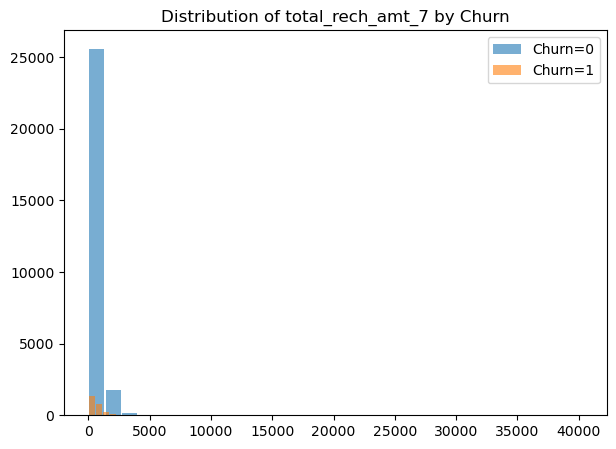

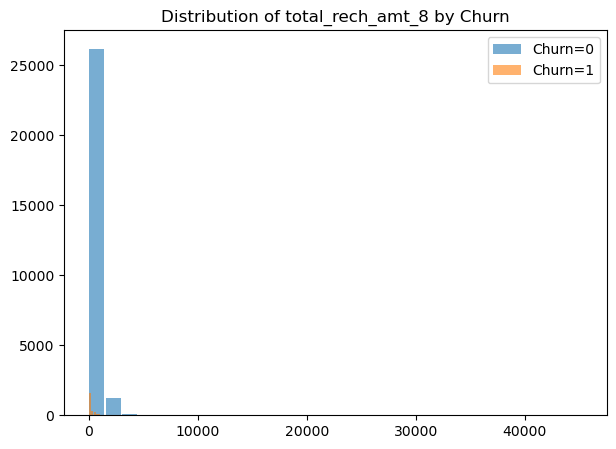

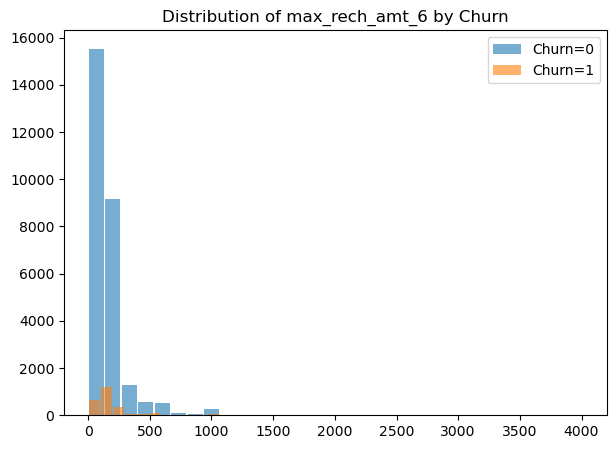

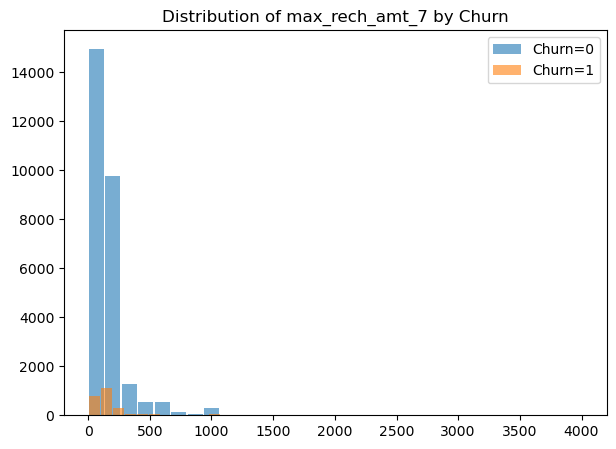

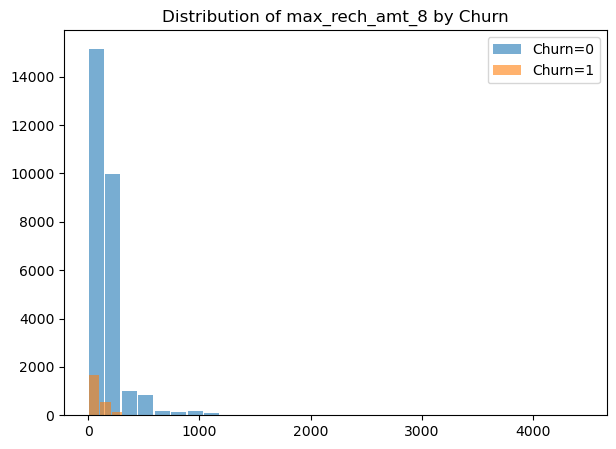

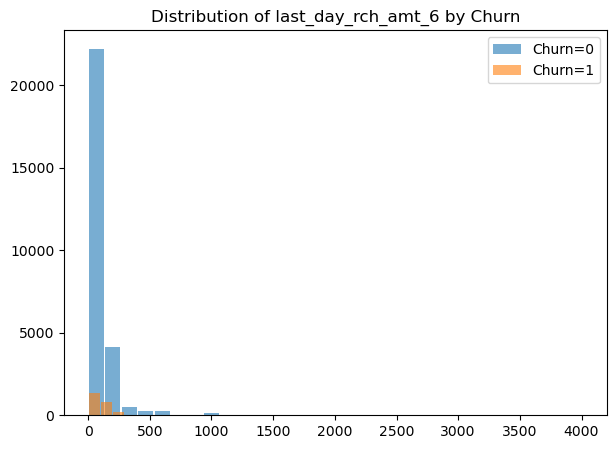

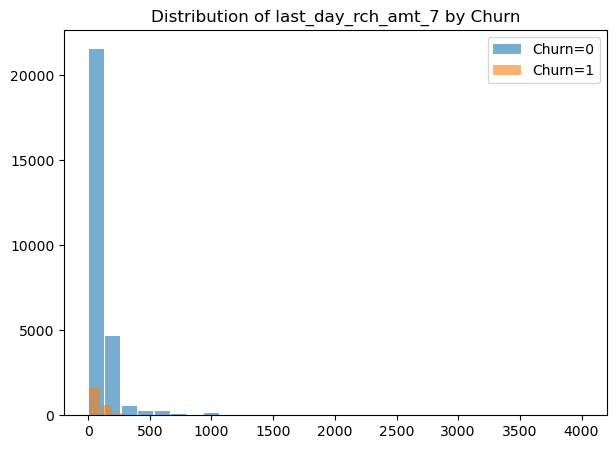

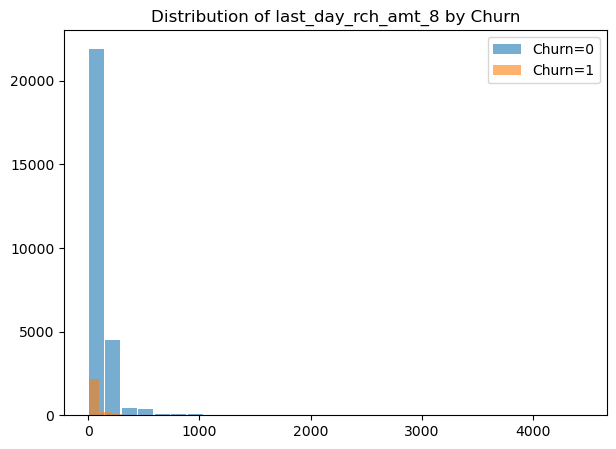

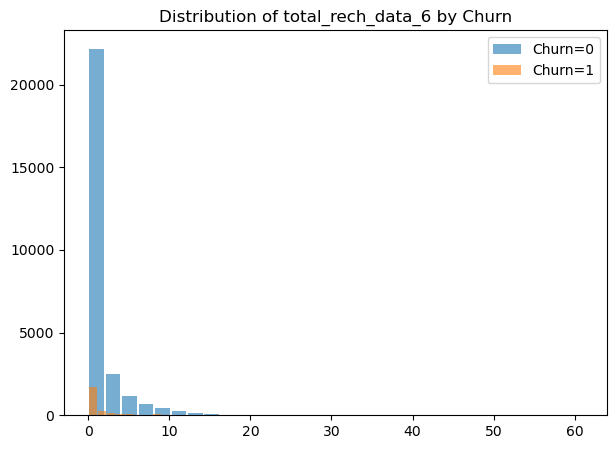

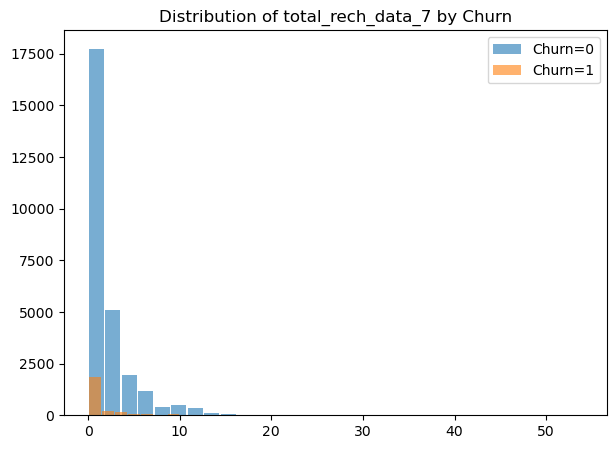

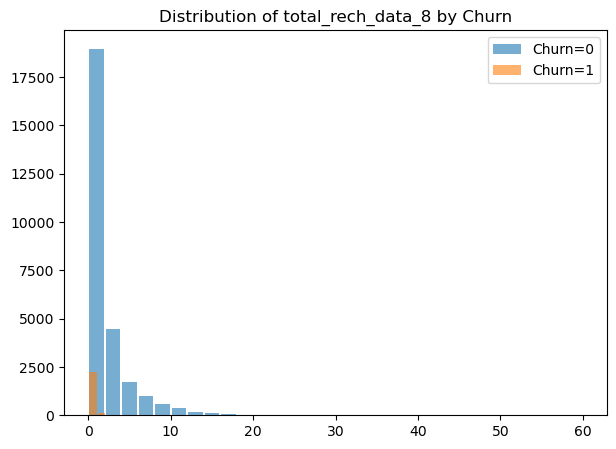

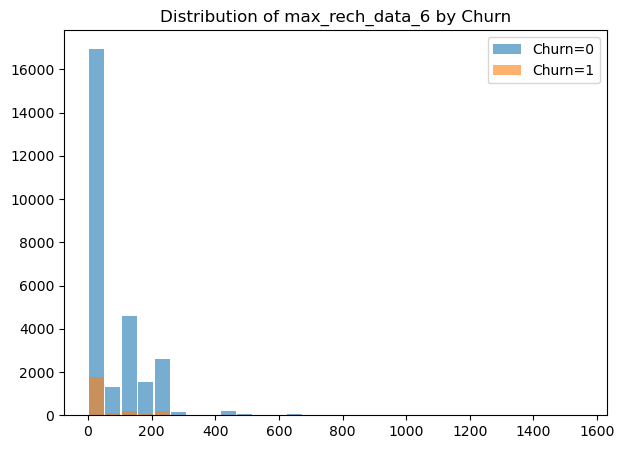

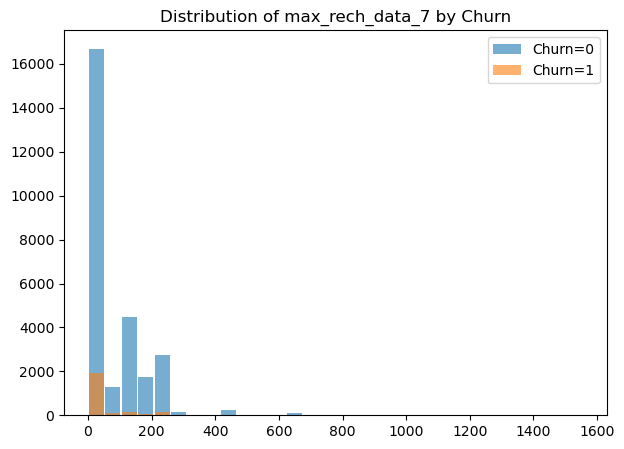

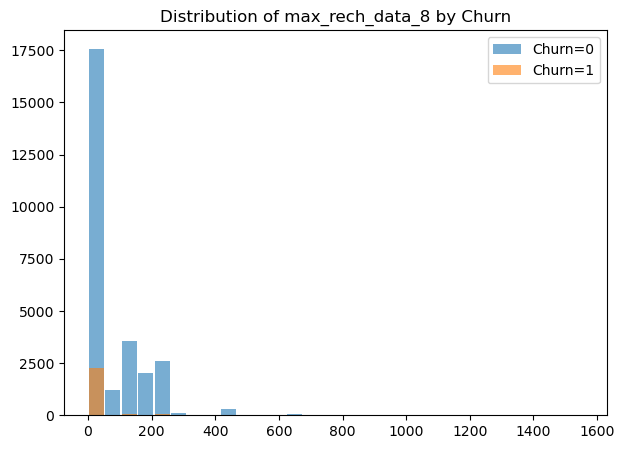

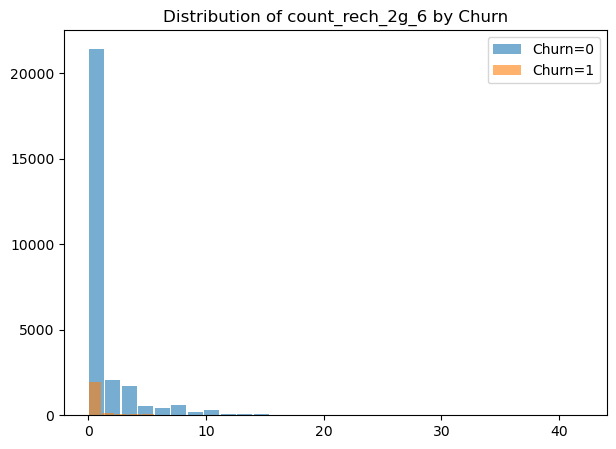

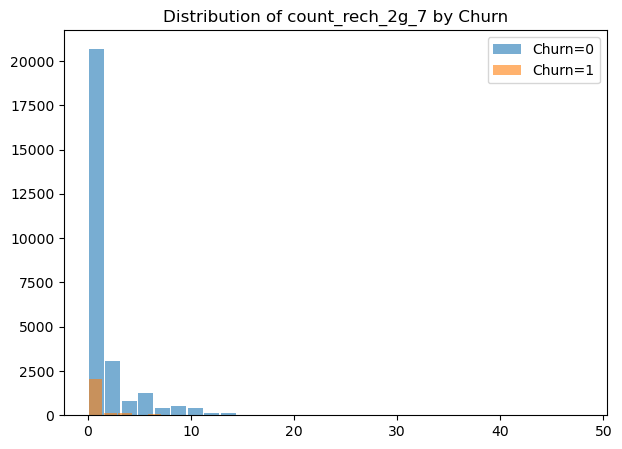

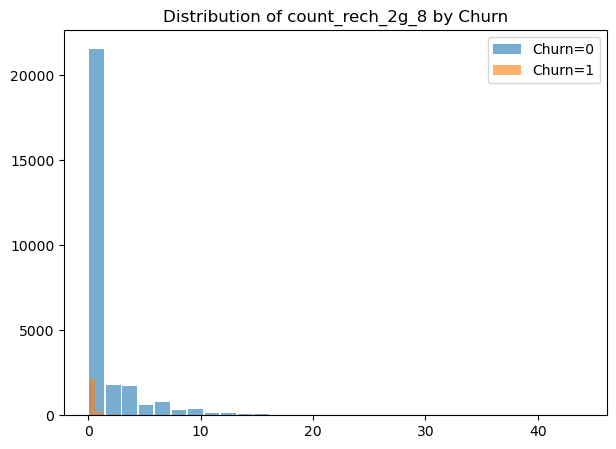

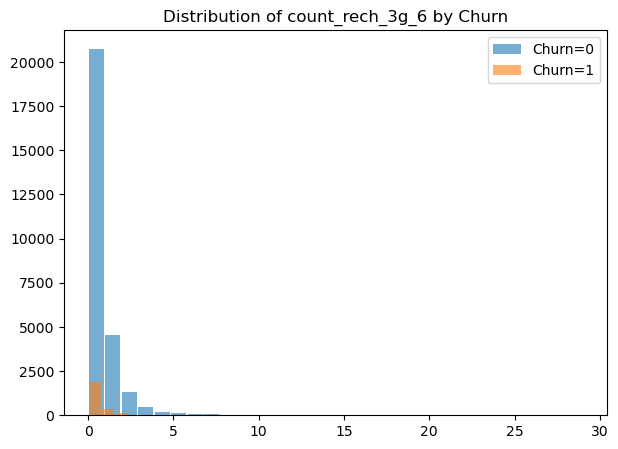

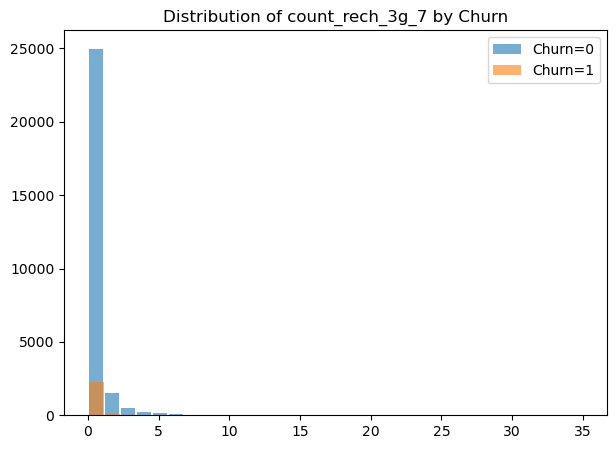

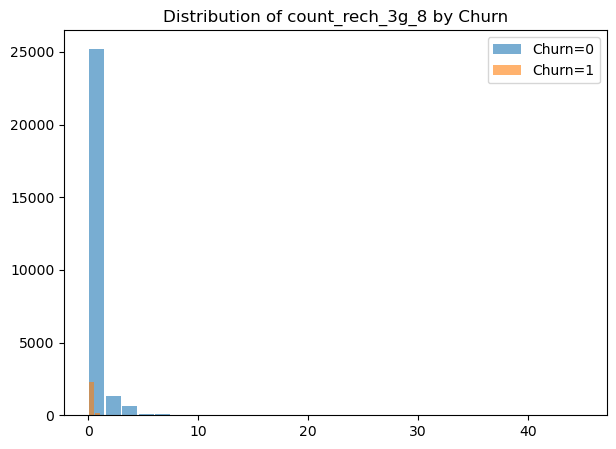

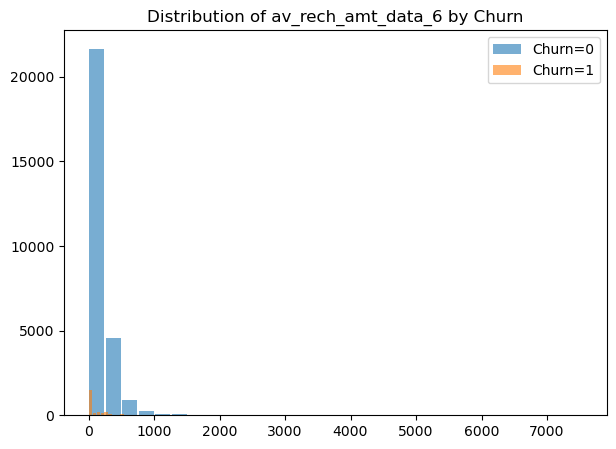

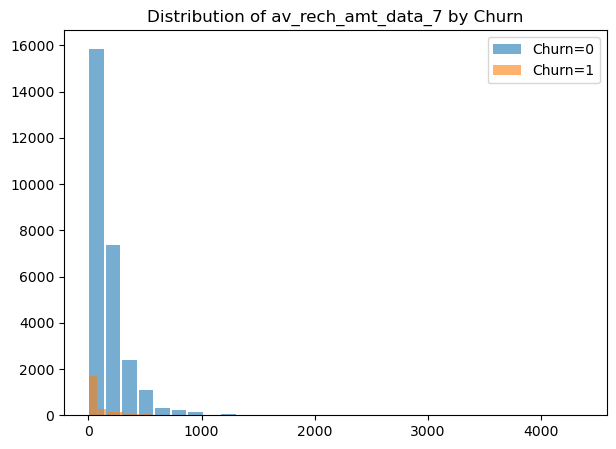

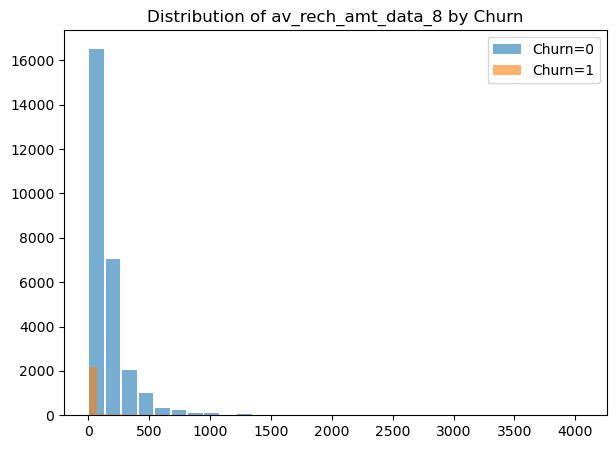

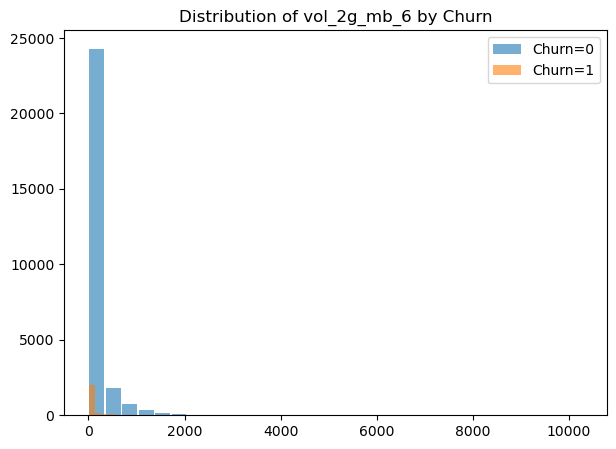

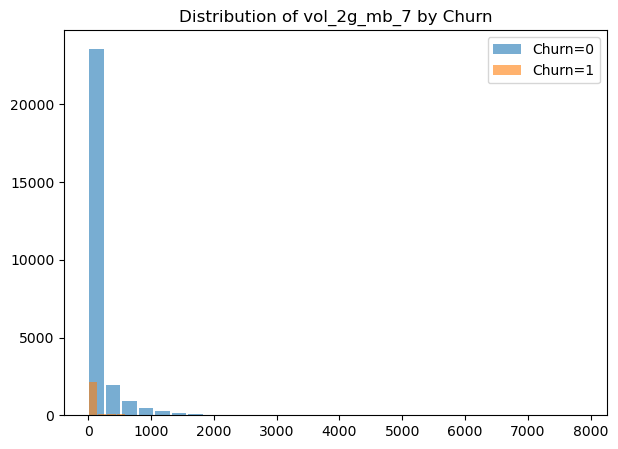

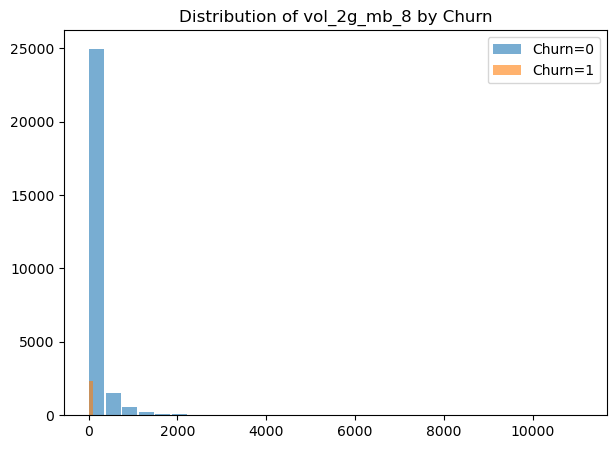

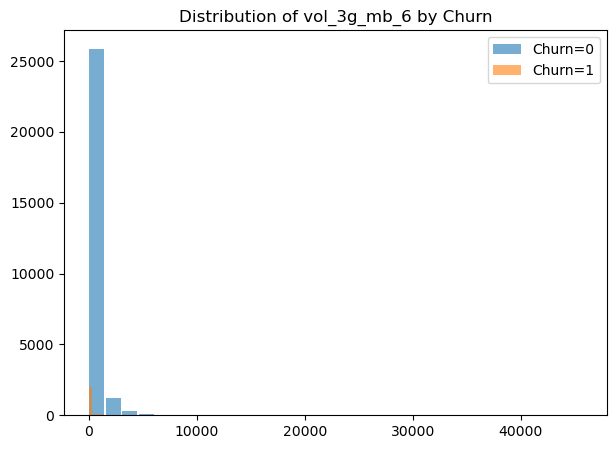

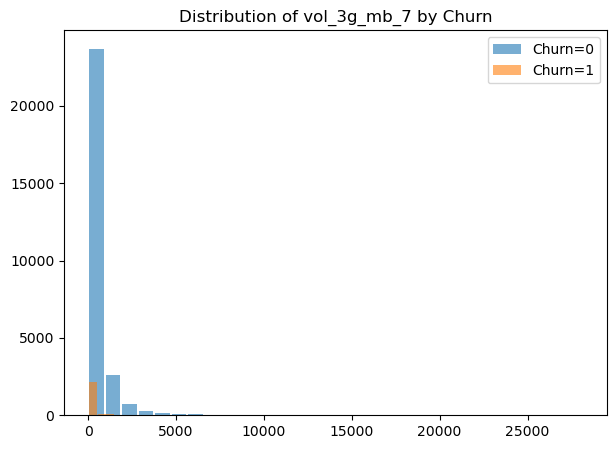

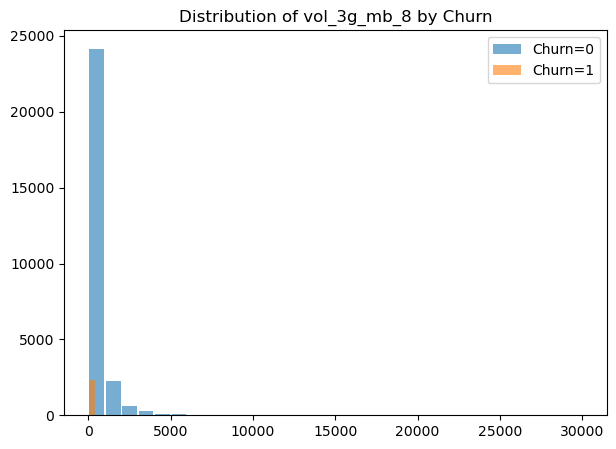

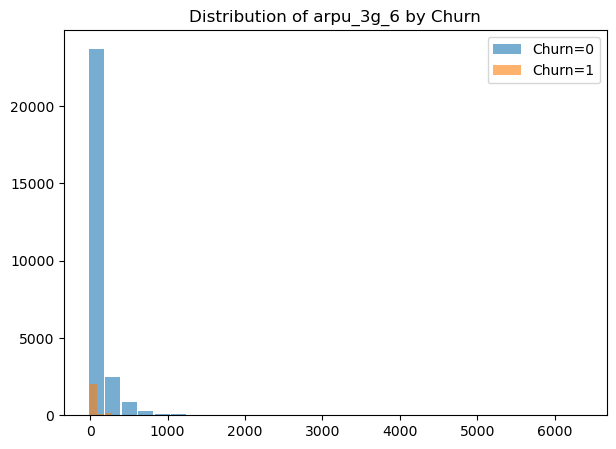

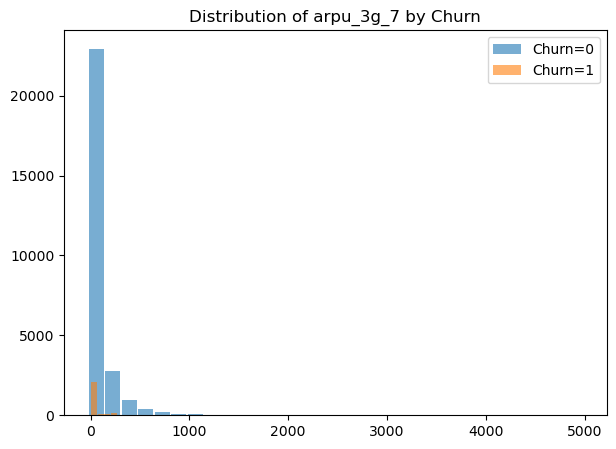

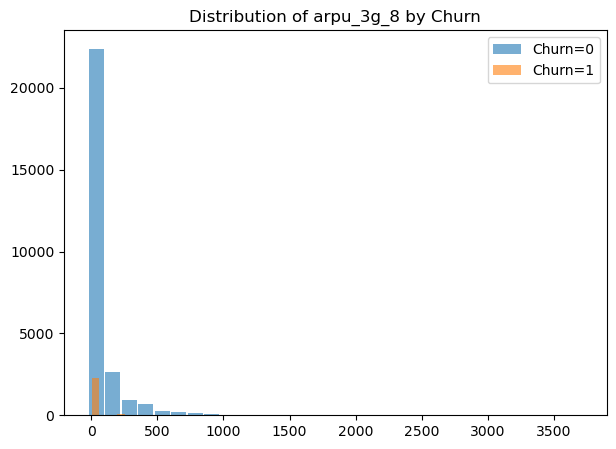

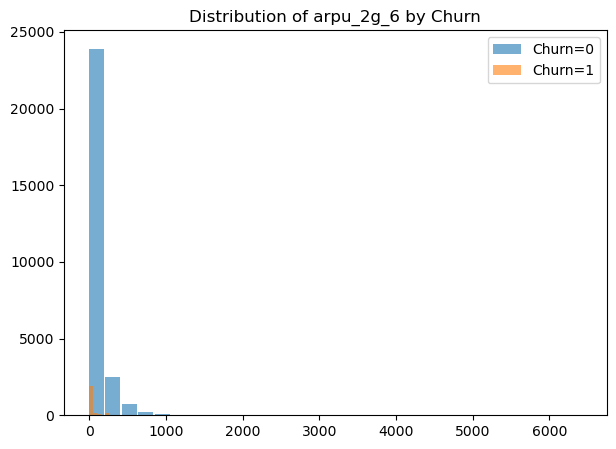

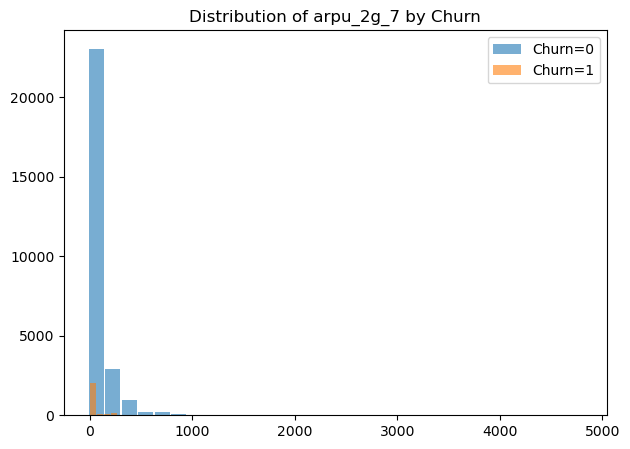

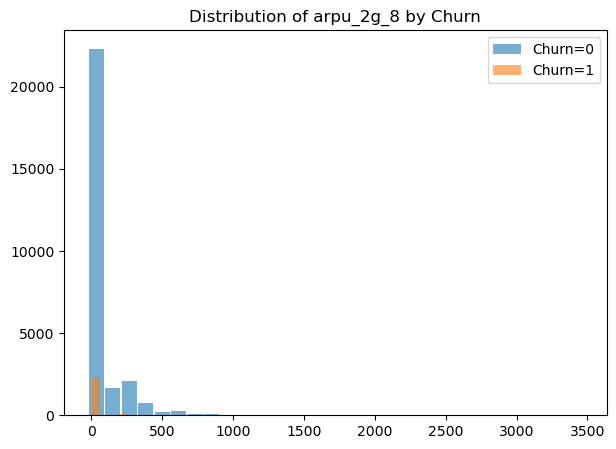

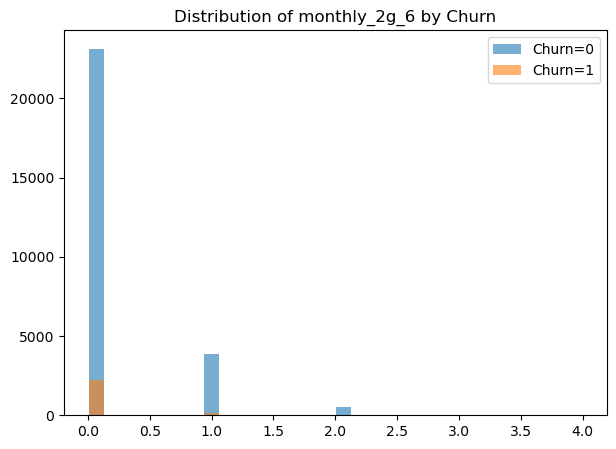

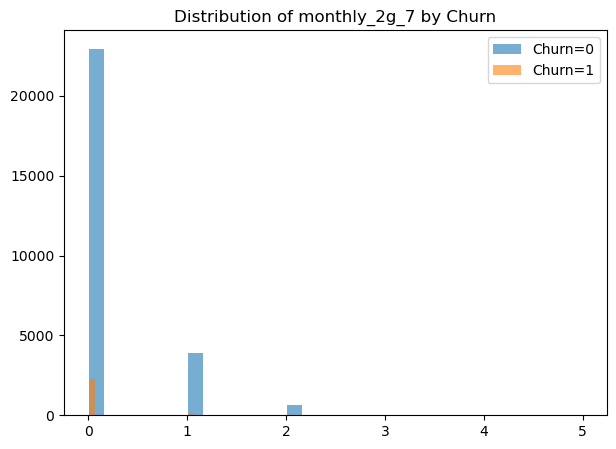

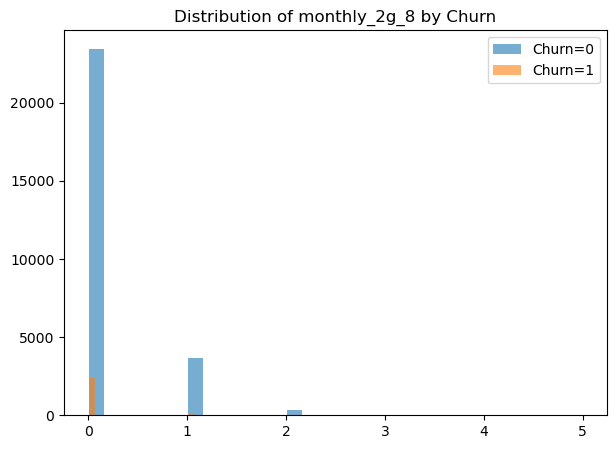

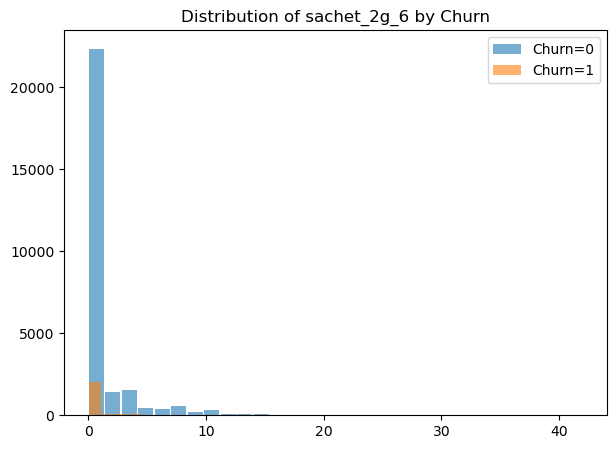

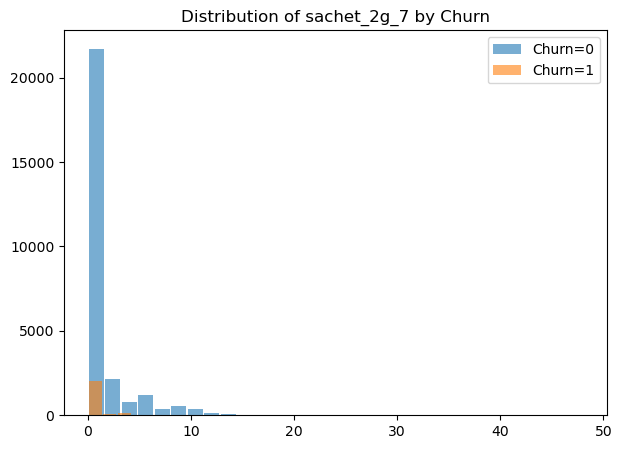

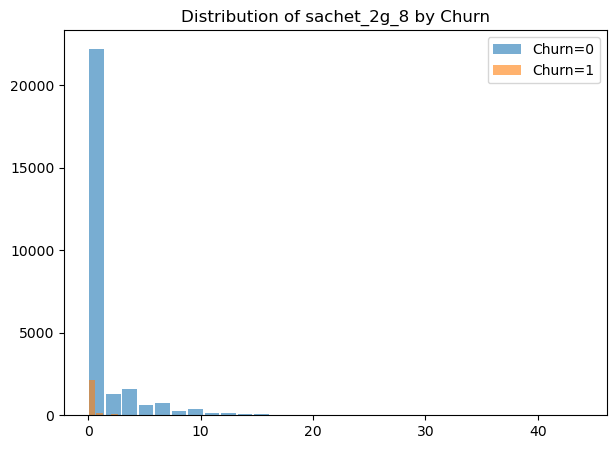

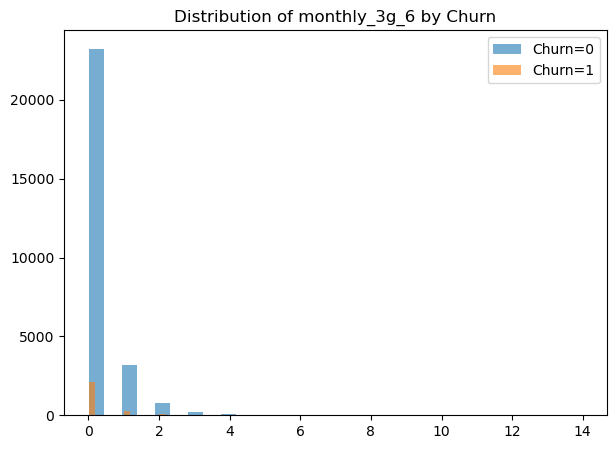

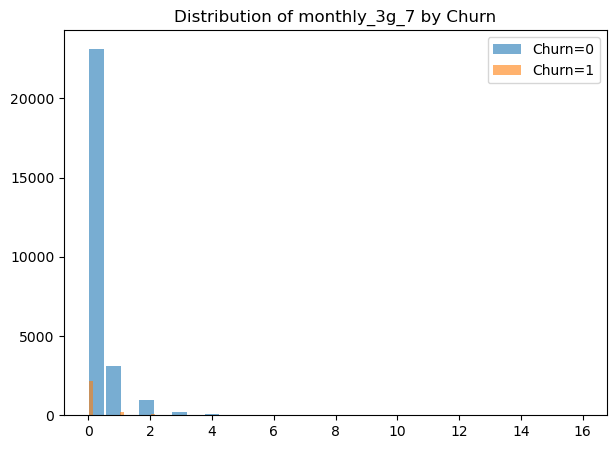

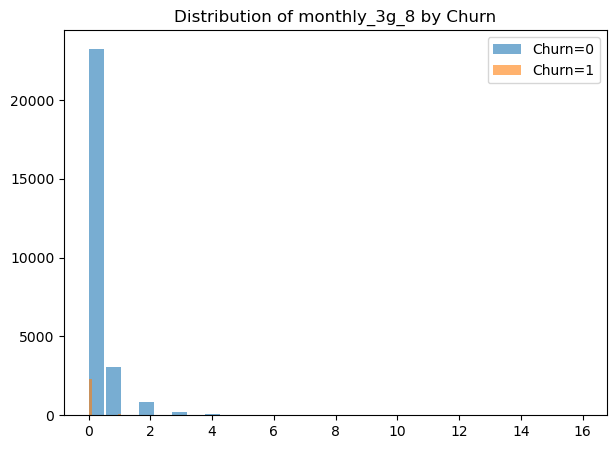

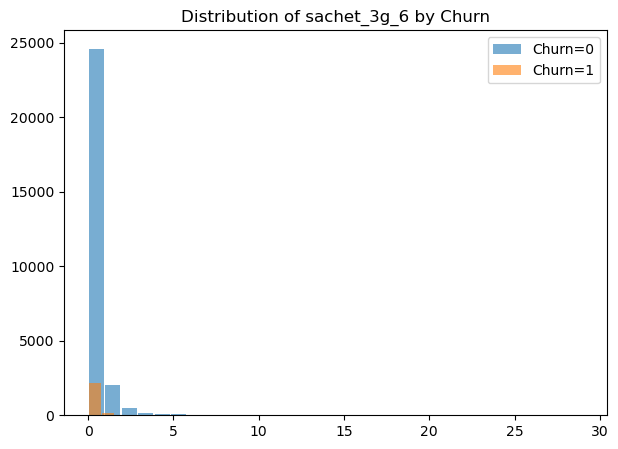

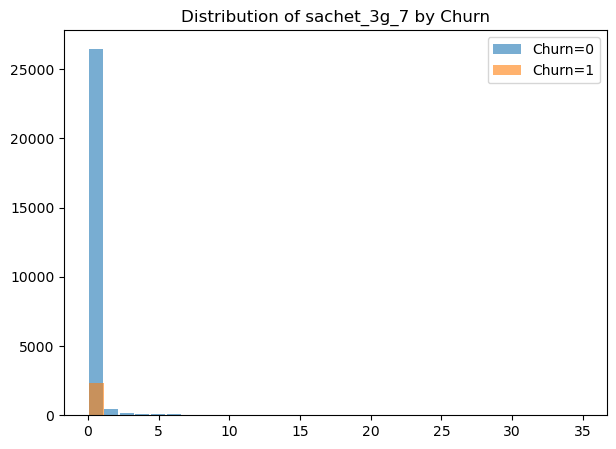

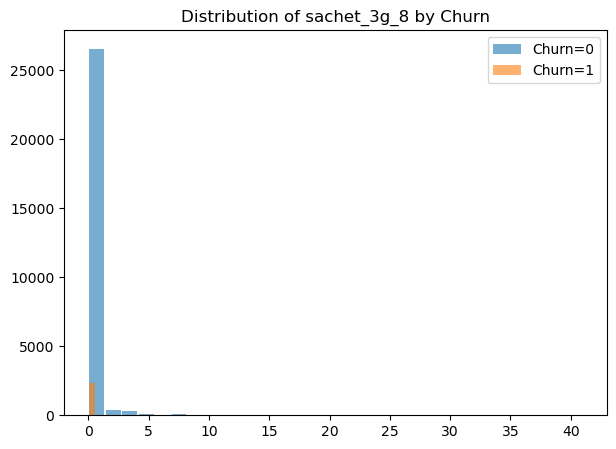

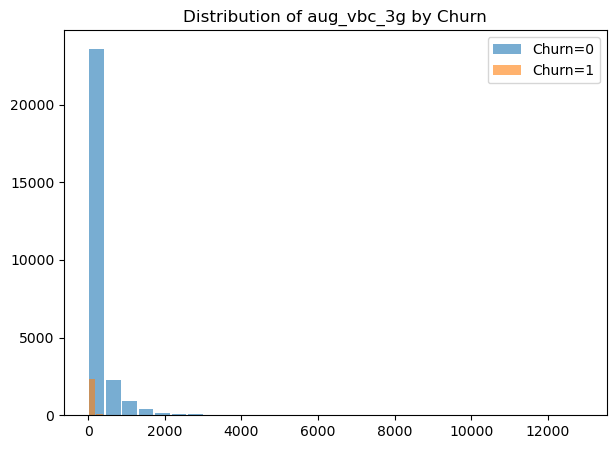

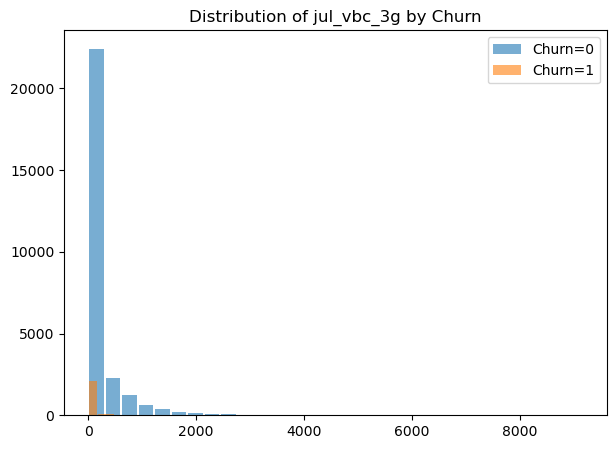

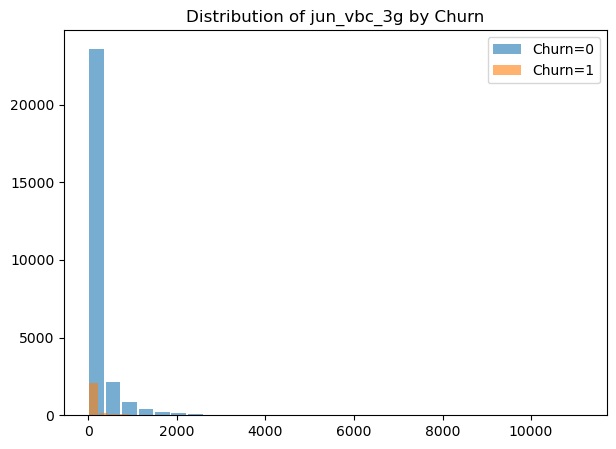

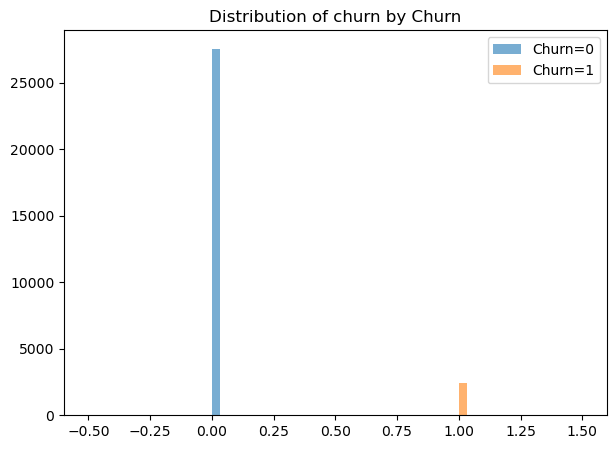

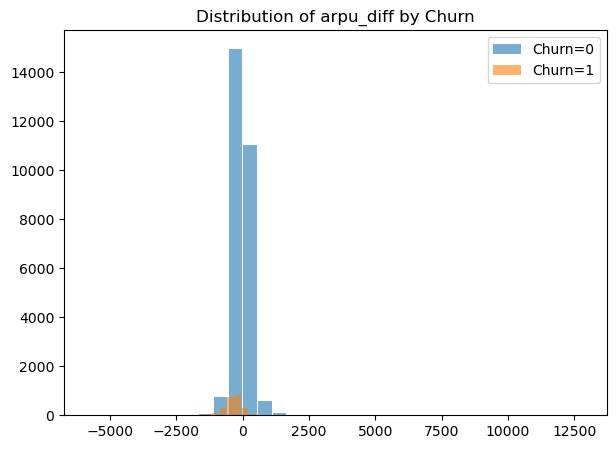

In [40]:
# Creating a function for continuous variables

def contiBplot(x, size=(7, 5)):
    for col in x:
        plt.figure(figsize=size)
        plt.title(f"Distribution of {col} by Churn")
        for label, group in df4.groupby('churn'):
            plt.hist(group[col], alpha=0.6, bins=30, label=f"Churn={label}", rwidth=0.9)
        plt.legend()
        plt.show()

contiBplot(num_cols)

#### People giving low arpu and low recharges have higher churn rate

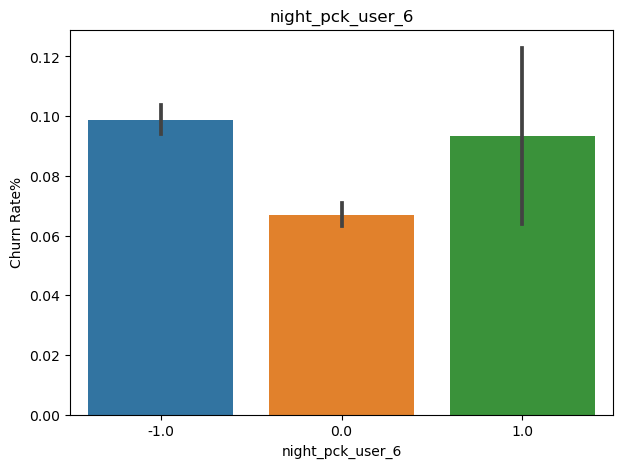

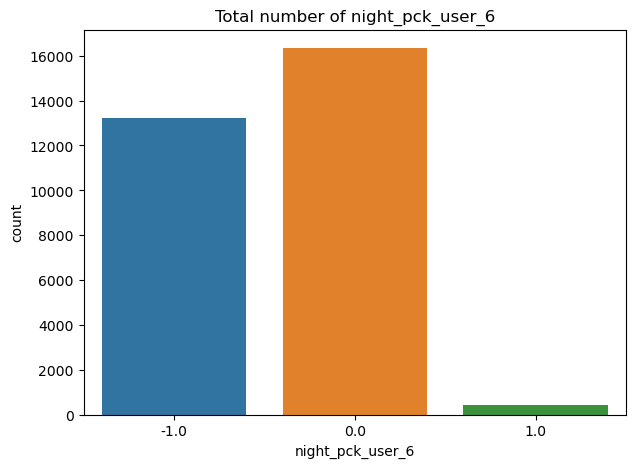

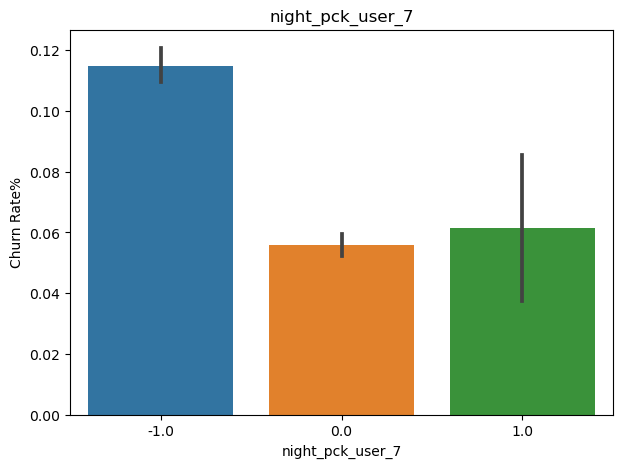

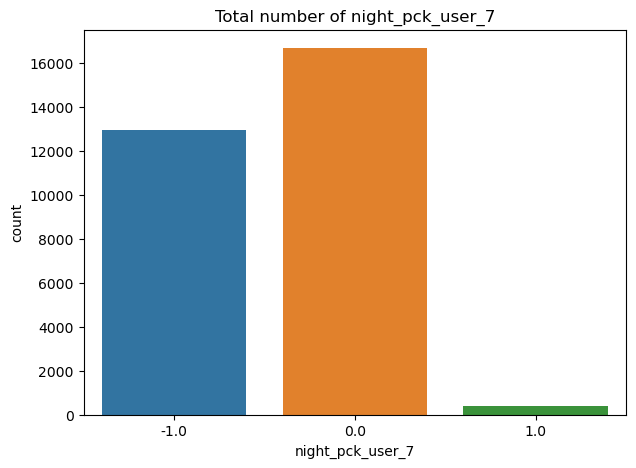

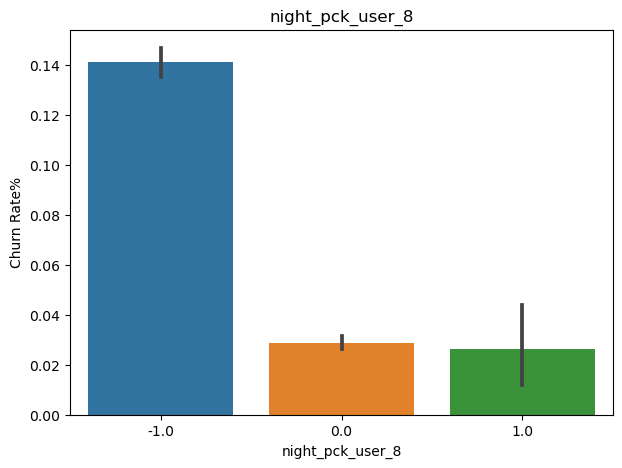

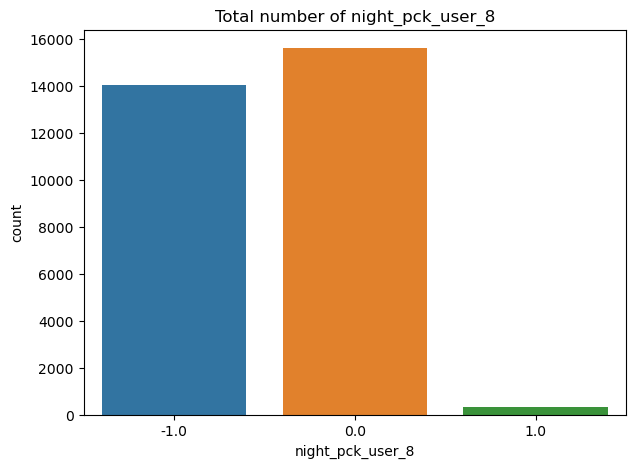

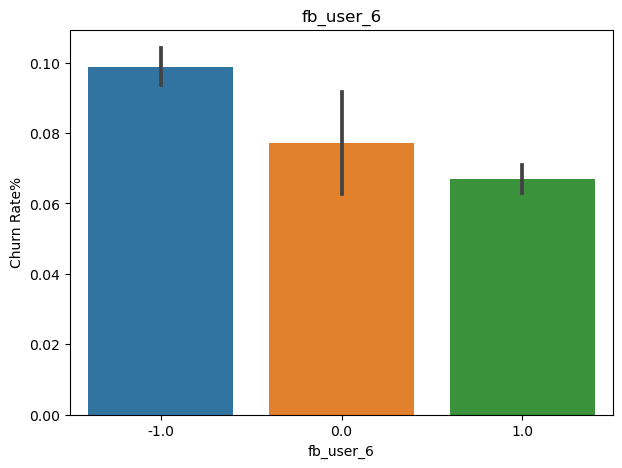

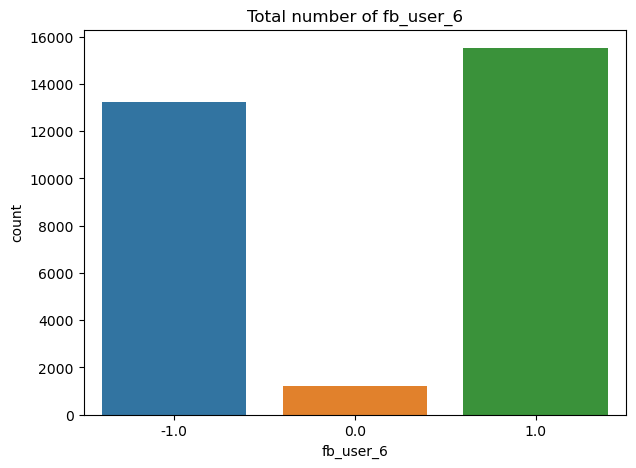

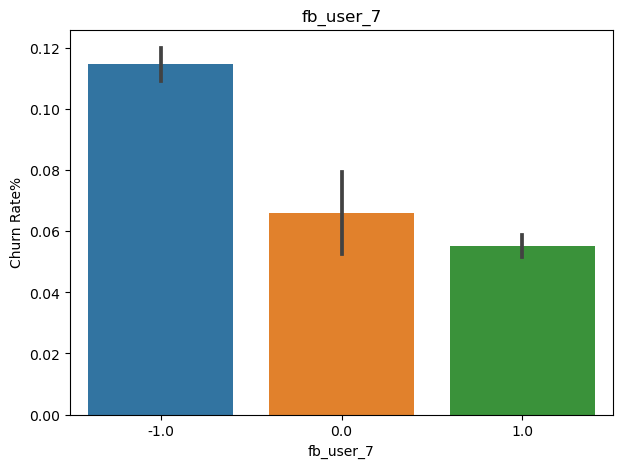

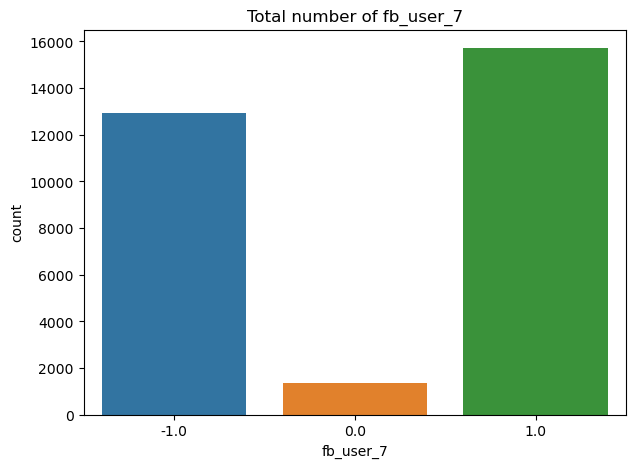

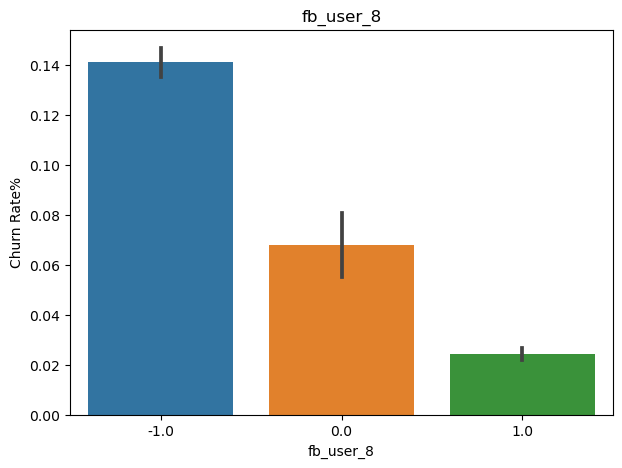

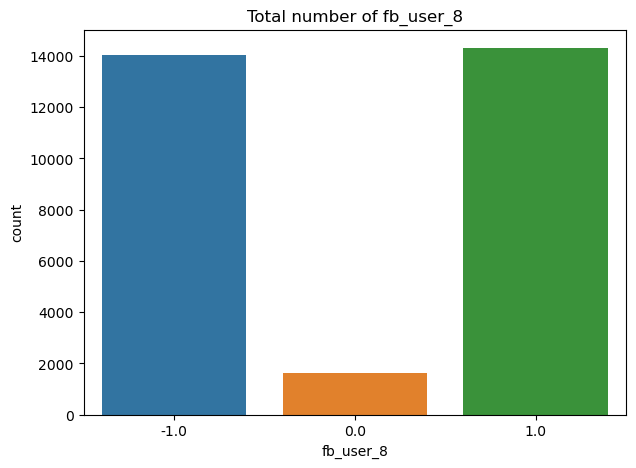

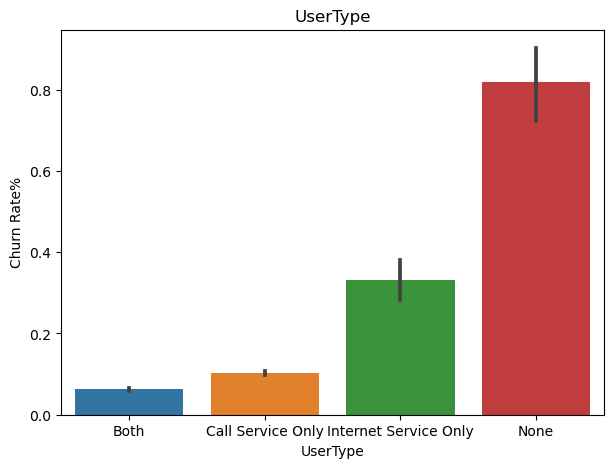

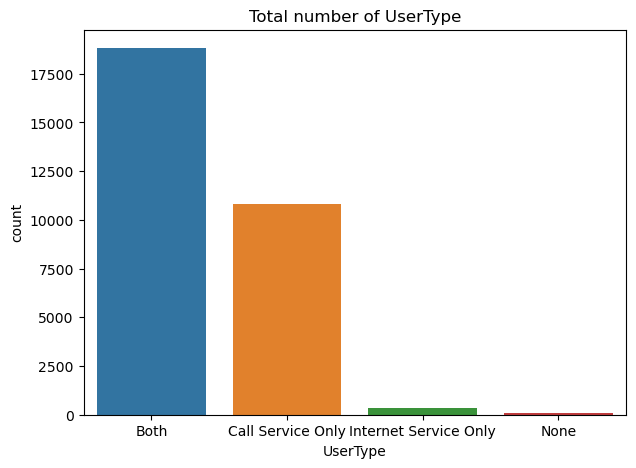

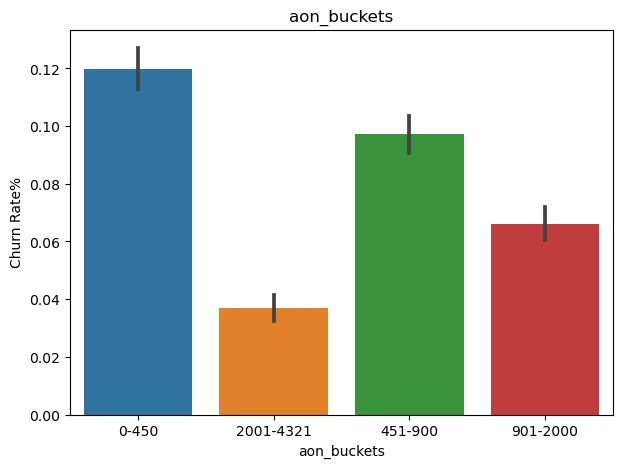

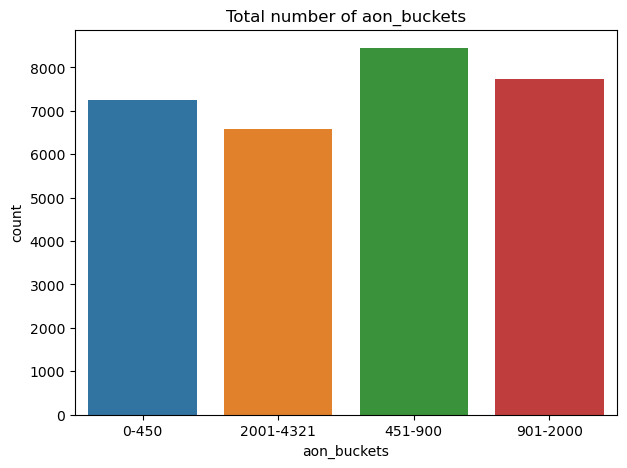

In [41]:
# Bivariate analysis on categorical variable

def bplot(xvalue, size = (7,5)):
    plt.figure(figsize= size)
    chrt = sns.barplot(x=xvalue, y='churn', data=df4, estimator = np.mean)
    chrt.set_title(xvalue)
    chrt.set_ylabel('Churn Rate%')
    plt.show()
    plt.figure(figsize= size)
    chrt2 = sns.countplot(x=xvalue, data=df4)
    chrt2.set_title('Total number of '+xvalue)
    plt.show()
    
for i in cat_cols:
    bplot(i)

#### There is high churn rate in the users that do not use Call or Internet services although they are very less people. There is a high churn rate in the customers having low aon buckets (i.e. 0-450) 

### 3.4.3 Multivariate Analysis

In [42]:
non_numeric_columns = df4.select_dtypes(exclude=['number']).columns
numeric_df = df4.select_dtypes(include=['number'])

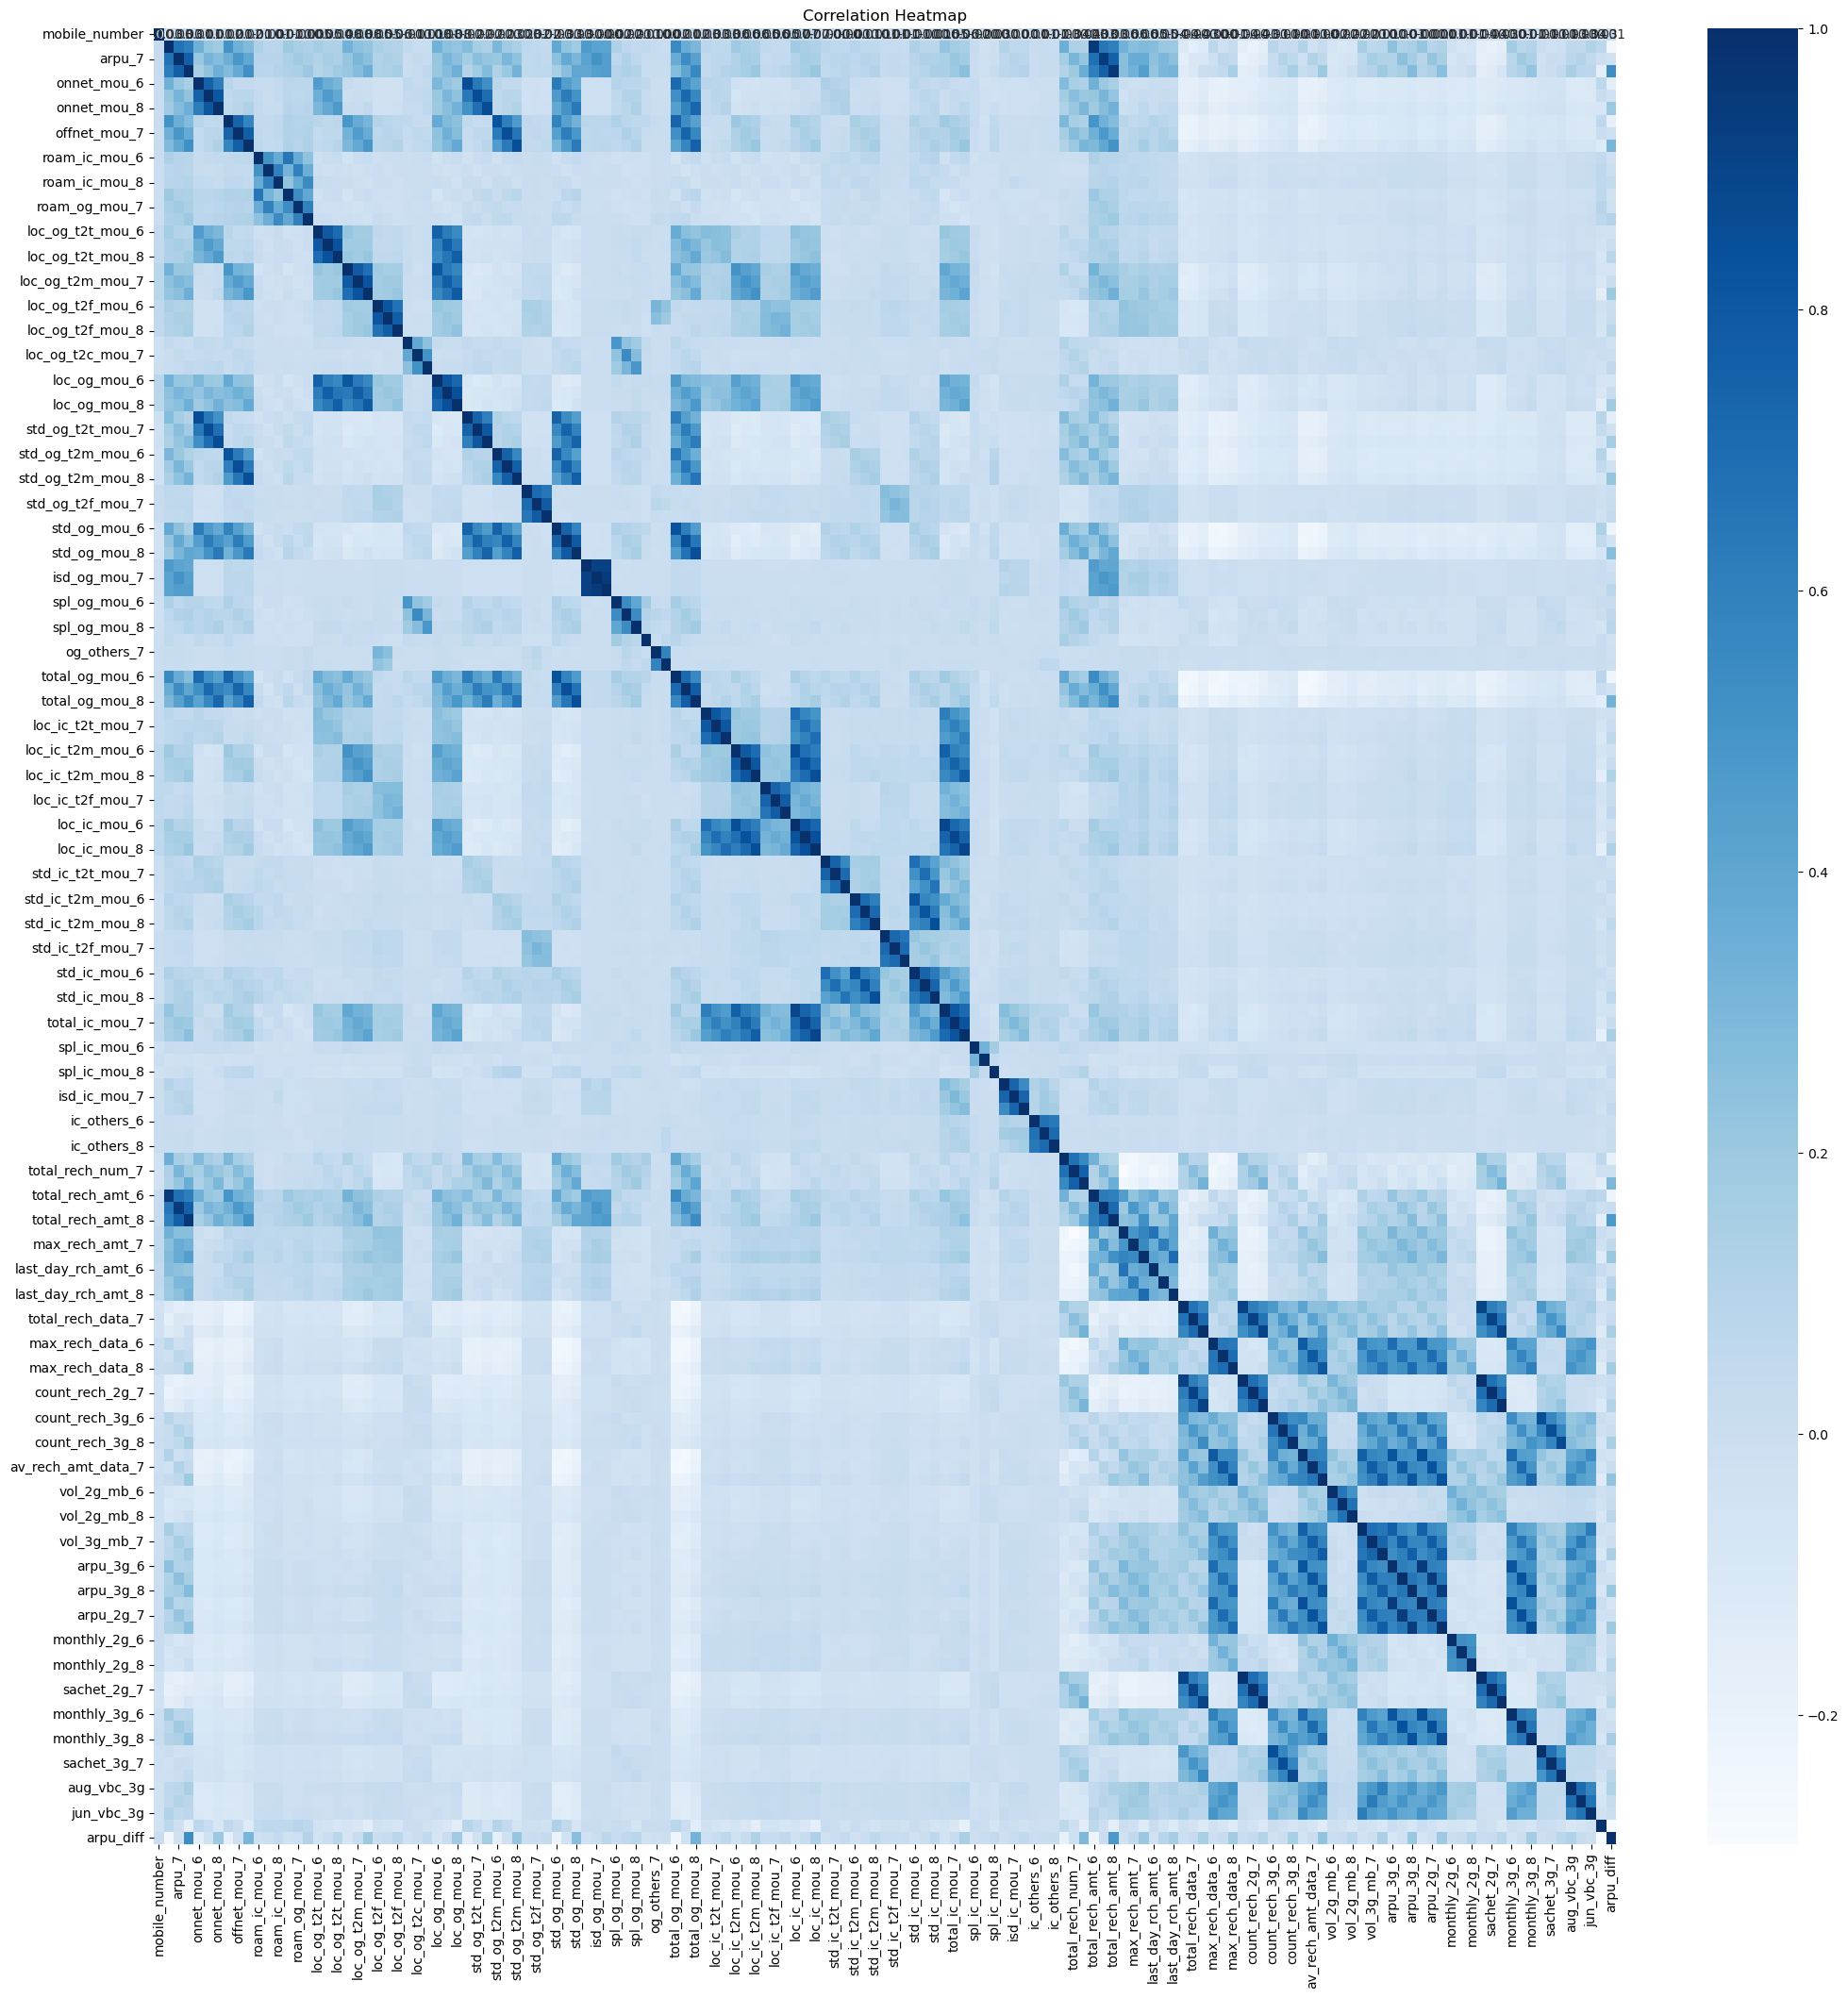

In [43]:
# Creating correlation metric for multivariate analysis

plt.figure(figsize=(25, 25))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Mostly all the variables (for the month of June, July and August) have high correlation with each other which is natural since the usage or amount mostly remains the same per user. However, there is a high correlation amongst 3g volume, 2g volume and arpu. We will deal with this while doing PCA in high accuracy models and VIF in high interpretability models.

### 3.5 Outlier Treatment

In [44]:
df4.describe([0.01,0.05,0.25,0.50,0.75,0.9,0.95])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
5%      7.000126e+09    112.510000    114.273000      9.550000      0.000000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.210000      0.050000      0.000000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       ...  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7  \
count  ...  30001.000000  30001.000000  30001.000000  30001.000000   
mean   ...      0.229026      0.211026      0.209393      0.227492   
std    ...      0.659125      0.617549      0.985674      1.089929   
min    ...      0.000000      0.000000      0.000000      0.000000   
1%     ...      0.000000      0.000000      0.000000      0.000000   
5%     ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
90%    ...      1.000000      1.000000      1.000000      1.000000   
95%    ...      1.000000      1.000000      1.000000      1.000000   
max    ...     16.000000     16.000000     29.000000     35.000000   

        sachet_3g_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g         churn  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean       0.202393    169.138860    178.872765    158.523962      0.081364   
std        1.100107    420.974354    443.544138    416.734860      0.273398   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000    128.800000    137.290000     98.440000      0.000000   
90%        0.000000    580.680000    611.310000    532.610000      0.000000   
95%        1.000000    938.560000    984.930000    885.240000      1.000000   
max       41.000000  12916.220000   9165.600000  11166.210000      1.000000   


In [45]:
# Creating another variable for numerical columns to remove churn

num_cols2 = []
for i in num_cols:
    if i == 'churn':
        continue
    else:
        num_cols2.append(i)
num_cols2

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [46]:
# Outlier Treatment of the continuous variables by capping the outliers to percentile 1 and percentile 99

df5 = df4[:]

for col in num_cols2:
    percentiles = df5[col].quantile([0.01, 0.99]).values
    df5[col] = np.clip(df5[col], percentiles[0], percentiles[1])

df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Columns: 155 entries, mobile_number to UserType
dtypes: category(8), float64(121), int64(26)
memory usage: 34.1 MB


### 3.6 Dummy Variable Creation

In [47]:
df6 = df5[:]
dummy1 = pd.get_dummies(df6[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType']], drop_first=True)
dummy1

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                      True                 False                  True   
7                     False                 False                 False   
8                     False                 False                  True   
21                    False                 False                 False   
23                    False                 False                  True   
...                     ...                   ...                   ...   
99981                  True                 False                  True   
99984                  True                 False                  True   
99986                  True                 False                  True   
99988                 False                 False                  True   
99997                  True                 False                  True   

       night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                     False                  True                 False   
7                     False                 False                 False   
8                     False                  True                 False   
21                    False                 False                 False   
23                    False                  True                 False   
...                     ...                   ...                   ...   
99981                 False                  True                 False   
99984                 False                  True                 False   
99986                 False                  True                 False   
99988                 False                  True                 False   
99997                 False                  True                 False   

       fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  \
0              False           True          False           True   
7              False          False          False          False   
8              False          False          False           True   
21             False          False          False          False   
23             False          False          False           True   
...              ...            ...            ...            ...   
99981          False           True          False           True   
99984          False           True          False           True   
99986          False           True          False           True   
99988          False          False          False           True   
99997          False           True          False           True   

       fb_user_8_0.0  fb_user_8_1.0  aon_buckets_2001-4321  \
0              False           True                  False   
7              False          False                  False   
8              False           True                  False   
21             False          False                  False   
23             False           True                  False   
...              ...            ...                    ...   
99981          False           True                  False   
99984          False           True                  False   
99986          False           True                   True   
99988          False           True                  False   
99997          False           True                  False   

       aon_buckets_451-900  aon_buckets_901-2000  UserType_Call Service Only  \
0                    False                  True                       False   
7                     True                 False                        True   
8                    False                 False                       False   
21                    True                 False                        True   
23                    True                 False                       False   
...                    ...                   ...                         ...   
99981                 True                 False                       

In [48]:
# Creating a dummy variable for categorical variables and dropping the first one.

df6 = df5[:]
dummy1 = pd.get_dummies(df6[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType']], drop_first=True)

# Adding the results to the master dataframe
df6 = pd.concat([df6, dummy1], axis=1)
df6.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  1986.622        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_7_0.0  \
0          0.00          0.00          0.00          0.00  ...          False   
7         52.29        453.43        567.16        325.91  ...          False   
8         35.08         94.66         80.63        136.48  ...          False   
21        85.14        757.93        896.68        983.39  ...          False   
23        33.58         85.41         89.36        205.89  ...          False   

    fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  aon_buckets_2001-4321  \
0            True          False           True                  False   
7           False          False          False                  False   
8            True          False           True                  False   
21          False          False          False                  False   
23           True          False           True                  False   

    aon_buckets_451-900  aon_buckets_901-2000  UserType_Call Service Only  \
0                 False                  True                       False   
7                  True                 False                        True   
8                 False                 False                       False   
21                 True                 False                        True   
23                 True                 False                       False   

    UserType_Internet Service Only  UserType_None  
0                            False          False  
7                            False          False  
8                            False          False  
21                           False          False  
23                           False          False  

[5 rows x 173 columns]

In [49]:
df6.shape

(30001, 173)

In [50]:
df6 = df6.drop(columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','aon_buckets','UserType'])
df6.shape

(30001, 165)

In [51]:
df6.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  1986.622        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_7_0.0  \
0          0.00          0.00          0.00          0.00  ...          False   
7         52.29        453.43        567.16        325.91  ...          False   
8         35.08         94.66         80.63        136.48  ...          False   
21        85.14        757.93        896.68        983.39  ...          False   
23        33.58         85.41         89.36        205.89  ...          False   

    fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  aon_buckets_2001-4321  \
0            True          False           True                  False   
7           False          False          False                  False   
8            True          False           True                  False   
21          False          False          False                  False   
23           True          False           True                  False   

    aon_buckets_451-900  aon_buckets_901-2000  UserType_Call Service Only  \
0                 False                  True                       False   
7                  True                 False                        True   
8                 False                 False                       False   
21                 True                 False                        True   
23                 True                 False                       False   

    UserType_Internet Service Only  UserType_None  
0                            False          False  
7                            False          False  
8                            False          False  
21                           False          False  
23                           False          False  

[5 rows x 165 columns]

### 3.7 Train Test Split

In [52]:
X = df6.drop(['churn','mobile_number'], axis = 1)
y = df6['churn']

# Splitting the Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 163)
(9001, 163)
(21000,)
(9001,)


### 3.8 Scaling

In [53]:
# Using the standard scaler

scaler = StandardScaler()
X_train[num_cols2] = scaler.fit_transform(X_train[num_cols2])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
39186  1.507168  0.990151  0.244555    -0.612269    -0.599077    -0.561633   
39833 -0.099874 -0.667632 -0.352147    -0.265757    -0.499672    -0.470048   
38778 -0.703005 -0.660494 -0.484595    -0.453849    -0.434493    -0.361356   
43026  1.924553 -0.634216  0.539168     4.729925    -0.222216     1.206744   
12271 -0.311549 -0.263592 -0.613082    -0.582547    -0.508952    -0.512994   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
39186     -0.494020     -0.474984     -0.553666       0.307339  ...   
39833     -0.103927     -0.321518     -0.145634      -0.274045  ...   
38778     -0.075946     -0.163288     -0.272591       0.081892  ...   
43026      0.239078     -0.381232      0.560540      -0.274045  ...   
12271     -0.413489     -0.155058     -0.593652      -0.274045  ...   

       fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  \
39186          False          False          False          False   
39833          False           True          False           True   
38778          False           True          False          False   
43026          False          False          False          False   
12271          False           True          False           True   

       aon_buckets_2001-4321  aon_buckets_451-900  aon_buckets_901-2000  \
39186                   True                False                 False   
39833                   True                False                 False   
38778                   True                False                 False   
43026                  False                False                  True   
12271                  False                False                 False   

       UserType_Call Service Only  UserType_Internet Service Only  \
39186                        True                           False   
39833                       False                           False   
38778                       False                           False   
43026                        True                           False   
12271                       False                           False   

       UserType_None  
39186          False  
39833          False  
38778          False  
43026          False  
12271          False  

[5 rows x 163 columns]

### 3.9 Tranforming the test data 

In [54]:
# Fitting the scale on the test data

X_test[num_cols2]=scaler.transform(X_test[num_cols2])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
20296 -0.027286 -0.041915 -0.569135    -0.586828    -0.605703    -0.553590   
8279  -1.316907 -0.953951 -1.097164    -0.586903    -0.596566    -0.549837   
72269  0.471043  0.468207  0.330380     0.239375    -0.075069     0.020558   
65602 -0.253697 -0.182237 -0.104401    -0.428707    -0.463387    -0.278734   
42758  0.156503 -0.415253 -1.054820     1.004914     0.297942    -0.452941   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
20296     -0.719086     -0.797371     -0.738237      -0.274045  ...   
8279      -0.782769     -0.782878     -0.784075      -0.158411  ...   
72269      1.043971      0.979343      1.329645      -0.274045  ...   
65602     -0.039991     -0.221660     -0.249916      -0.274045  ...   
42758     -0.492660     -0.551360     -0.779931      -0.274045  ...   

       fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  fb_user_8_1.0  \
20296          False          False          False          False   
8279           False           True          False           True   
72269          False           True          False          False   
65602          False          False          False          False   
42758          False           True          False          False   

       aon_buckets_2001-4321  aon_buckets_451-900  aon_buckets_901-2000  \
20296                  False                 True                 False   
8279                   False                 True                 False   
72269                  False                False                 False   
65602                  False                False                  True   
42758                  False                False                  True   

       UserType_Call Service Only  UserType_Internet Service Only  \
20296                        True                           False   
8279                        False                           False   
72269                       False                           False   
65602                        True                           False   
42758                       False                           False   

       UserType_None  
20296          False  
8279           False  
72269          False  
65602          False  
42758          False  

[5 rows x 163 columns]

#### 3.10 Using SMOTE technique to balance the data

In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)
X_train_bal, y_train_bal = smot.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal == 0)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

After OverSampling, the shape of train_X: (38618, 163)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309


### 4. Data Model

### We will create 2 types of models:
1. Accuracy Models: which will focus on the model accuracy (here: recall since we want to identify more and more churn customers (Logistic Regression with PCA, Random Forest & Gradient Boosting)
2. Interpretability Models: which can suggest the important variables. (Logistic Regression without PCA & Decision Tree without PCA)

### 4.1 Accuracy Models

#### We will do PCA first and based on the best PC's we will fit 3 models

# PCA

In [56]:
# Fitting PCA

pca = PCA( random_state=100)

#Doing the PCA on the train data
pca.fit(X_train_bal)

PCA(random_state=100)

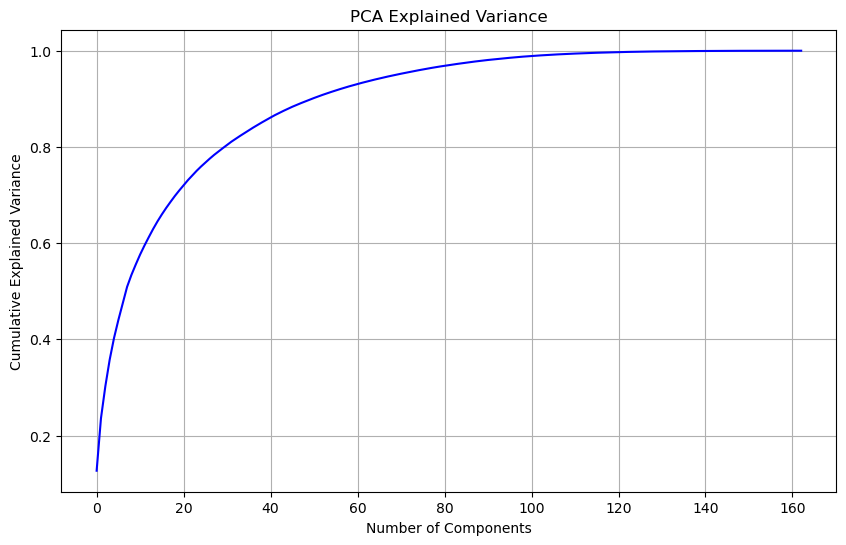

In [57]:
# Making the screeplot - plotting the cumulative variance against the number of components

def plot_pca_variance(pca):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color='b')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)
    plt.show()

plot_pca_variance(pca)

In [58]:
# 90% variance explained by 60 principal components
pca = PCA(n_components=60,random_state=100)

#Scale and transform data to get Principal Components

X_train_reduced = pca.fit_transform(X_train_bal)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(38618, 60)
(9001, 60)


In [59]:
# Fetching the 60 PC 

PC_col=[]

for i in range(1,61,1):
    PC_col.append('PC'+str(i))

# Creating a new df__train using the PC

df = pd.DataFrame(X_train_reduced, columns=PC_col)
df2 = pd.DataFrame(data = y_train_bal, columns = ['churn'])
df_train = pd.concat([df,df2], axis=1)
df_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.677237  1.288739 -0.417528 -5.070785  1.166950  0.713298  3.101765   
1  1.480521  1.641556 -3.201679 -0.043955  0.254426  0.413806  1.469964   
2  0.304241 -1.183769 -1.937282 -0.477889  2.122634  0.169501  0.309482   
3 -6.522378  5.747098 -2.854032 -0.243372 -1.397104  0.167959  2.319050   
4  1.825315  1.928292 -3.507785 -0.419022 -0.763631 -0.684787 -0.124283   

        PC8        PC9      PC10  ...      PC52      PC53      PC54      PC55  \
0 -0.364076  13.889438  3.782082  ...  0.577131 -0.653005  0.222643  0.614903   
1  0.210682   0.886652 -0.977701  ...  0.151934 -0.040695  0.098971  0.245687   
2 -0.198051  -0.454561  0.600525  ...  1.581445  1.755272 -1.779057  0.602365   
3  5.423191  -1.599040 -1.426075  ...  0.131175  0.527330  0.735924 -0.502065   
4 -0.563169  -1.007375 -1.563897  ...  1.082740  1.811879 -2.032030  0.200348   

       PC56      PC57      PC58      PC59      PC60  churn  
0 -0.552252  0.648332 -0.051843 -0.025675  0.271283      0  
1 -2.821951  0.122462 -0.563724  0.377149 -0.352646      0  
2 -0.568284 -0.516451 -0.347150  0.156423  0.078860      0  
3  2.358560 -0.682117  1.248576  1.337998  0.848031      0  
4 -0.220434 -0.682387 -0.295090  0.202516 -0.244594      0  

[5 rows x 61 columns]

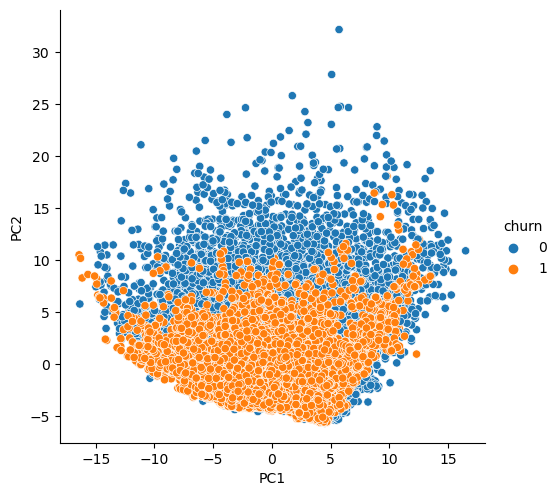

In [60]:
# Visualizing the two most important principal components

sns.pairplot(data=df_train, x_vars=["PC1"], y_vars=["PC2"], hue = "churn", size=5)

In [61]:
# Creating a new df_test using the PC

df_t = pd.DataFrame(X_test_reduced, columns=PC_col)
df2_t = pd.DataFrame(data = y_test, columns = ['churn']).reset_index(drop=True)
df_test = pd.concat([df_t,df2_t],axis=1)
df_test.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.195719 -2.492243 -0.621803 -1.944514  0.129005 -1.158550  0.766783   
1  3.161699 -4.087885 -2.072383  3.252614  1.610537  0.449033 -0.217958   
2 -0.306149  6.394712 -1.786068  0.484488 -1.971115  0.350711 -2.332912   
3 -1.324245 -0.375017 -2.405713 -0.413766 -0.062690 -0.296928  0.483064   
4  1.152282 -0.493753  0.036646  0.094790 -2.016493  0.351035  0.462669   

        PC8       PC9      PC10  ...      PC52      PC53      PC54      PC55  \
0 -0.936623  0.103253  0.984382  ... -0.053757 -0.241499  0.146203  0.431103   
1  0.154438  0.399457  0.166868  ...  0.456330  0.331265 -0.188926  0.000056   
2 -0.640120 -0.827025  2.811012  ...  0.536533 -0.432265  0.396375  0.110459   
3 -0.754434 -0.904149  1.844393  ... -0.228113 -0.262813 -0.427771  0.016257   
4  2.212342  0.372164 -2.108898  ...  0.421367 -0.135944  0.232224  0.611958   

       PC56      PC57      PC58      PC59      PC60  churn  
0  0.079583 -0.271606 -0.351232 -0.071934  0.481869      1  
1 -0.279455 -0.288030 -0.322343  0.243980 -0.146316      1  
2  0.816339  0.200623  0.384203 -0.177571 -0.098389      0  
3  0.048110  0.342229  0.428278  0.671829  0.073953      0  
4 -1.626025 -0.403591  0.259475 -0.736660 -0.683626      1  

[5 rows x 61 columns]

### 4.1.2 Model 1: Logistic Regression with PCA

In [62]:
# Creating X and y for train and test respectively using PCA datasets

y_train_pca = df_train['churn']
X_train_pca = df_train.drop(columns = ['churn'],axis = 1)
y_test_pca = df_test['churn']
X_test_pca = df_test.drop(columns = ['churn'],axis = 1)

In [63]:
# Fitting the Logistic regression model
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train_pca, y_train_pca)

# Make predictions using the testing set
y_pred = regr.predict(X_test_pca)

In [64]:
# Predicting the y train

y_test_pred_f = pd.DataFrame({'Churn':y_test_pca, 'Churn_Pred':y_pred})
y_test_pred_f.head()

Churn  Churn_Pred
0      1           1
1      1           0
2      0           0
3      0           0
4      1           1

In [65]:
# Creating the Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred)
print(confusion)

# Let's check the overall accuracy.

print(metrics.accuracy_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

[[6883 1368]
 [ 132  618]]
0.8333518497944673


In [66]:
# Calculating Recall metric

print(recall_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

0.824


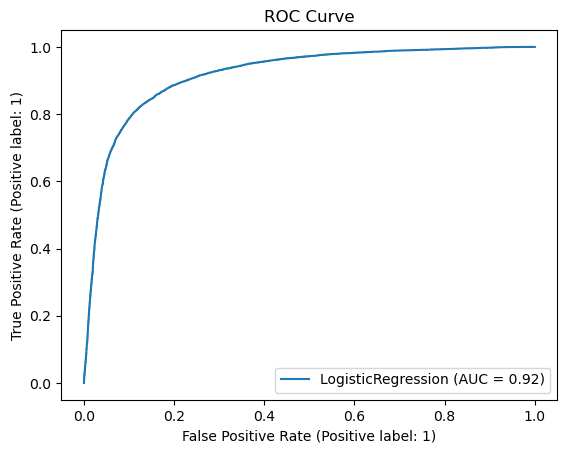

In [67]:
# Plotting ROC Curve
RocCurveDisplay.from_estimator(regr, X_train_pca, y_train_pca)
plt.title("ROC Curve")
plt.show()

In [68]:
regr.coef_

array([[-0.087805  , -0.51237129,  0.31132533, -0.35285727, -0.31738376,
         0.25534168, -0.05666124,  0.18402476,  0.06629669,  0.19835451,
         0.23759753,  0.06750309, -0.03653518, -0.45737512, -0.10114819,
        -0.0757673 ,  0.13974993,  0.00126258, -0.09535108, -0.19858251,
        -0.10515849, -0.02423871, -0.12666659,  0.23001491,  0.02823155,
         0.07614317,  0.17210615, -0.58573393,  0.03336041, -0.15298045,
         0.22714787, -0.12229601, -0.08840572, -0.15941785,  0.10894954,
        -0.10814205, -0.02617539, -0.11259532, -0.13291616,  0.00496516,
         0.21992583, -0.13320798,  0.04850476,  0.14304707, -0.19818299,
        -0.39370379, -0.3852937 ,  0.28598125,  0.15204436, -0.15988782,
         0.06404365, -0.06502233,  0.0872722 , -0.16711165, -0.09901463,
        -0.09306374,  0.13590726,  0.08874258, -0.4927197 ,  0.18654483]])

#### High accuracy model Logistic Regression with PCA gives AUC of 0.92 and Recall of 80.7%. Let's try another model!
### 4.1.3 Model 2: Random Forest

In [69]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
# Fitting on Train
rfc.fit(X_train_pca,y_train_pca)
# Making predictions
predictions = rfc.predict(X_test_pca)
# Let's check the report of our default model
print(classification_report(y_test_pca,predictions))
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8251
           1       0.49      0.52      0.50       750

    accuracy                           0.91      9001
   macro avg       0.72      0.73      0.73      9001
weighted avg       0.92      0.91      0.92      9001

[[7844  407]
 [ 363  387]]
0.9144539495611599


In [78]:
%%time
# Define parameter grid (same as before)
param_dist = {
    'max_depth': [10, 15],
    'min_samples_leaf': [150, 200],
    'min_samples_split': range(250, 300),
    'n_estimators': [250], 
    'max_features': [7]
}

# Base model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Randomized Search with fewer iterations (n_iter)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,  
                                   n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train_pca, y_train_pca)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: total: 3min 6s
Wall time: 9min 47s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': [7],
                                        'min_samples_leaf': [150, 200],
                                        'min_samples_split': range(250, 300),
                                        'n_estimators': [250]},
                   random_state=42, verbose=1)

In [71]:
# Printing the optimal accuracy score and hyperparameters
random_search.best_score_,random_search.best_params_
# grid_search.best_score_,grid_search.best_params_

(0.8457713440627149,
 {'n_estimators': 250,
  'min_samples_split': 278,
  'min_samples_leaf': 150,
  'max_features': 7,
  'max_depth': 15})

In [72]:
# Hyperparameters are tuned on the above based parameters. 
# Out of the best received parameters, we re-run the model a couple of times and came up with the below parameters 
# Creating final model with best hyperparameters 

rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=200,
    min_samples_split=300,
    max_features=5,
    bootstrap=True,         
    n_jobs=-1,
    random_state=42         
)

# Fitting it on train set
rfc.fit(X_train_pca,y_train_pca)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=200,
                       min_samples_split=300, n_jobs=-1, random_state=42)

In [73]:
# Printing the time

mean_fit_time= random_search.cv_results_['mean_fit_time']
mean_score_time= random_search.cv_results_['mean_score_time']
n_splits  = random_search.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(random_search.cv_results_).shape[0] #Iterations per split

np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter

4565.674059391022

In [74]:
# Predicting the Test

predictions = rfc.predict(X_test_pca)
classification_report(y_test_pca,predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.88      0.93      8251\n           1       0.36      0.73      0.48       750\n\n    accuracy                           0.87      9001\n   macro avg       0.67      0.81      0.70      9001\nweighted avg       0.92      0.87      0.89      9001\n'

In [75]:
confusion_matrix(y_test_pca,predictions)

array([[7283,  968],
       [ 203,  547]], dtype=int64)

In [76]:
recall_score(y_test_pca, predictions)

0.7293333333333333

In [77]:
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_pca, predictions))

AUC Score (Train): 0.806007


#### High Accuracy model Random Forest gives AUC 0.81 of and Recall of 72.7%. Let's try another model!
### 4.1.4 Model 3: Gradient Boosting 

In [79]:
# Parameter grid

param_grid = {
    "learning_rate": [0.1, 0.5, 0.8],
    "subsample": [0.1, 0.5, 0.8]
}

# Gradient Boosting with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [80]:
%%time
# run randomized search
folds = 2
random_search_GBC = RandomizedSearchCV(
    estimator=GBC, 
    param_distributions=param_grid,  
    n_iter=5,
    cv=folds, 
    scoring='recall', 
    return_train_score=True,  
    n_jobs=-1,  
    verbose=1,
    random_state=42
)

X_sample, _, y_sample, _ = train_test_split(X_train_pca, y_train_pca, train_size=0.5, random_state=42)

random_search_GBC.fit(X_sample, y_sample)
cv_results = pd.DataFrame(random_search_GBC.cv_results_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
CPU times: total: 1min 12s
Wall time: 2min 33s


In [81]:
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      48.311593      0.134051         0.201011        0.010052   
1      49.991941      0.086489         0.100028        0.007610   
2      71.700162      0.574957         0.065058        0.003055   
3      11.971696      0.262245         0.161002        0.009731   
4      65.568692      1.620607         0.045384        0.002246   

  param_subsample param_learning_rate  \
0             0.5                 0.8   
1             0.5                 0.1   
2             0.8                 0.5   
3             0.1                 0.1   
4             0.8                 0.8   

                                     params  split0_test_score  \
0  {'subsample': 0.5, 'learning_rate': 0.8}           0.860455   
1  {'subsample': 0.5, 'learning_rate': 0.1}           0.867288   
2  {'subsample': 0.8, 'learning_rate': 0.5}           0.906418   
3  {'subsample': 0.1, 'learning_rate': 0.1}           0.854658   
4  {'subsample': 0.8, 'learning_rate': 0.8}           0.885093   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.860455         0.860455        0.000000                4   
1           0.869151         0.868219        0.000932                3   
2           0.902277         0.904348        0.002070                1   
3           0.851346         0.853002        0.001656                5   
4           0.897930         0.891511        0.006418                2   

   split0_train_score  split1_train_score  mean_train_score  std_train_score  
0            0.934161            0.954451          0.944306         0.010145  
1            0.915942            0.906625          0.911284         0.004658  
2            0.991925            0.990476          0.991201         0.000725  
3            0.878882            0.887371          0.883126         0.004244  
4            0.992340            0.991097          0.991718         0.000621

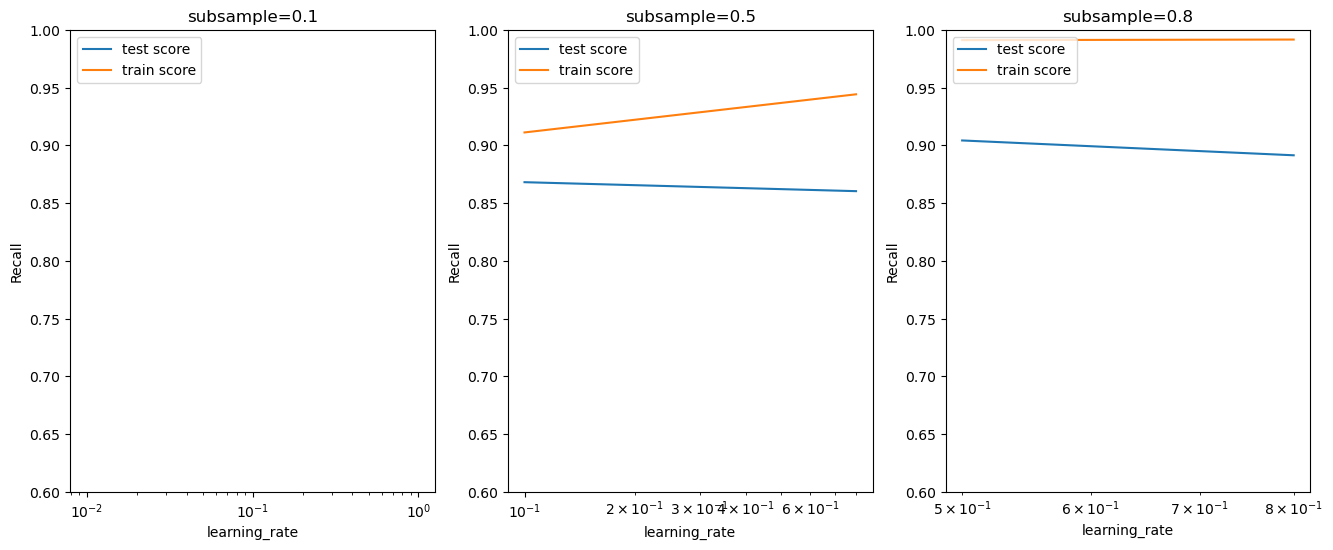

In [82]:
# Plotting the curve

plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):

    # Subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('Recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [83]:
%%time

# Hyperparameters are tuned on the above based parameters. 
# Out of the best received parameters, we re-run the model a couple of times and came up with the below parameters
# Tuning the GradientBoostingClassifier with best parameters

gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_features = 8, subsample = 0.8, max_depth=5, min_samples_split=280,  random_state=10)

CPU times: total: 0 ns
Wall time: 0 ns


In [84]:
# Fitting the Gradient Boosting Model

gbm_final.fit(X_train_pca, y_train_pca)

GradientBoostingClassifier(max_depth=5, max_features=8, min_samples_split=280,
                           n_estimators=200, random_state=10, subsample=0.8)

In [85]:
# Predictions on Test data

predictions_gbm = gbm_final.predict(X_test_pca)

print(confusion_matrix(y_test_pca,predictions_gbm))

print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test_pca, predictions_gbm))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test_pca, predictions_gbm))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test_pca, predictions_gbm))

[[7441  810]
 [ 205  545]]
Accuracy : 0.8142
Recall/Sensitivity : 0.7267
AUC Score (Train): 0.814248


#### High Accuracy model Gradient Boosting gives AUC 0.81 of and Recall of 71.6%.
### Inference: In the accuracy models, model with Logistic Regression with PCA gives the best results with an AUC of and Recall of . Since we are aiming at identifying the churn customers hence we are using Recall value as Model Evaluation
### 4.2 Interpretability Model
### 4.2.1 Logistic Regression without PCA
###### RFE

In [89]:
# Applying RFE on training set to find out important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=25) 
rfe = rfe.fit(X_train_bal, y_train_bal)

# Checking the list of the columns selected

list(zip(X_train_bal.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 81),
 ('arpu_7', False, 82),
 ('arpu_8', False, 21),
 ('onnet_mou_6', False, 72),
 ('onnet_mou_7', False, 3),
 ('onnet_mou_8', False, 18),
 ('offnet_mou_6', False, 38),
 ('offnet_mou_7', False, 13),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', False, 134),
 ('roam_ic_mou_7', False, 133),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 40),
 ('roam_og_mou_7', False, 103),
 ('roam_og_mou_8', False, 59),
 ('loc_og_t2t_mou_6', False, 92),
 ('loc_og_t2t_mou_7', False, 19),
 ('loc_og_t2t_mou_8', False, 56),
 ('loc_og_t2m_mou_6', False, 34),
 ('loc_og_t2m_mou_7', False, 15),
 ('loc_og_t2m_mou_8', False, 132),
 ('loc_og_t2f_mou_6', False, 73),
 ('loc_og_t2f_mou_7', False, 90),
 ('loc_og_t2f_mou_8', False, 74),
 ('loc_og_t2c_mou_6', False, 57),
 ('loc_og_t2c_mou_7', False, 107),
 ('loc_og_t2c_mou_8', False, 122),
 ('loc_og_mou_6', False, 35),
 ('loc_og_mou_7', False, 20),
 ('loc_og_mou_8', False, 102),
 ('std_og_t2t_mou_6', False, 36),
 ('std_og_t2t_mou_7', False

In [90]:
# Filtering the X train columns selected by the RFE

col = X_train_bal.columns[rfe.support_]
for i in X_train_bal.columns:
    print(i)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


### 4.2.2.2 Fitting Logistic Regression

In [105]:

X_train_bal = pd.get_dummies(X_train_bal, drop_first=True)
X_train_bal = X_train_bal.apply(pd.to_numeric, errors='coerce')

# Convert y_train_bal to a Pandas Series (if it is a NumPy array)
y_train_bal = pd.Series(y_train_bal)  # Ensure it's a Series

# Drop NaN rows from X_train_bal and ensure y_train_bal has the same index
X_train_bal = X_train_bal.dropna()
y_train_bal = y_train_bal.iloc[X_train_bal.index]

In [106]:
# Fitting the Logistic regression model
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train_bal[col])
logm1 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def VIF(x):
    vif = pd.DataFrame()
    vif['Features'] = X_train_bal[x].columns
    vif['VIF'] = [variance_inflation_factor(X_train_bal[x].values, i) for i in range(X_train_bal[x].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

VIF(col)

In [ ]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('night_pck_user_8_0.0', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm2 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

In [ ]:
# Dropping the high P-value column and running another Logistic Regression Model

col = col.drop('night_pck_user_8_1.0', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm3 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

In [ ]:
# Dropping the high VIF value column and running another Logistic Regression Model

col = col.drop('count_rech_2g_7', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm4 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

In [ ]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('loc_ic_mou_6', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm5 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

In [ ]:
# Dropping the high VIF column and running another Logistic Regression Model

col = col.drop('total_og_mou_8', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm6 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF(col)

In [ ]:
# Dropping the high VIF value column and running another Logistic Regression Model

col = col.drop('loc_ic_t2m_mou_8', 1)

# Fitting the Logistic regression model

X_train_sm = sm.add_constant(X_train_bal[col])
logm7 = sm.GLM(y_train_bal,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

In [ ]:
VIF(col)

In [ ]:
ids = churn_v8[['mobile_number']]
# Predicting the y train

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_lr = pd.DataFrame({'Churn':y_train_bal, 'Churn_Prob':y_train_pred})
y_train_pred_lr = pd.merge(ids, y_train_pred_lr, left_index = True, right_index = True)
y_train_pred_lr['predicted'] = y_train_pred_lr.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_lr.head()

In [ ]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_lr.Churn, y_train_pred_lr.predicted )
print(confusion)

# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted)

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_lr[i]= y_train_pred_lr.Churn_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_lr.Churn, y_train_pred_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [ ]:
# Lets check the Precision Recall Curve

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_lr.Churn, y_train_pred_lr.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
# Making predictions on test set

X_test_sm = sm.add_constant(X_test[X_train_bal[col].columns])

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)
y_pred_lr = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_lr= y_pred_lr.rename(columns={ 0 : 'Churn_Prob'})
y_pred_lr['final_predicted'] = y_pred_lr.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_lr.head()

In [ ]:
confusion = metrics.confusion_matrix(y_pred_lr.churn, y_pred_lr.final_predicted)
print(confusion)

# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_lr.churn, y_pred_lr.final_predicted)

In [ ]:
# Checking Precison and Recall

print(precision_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted))

print(recall_score(y_train_pred_lr.Churn, y_train_pred_lr.predicted))

print(precision_score(y_pred_lr.churn, y_pred_lr.final_predicted))

print(recall_score(y_pred_lr.churn, y_pred_lr.final_predicted))

In [ ]:
# Looking at the feature values based on regression results
values = list(res.params)

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.barh( range(len(values)), values)
plt.yticks(range(len(values)),X_train_sm.columns)
plt.tight_layout()
plt.show()

##### Precision on test using Logistic Regression without PCA is 65.2%. 
### 4.2.2 Model 2: Decision Tree

In [ ]:
# Instantiate Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Hyperparameter tuninig for Decision Tree classifier model

dtparams = { 
          'max_depth': [3,5,10],
          'min_samples_leaf': [50,100,200,500],
          'min_samples_split': [50,75,100],
          'criterion':['gini','entropy'],
          'max_features': ['auto','sqrt','log2']}

model_decisiontree = GridSearchCV(estimator=dt, param_grid=dtparams, cv=4, n_jobs=-1,verbose=1,scoring="recall")

In [ ]:
%%time

# Fit the model on the training dataset

model_decisiontree.fit(X_train_bal,y_train_bal)

In [ ]:
# Best estimator values for Decision Tree classifier model

model_decisiontree.best_estimator_

In [ ]:
# DecisionTree model with best hyper parameter value

model_decisiontreebest = model_decisiontree.best_estimator_

# Predicting the target variable

y_test_dtpred = model_decisiontreebest.predict(X_test)
# Accuracy on train data set.

metrics.accuracy_score(y_test,y_test_dtpred)

In [ ]:
# Confusion Matrix

metrics.confusion_matrix(y_test,y_test_dtpred)

In [ ]:
# Classification report for the Decision Tree Classifier model.

print(metrics.classification_report(y_test,y_test_dtpred))

In [ ]:
# Calculating Recall metric

print(recall_score(y_test,y_test_dtpred))

# Printing AUC Score 

print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_test_dtpred))

In [ ]:
# Series that contains top important features.

feature_scores = pd.Series(model_decisiontreebest.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False).nlargest(23)
feature_scores

In [ ]:
# Visualize top features.

ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=feature_scores,y=feature_scores.index)
ax.set_title("Visualize Feature Importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

#### High Interpretability model Decision Tree gives AUC of 0.82 and Recall of 76.7%

### Inference: Out of the interpretability models, Decision Tree works well based on the model evaluation.

### Feature Importance- Top 10 features that lead to Churn in descending order are:
1. loc_ic_mou_8
2. arpu_diff
3. max_rech_amt_8
4. total_ic_mou_8
5. roam_og_mou_8
6. roam_ic_mou_8
7. night_pck_user_8_0.0
8. av_rech_amt_data_7
9. aon_buckets_451-900
10. spl_ic_mou_6

### Recommendations based on the columns achieved from Feature Importance:

1. Provide cheap Local plans to the customers (loc_ic_mou_8).
2. Watch out for the sudden drop in the ARPU (arpu_diff).
3. Providing the combo plans to the customer based on their usage (max_rech_amt_8).
4. Provide cheap Roaming plans to the customers (roam_og_mou_8 & roam_ic_mou_8).